# Import Library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_employee_train = pd.read_csv("employee_train.csv")
df_employee_train

ID  Age     BusinessTravel              Department  DistanceFromHome  \
0        S1   28      Travel_Rarely  Research & Development                 4   
1        S2   25  Travel_Frequently                   Sales                14   
2        S3   36      Travel_Rarely  Research & Development                 3   
3        S4   36  Travel_Frequently  Research & Development                 4   
4        S5   38  Travel_Frequently  Research & Development                12   
...     ...  ...                ...                     ...               ...   
9073  S9074   28  Travel_Frequently                   Sales                 7   
9074  S9075   34      Travel_Rarely  Research & Development                24   
9075  S9076   34      Travel_Rarely                     NaN                 7   
9076  S9077   37      Travel_Rarely         Human Resources                 3   
9077  S9078   27      Travel_Rarely                   Sales                 7   

          Education EducationField EnvironmentSatisfaction  Gender  \
0               NaN          Other               Very High    Male   
1     Below College      Marketing                    High    Male   
2     Below College      Marketing                  Medium    Male   
3               NaN  Life Sciences               Very High    Male   
4          Bachelor  Life Sciences               Very High    Male   
...             ...            ...                     ...     ...   
9073       Bachelor  Life Sciences                     NaN  Female   
9074       Bachelor  Life Sciences               Very High    Male   
9075       Bachelor        Medical                    High    Male   
9076       Bachelor        Medical                     Low    Male   
9077       Bachelor      Marketing                     NaN    Male   

     JobInvolvement  ...  StockOptionLevel TotalWorkingYears  \
0              High  ...                 0               NaN   
1              High  ...                 0               6.0   
2            Medium  ...                 1              10.0   
3              High  ...                 3              18.0   
4            Medium  ...                 0               NaN   
...             ...  ...               ...               ...   
9073           High  ...                 0              10.0   
9074         Medium  ...                 1               8.0   
9075         Medium  ...                 0               NaN   
9076           High  ...                 0              12.0   
9077         Medium  ...                 0               6.0   

     TrainingTimesLastYear WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                        4            Good             4.0                  1   
1                        2            Good             NaN                  4   
2                        3             Bad             9.0                  4   
3                        3          Better             4.0                  2   
4                        4            Good             NaN                  3   
...                    ...             ...             ...                ...   
9073                     0            Good             8.0                  6   
9074                     2            Good             8.0                  7   
9075                     3            Good             2.0                  0   
9076                     0            Good             5.0                  4   
9077                     1          Better             5.0                  3   

      YearsSinceLastPromotion YearsWithCurrManager MonthlyIncome  Attrition  
0                         0.0                  NaN      14115.06         No  
1                         1.0                  4.0      16661.93        Yes  
2                         1.0                  4.0      13178.42         No  
3                         0.0                  2.0      13601.03         No  
4                         1.0                  3.0      15419.1

In [3]:
total_rows_train, total_features_train = df_employee_train.shape
print("Ukuran data employee train")
print("Jumlah data: ", total_rows_train)
print("Jumlah fitur: ", total_features_train)

Ukuran data employee train
Jumlah data:  9078
Jumlah fitur:  30


In [4]:
df_employee_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9078 entries, 0 to 9077
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        9078 non-null   object 
 1   Age                       9078 non-null   int64  
 2   BusinessTravel            9078 non-null   object 
 3   Department                7569 non-null   object 
 4   DistanceFromHome          9078 non-null   int64  
 5   Education                 7410 non-null   object 
 6   EducationField            7977 non-null   object 
 7   EnvironmentSatisfaction   7422 non-null   object 
 8   Gender                    8535 non-null   object 
 9   JobInvolvement            9047 non-null   object 
 10  JobLevel                  9078 non-null   int64  
 11  JobRole                   9078 non-null   object 
 12  JobSatisfaction           8883 non-null   object 
 13  MaritalStatus             9078 non-null   object 
 14  NumCompa

In [5]:
df_employee_train.describe()

Age  DistanceFromHome     JobLevel  NumCompaniesWorked  \
count  9078.000000       9078.000000  9078.000000         9078.000000   
mean     35.413197          9.007821     1.801058            2.392818   
std       8.450982          7.350826     0.960880            2.285775   
min       4.000000        -11.000000     0.000000           -2.000000   
25%      30.000000          3.000000     1.000000            1.000000   
50%      34.000000          7.000000     2.000000            2.000000   
75%      40.000000         13.000000     2.000000            4.000000   
max      68.000000         41.000000     5.000000           13.000000   

       PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  \
count        8506.000000         9078.0       9078.000000        8032.000000   
mean           14.949330           80.0          0.541639           9.819223   
std             3.440793            0.0          0.701574           7.128204   
min             4.000000           80.0         -1.000000          -7.000000   
25%            12.000000           80.0          0.000000           5.000000   
50%            14.000000           80.0          0.000000           8.000000   
75%            17.000000           80.0          1.000000          13.000000   
max            29.000000           80.0          4.000000          42.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
count            9078.000000     7968.000000         9078.000000   
mean                2.485019        5.909262            3.515091   
std                 1.195428        5.311667            3.230341   
min                -1.000000       -8.000000           -4.000000   
25%                 2.000000        2.000000            1.000000   
50%                 2.000000        5.000000            2.000000   
75%                 3.000000        8.000000            6.000000   
max                 7.000000       41.000000           23.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  MonthlyIncome  
count              8546.000000           8538.000000    9078.000000  
mean                  1.683829              3.416140   14213.461360  
std                   2.695503              3.175999    2984.634565  
min                  -7.000000             -6.000000    3206.160000  
25%                   0.000000              1.000000   12871.332500  
50%                   1.000000              2.000000   14321.610000  
75%                   2.000000              6.000000   15786.557500  
max                  20.000000             21.000000   25535.330000

In [6]:
df_employee_train.describe(include="object")

ID BusinessTravel              Department Education EducationField  \
count    9078           9078                    7569      7410           7977   
unique   9078              3                       3         5              6   
top     S9078  Travel_Rarely  Research & Development  Bachelor  Life Sciences   
freq        1           4982                    5542      3232           3128   

       EnvironmentSatisfaction Gender JobInvolvement             JobRole  \
count                     7422   8535           9047                9078   
unique                       4      2              4                   9   
top                       High   Male           High  Research Scientist   
freq                      2586   4871           4391                1752   

       JobSatisfaction MaritalStatus OverTime PerformanceRating  \
count             8883          9078     9078              9078   
unique               4             3        2                 3   
top               High       Married       No         Excellent   
freq              3110          4620     7465              8237   

       RelationshipSatisfaction WorkLifeBalance Attrition  
count                      7783            7937      9078  
unique                        4               4         2  
top                        High          Better        No  
freq                       2833            4215      7303

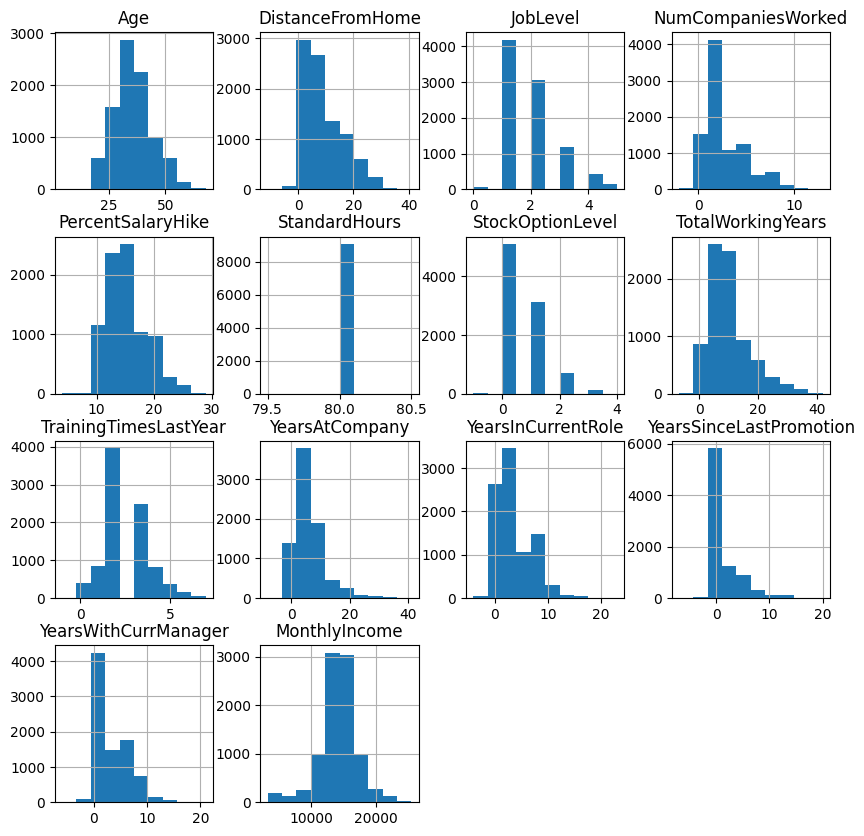

In [7]:
df_employee_train.hist(figsize=(10, 10))
plt.show()

## Unique Values

In [8]:
for col in df_employee_train.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_employee_train[col].value_counts(), '\n')

No. of unique values in column ID:
ID
S9078    1
S1       1
S2       1
S3       1
S4       1
        ..
S11      1
S10      1
S9       1
S8       1
S7       1
Name: count, Length: 9078, dtype: int64 

No. of unique values in column BusinessTravel:
BusinessTravel
Travel_Rarely        4982
Travel_Frequently    2942
Non-Travel           1154
Name: count, dtype: int64 

No. of unique values in column Department:
Department
Research & Development    5542
Sales                     1351
Human Resources            676
Name: count, dtype: int64 

No. of unique values in column Education:
Education
Bachelor         3232
College          2013
Master           1066
Below College    1033
Doctor             66
Name: count, dtype: int64 

No. of unique values in column EducationField:
EducationField
Life Sciences       3128
Medical             1839
Marketing           1719
Other                575
Human Resources      408
Technical Degree     308
Name: count, dtype: int64 

No. of unique values in co

In [9]:
for col in df_employee_train.select_dtypes(include=['number']).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_employee_train[col].unique())

No. of unique values in column Age:
[28 25 36 38 50 53 37 27 34 41 30 31 56 60 33 29 23 32 35 40 26 48 51 24
 54 21 39 44 46 47 49 45 20 42 55 57 22 59 18 19 52 43 58 66  4 63 61 65
 62 68 64 67  6]
No. of unique values in column DistanceFromHome:
[  4  14   3  12   1   2  10  15   8  11   0  28  17  23  21  26   7   6
  18  24  13   9  25   5  27  16  19  37  20  22  33  -3  36  -1  -2  30
  29  38  32  -8  31  -4  -6  -5  35  34  39 -10  40 -11  41  -7]
No. of unique values in column JobLevel:
[1 2 4 5 3 0]
No. of unique values in column NumCompaniesWorked:
[ 4  0  7  2  3  1 -2  6  5  8  9 10 -1 11 12 13]
No. of unique values in column PercentSalaryHike:
[11. 18. 13. 21. 12. 16. 14. 19. 15. 17. 20. nan 10. 23. 26. 22.  9. 24.
 27. 25.  7.  8.  5. 29.  6. 28.  4.]
No. of unique values in column StandardHours:
[80]
No. of unique values in column StockOptionLevel:
[ 0  1  3  2 -1  4]
No. of unique values in column TotalWorkingYears:
[nan  6. 10. 18. 31. 23.  1.  5.  7. 24. 22. 19.  8. 

# EDA

## 3.Apa ciri-ciri dari karyawan yang memiliki income tinggi?

In [10]:
df_eda = df_employee_train.copy()

### Describe

In [11]:
print(df_eda['MonthlyIncome'].value_counts(), '\n')

MonthlyIncome
17899.28    5
13854.52    4
15920.07    4
14080.57    4
13540.04    4
           ..
16661.93    1
13178.42    1
17309.37    1
14998.98    1
8951.09     1
Name: count, Length: 7636, dtype: int64 



In [12]:
df_eda['MonthlyIncome'].describe()

count     9078.000000
mean     14213.461360
std       2984.634565
min       3206.160000
25%      12871.332500
50%      14321.610000
75%      15786.557500
max      25535.330000
Name: MonthlyIncome, dtype: float64

In [13]:
continuous_cols = ['Age', 'DistanceFromHome', 'PercentSalaryHike', 'TotalWorkingYears',
                   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                   'YearsWithCurrManager', 'MonthlyIncome']

In [14]:
def plot_kde_histograms(df, continuous_cols):
    """Plots KDE and histogram plots for continuous features."""
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
    axes = axes.flatten()
    for ax, col in zip(axes, continuous_cols):
        if col == 'MonthlyIncome':
            sns.kdeplot(df[col].dropna(), ax=ax, fill=True)
        else:
            sns.histplot(df[col].dropna(), ax=ax, kde=True, bins=30, stat="density", alpha=0.5)
        ax.set_title(f'KDE Plot: {col}')
    plt.tight_layout()
    plt.show()

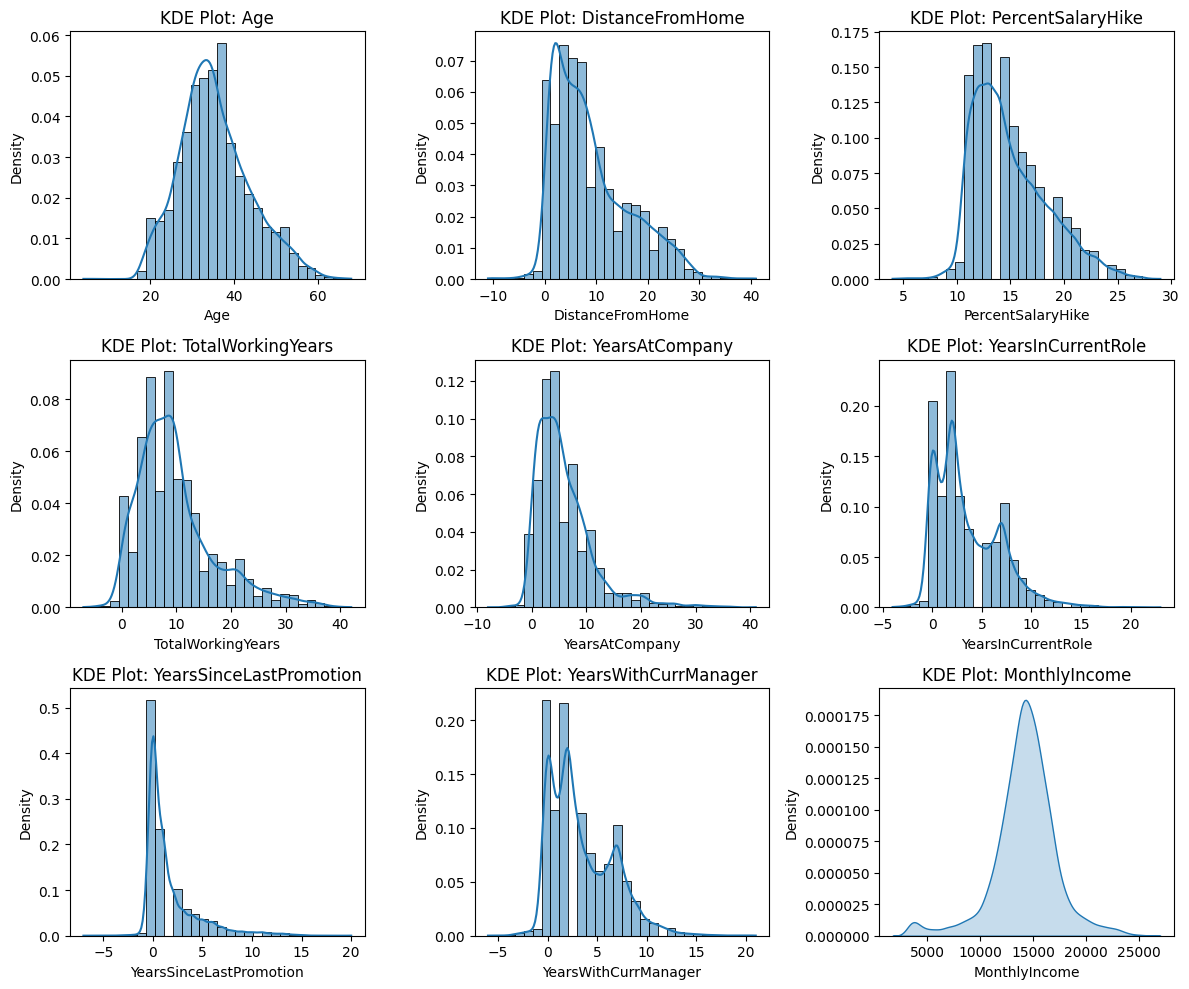

In [15]:
plot_kde_histograms(df_eda, continuous_cols)

In [16]:
numerical_cols = ['Age', 'DistanceFromHome', 'JobLevel', 'NumCompaniesWorked',
                  'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
                  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsSinceLastPromotion',
                  'YearsWithCurrManager', 'MonthlyIncome']

In [17]:
def plot_boxplots(numerical_cols, df):
    """
    Create box plots for the specified numerical columns in the given DataFrame.
    Parameters:
    numerical_cols (list): List of numerical column names to plot.
    df (DataFrame): The DataFrame containing the data.
    """
    # Create a figure with a specified size
    plt.figure(figsize=(15, 15))  # Adjust the size as needed

    # Loop through each numerical column and create a box plot
    for i, col in enumerate(numerical_cols):
        # Create a subplot for each box plot
        plt.subplot(5, 3, i + 1)

        # Create the box plot using seaborn
        sns.boxplot(y=df[col], color='skyblue')

        # Set the title for the subplot
        plt.title(f'Box Plot of {col}', fontsize=12)

        # Add a label for the y-axis
        plt.ylabel(col, fontsize=10)

        # Remove x-axis ticks and labels as they are not needed for single-column box plots
        plt.xticks([])

    # Adjust layout to prevent titles and labels from overlapping
    plt.tight_layout()

    # Display the plots
    plt.show()

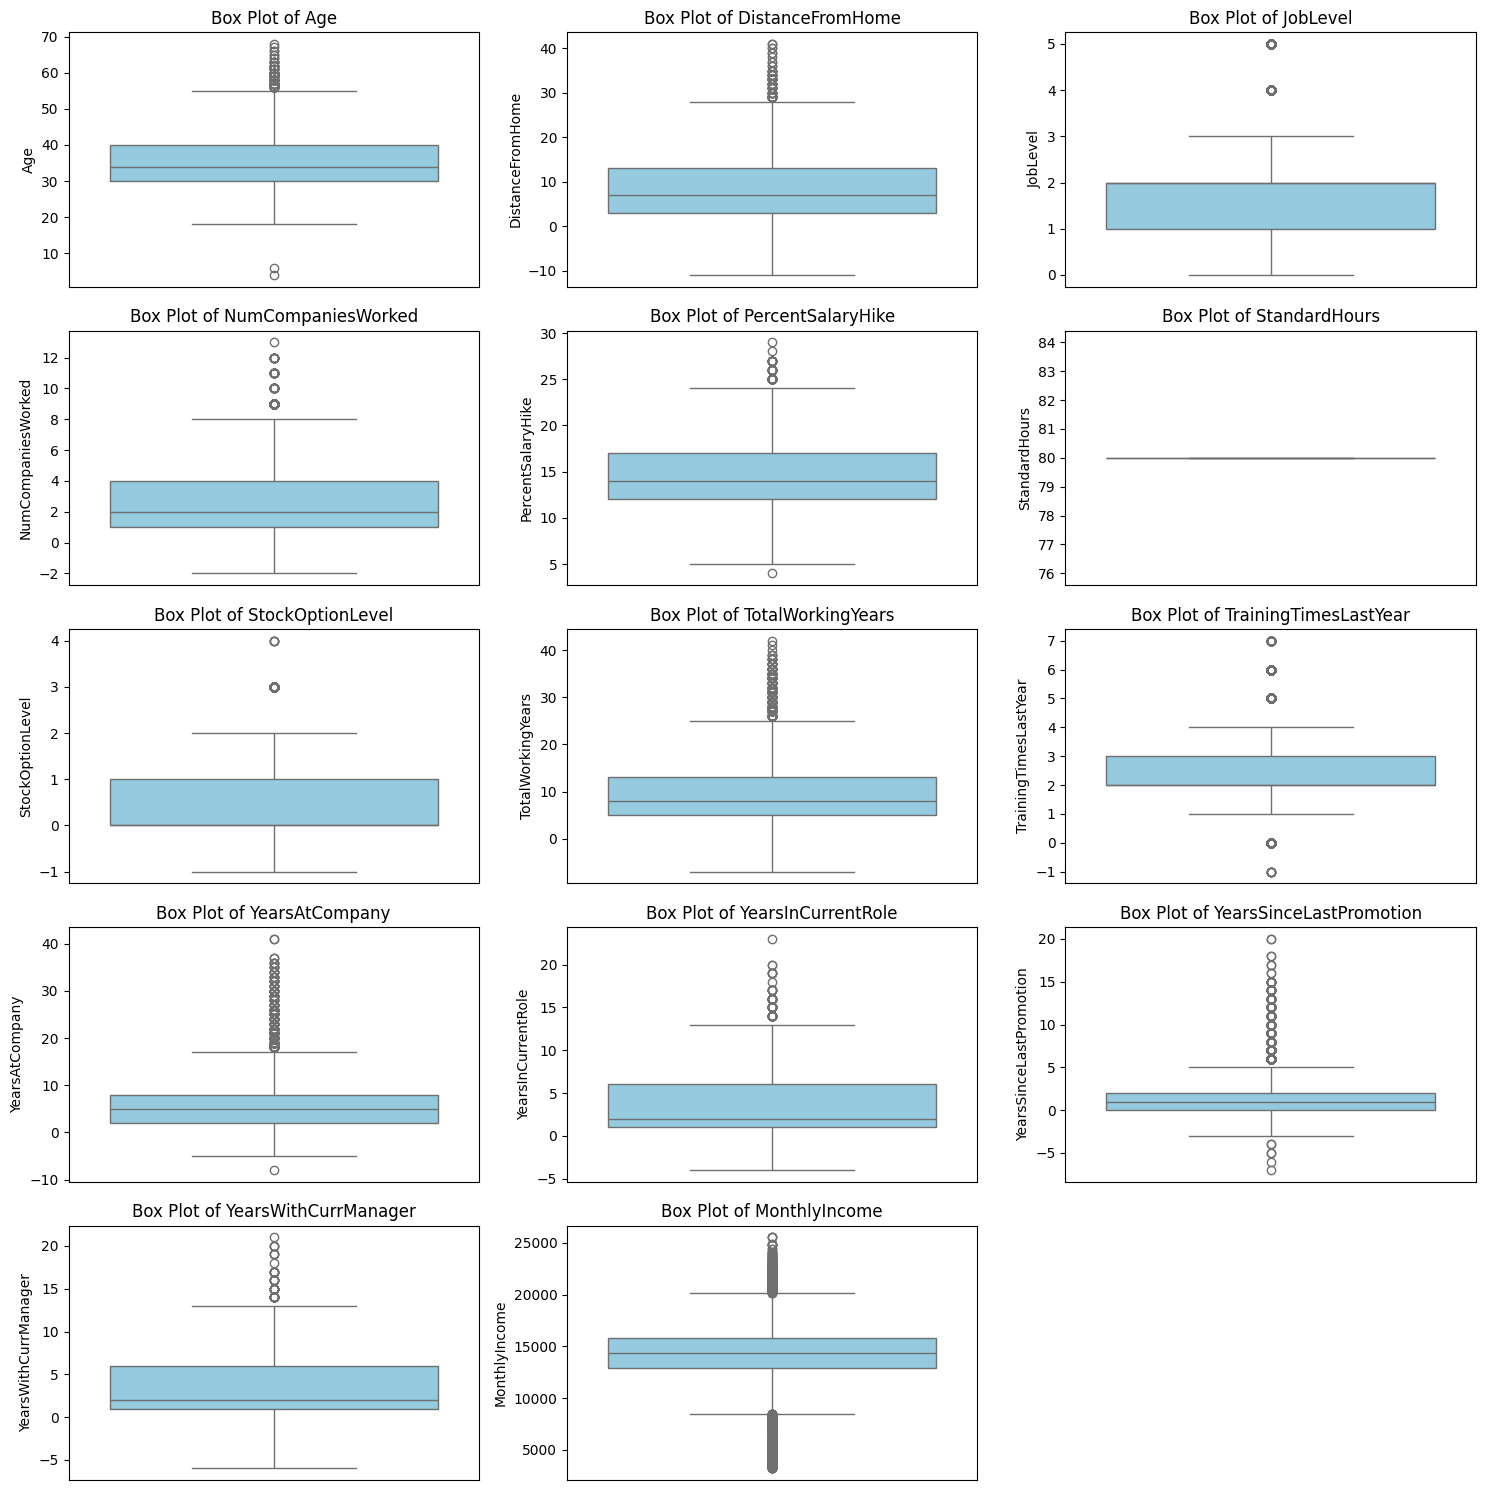

In [18]:
plot_boxplots(numerical_cols, df_eda)

In [19]:
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
                    'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
                    'RelationshipSatisfaction', 'WorkLifeBalance', 'Attrition']


Distribusi Kolom: BusinessTravel
BusinessTravel
Travel_Rarely        4982
Travel_Frequently    2942
Non-Travel           1154
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        54.88%
Travel_Frequently    32.41%
Non-Travel           12.71%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


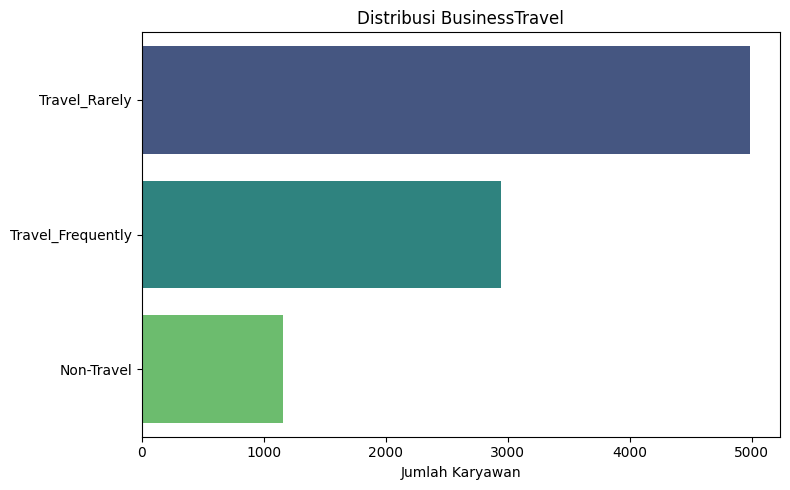


Distribusi Kolom: Department
Department
Research & Development    5542
Sales                     1351
Human Resources            676
Name: count, dtype: int64
Department
Research & Development    73.22%
Sales                     17.85%
Human Resources            8.93%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


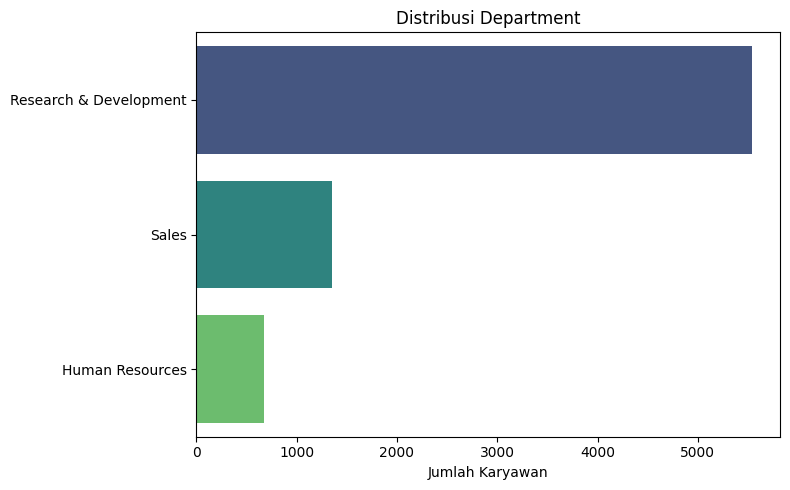


Distribusi Kolom: Education
Education
Bachelor         3232
College          2013
Master           1066
Below College    1033
Doctor             66
Name: count, dtype: int64
Education
Bachelor         43.62%
College          27.17%
Master           14.39%
Below College    13.94%
Doctor            0.89%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


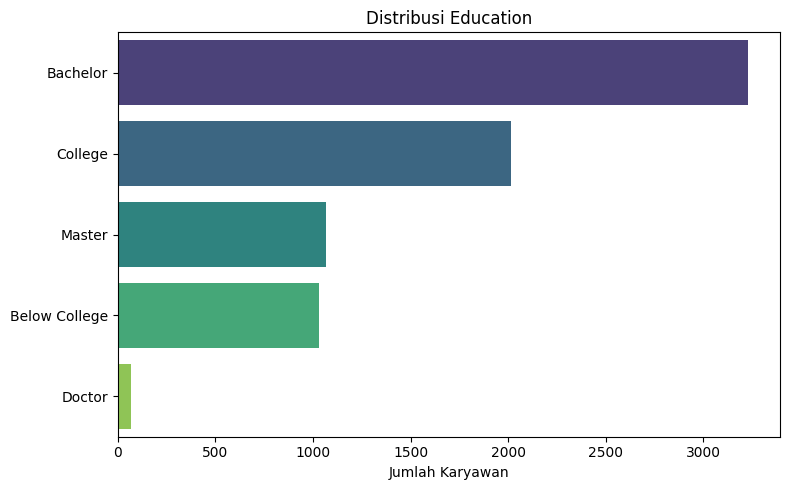


Distribusi Kolom: EducationField
EducationField
Life Sciences       3128
Medical             1839
Marketing           1719
Other                575
Human Resources      408
Technical Degree     308
Name: count, dtype: int64
EducationField
Life Sciences       39.21%
Medical             23.05%
Marketing           21.55%
Other                7.21%
Human Resources      5.11%
Technical Degree     3.86%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


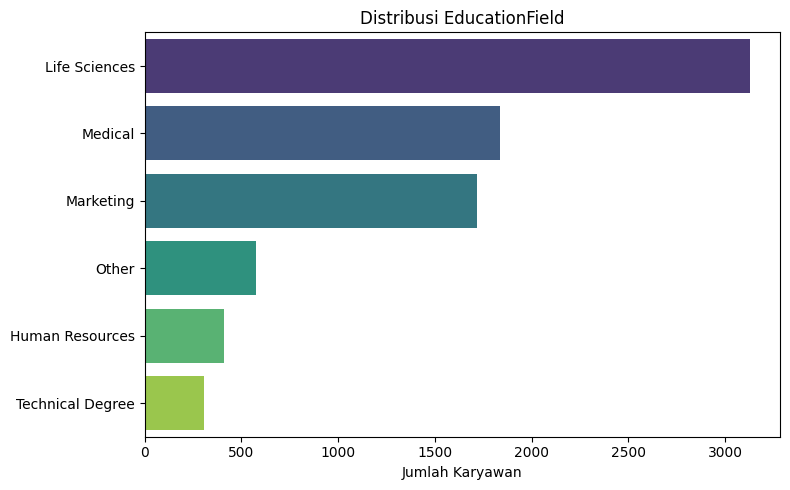


Distribusi Kolom: EnvironmentSatisfaction
EnvironmentSatisfaction
High         2586
Medium       2109
Low          1612
Very High    1115
Name: count, dtype: int64
EnvironmentSatisfaction
High         34.84%
Medium       28.42%
Low          21.72%
Very High    15.02%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


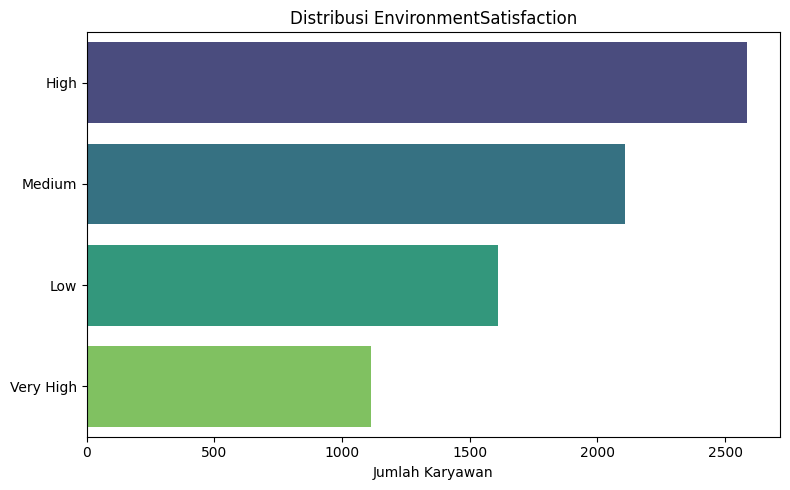


Distribusi Kolom: Gender
Gender
Male      4871
Female    3664
Name: count, dtype: int64
Gender
Male      57.07%
Female    42.93%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


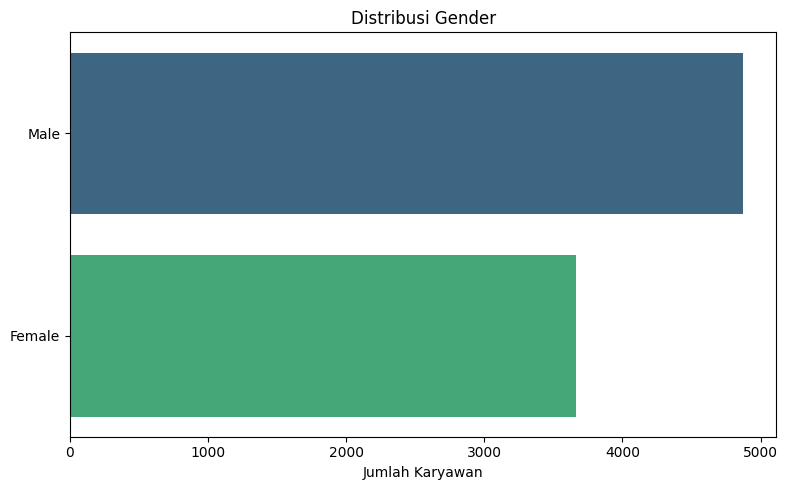


Distribusi Kolom: JobInvolvement
JobInvolvement
High         4391
Medium       3589
Low           722
Very High     345
Name: count, dtype: int64
JobInvolvement
High         48.54%
Medium       39.67%
Low           7.98%
Very High     3.81%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


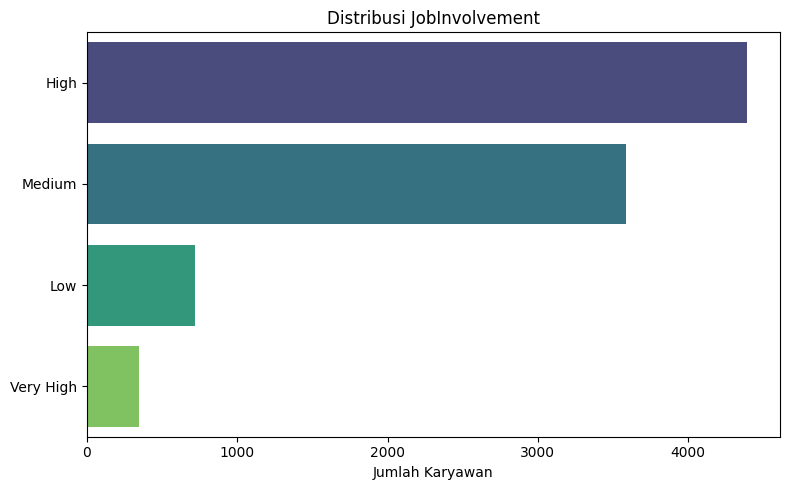

<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')



Distribusi Kolom: JobRole
JobRole
Research Scientist           1752
Sales Executive              1511
Laboratory Technician        1351
Manufacturing Director       1125
Manager                       935
Research Director             928
Healthcare Representative     608
Human Resources               549
Sales Representative          319
Name: count, dtype: int64
JobRole
Research Scientist            19.3%
Sales Executive              16.64%
Laboratory Technician        14.88%
Manufacturing Director       12.39%
Manager                       10.3%
Research Director            10.22%
Healthcare Representative      6.7%
Human Resources               6.05%
Sales Representative          3.51%
Name: proportion, dtype: object


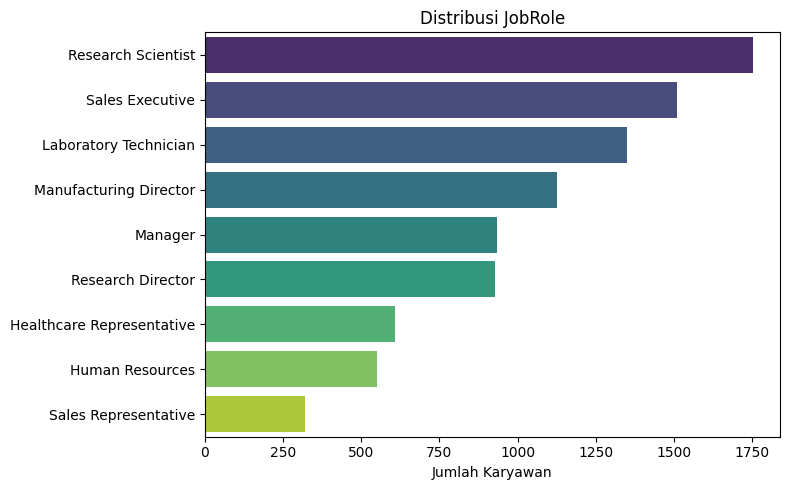


Distribusi Kolom: JobSatisfaction
JobSatisfaction
High         3110
Medium       2531
Low          1892
Very High    1350
Name: count, dtype: int64
JobSatisfaction
High         35.01%
Medium       28.49%
Low           21.3%
Very High     15.2%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


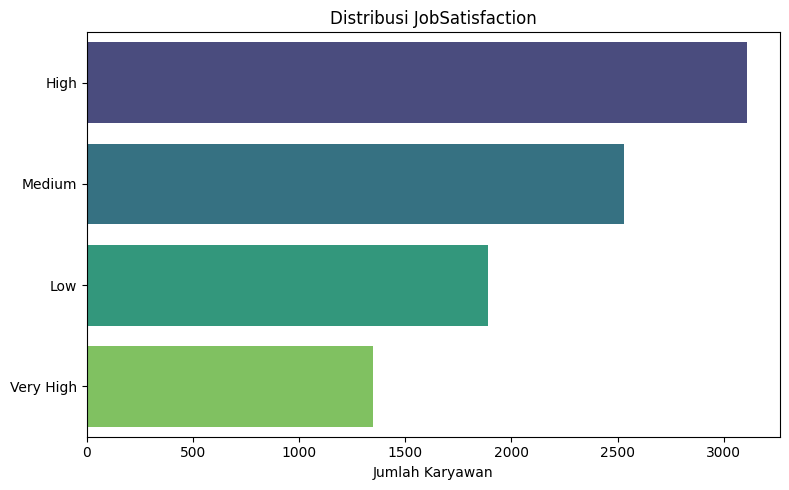


Distribusi Kolom: MaritalStatus
MaritalStatus
Married     4620
Divorced    2780
Single      1678
Name: count, dtype: int64
MaritalStatus
Married     50.89%
Divorced    30.62%
Single      18.48%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


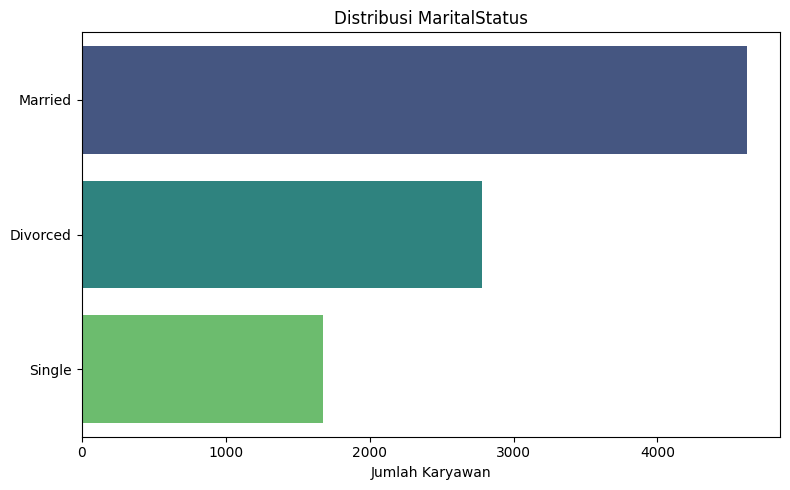


Distribusi Kolom: OverTime
OverTime
No     7465
Yes    1613
Name: count, dtype: int64
OverTime
No     82.23%
Yes    17.77%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


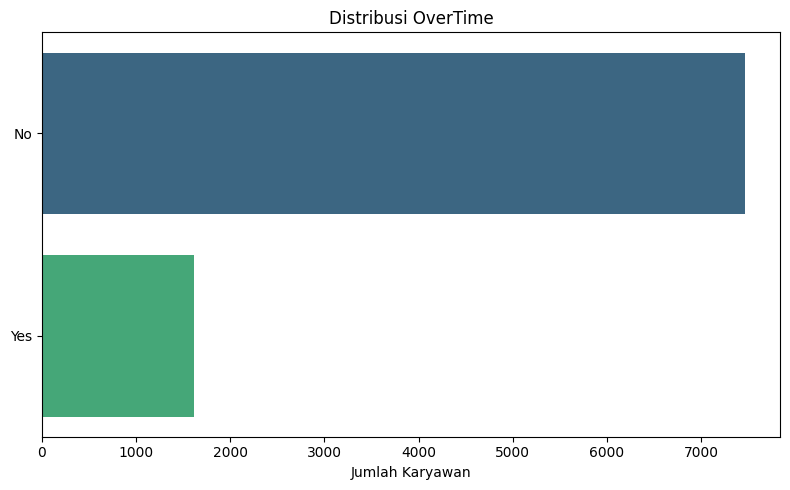


Distribusi Kolom: PerformanceRating
PerformanceRating
Excellent      8237
Outstanding     660
Good            181
Name: count, dtype: int64
PerformanceRating
Excellent      90.74%
Outstanding     7.27%
Good            1.99%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


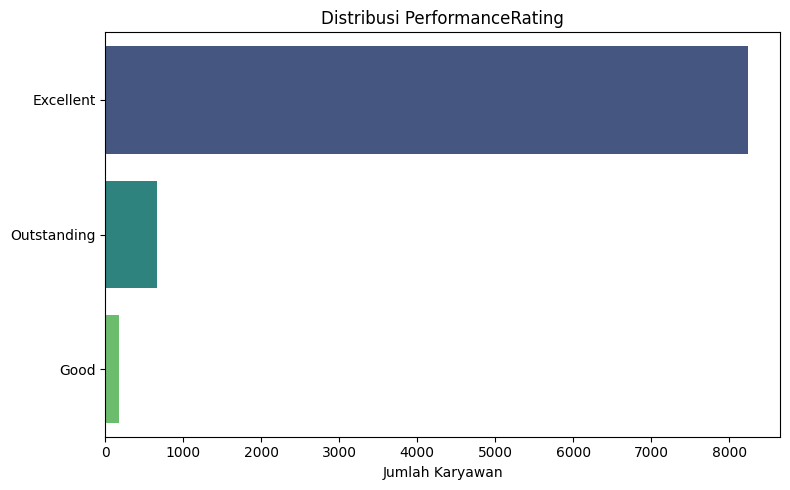


Distribusi Kolom: RelationshipSatisfaction
RelationshipSatisfaction
High         2833
Medium       2355
Low          1540
Very High    1055
Name: count, dtype: int64
RelationshipSatisfaction
High          36.4%
Medium       30.26%
Low          19.79%
Very High    13.56%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


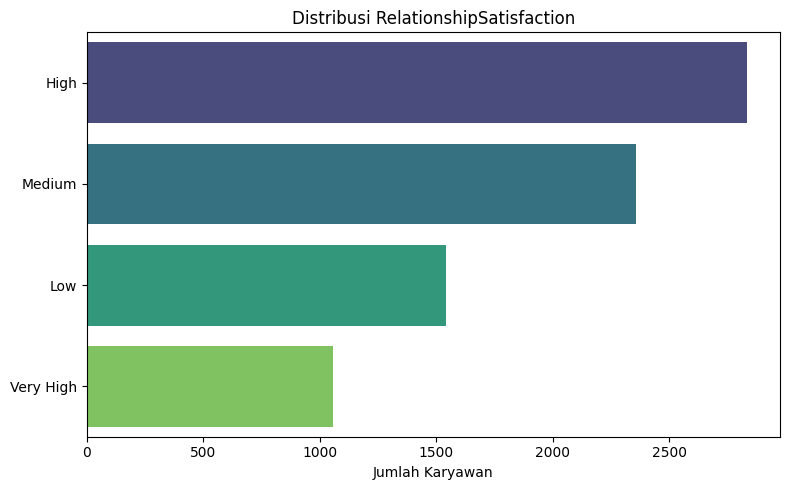


Distribusi Kolom: WorkLifeBalance
WorkLifeBalance
Better    4215
Good      2741
Bad        620
Best       361
Name: count, dtype: int64
WorkLifeBalance
Better    53.11%
Good      34.53%
Bad        7.81%
Best       4.55%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


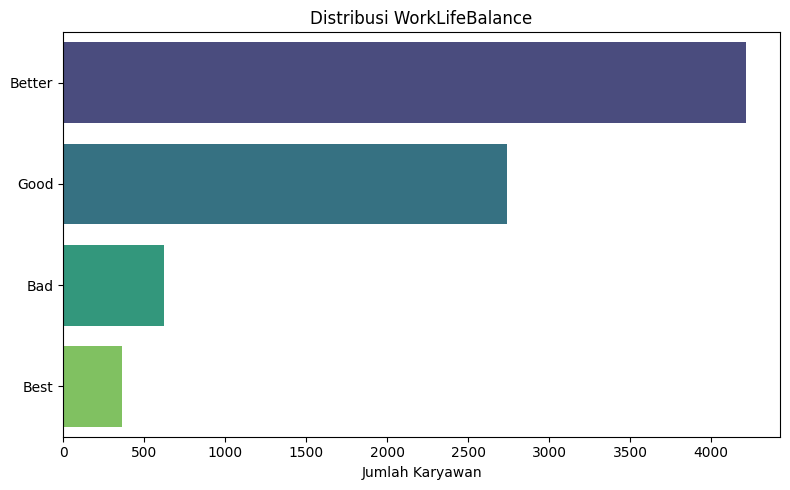


Distribusi Kolom: Attrition
Attrition
No     7303
Yes    1775
Name: count, dtype: int64
Attrition
No     80.45%
Yes    19.55%
Name: proportion, dtype: object


<ipython-input-20-18f429ada867>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')


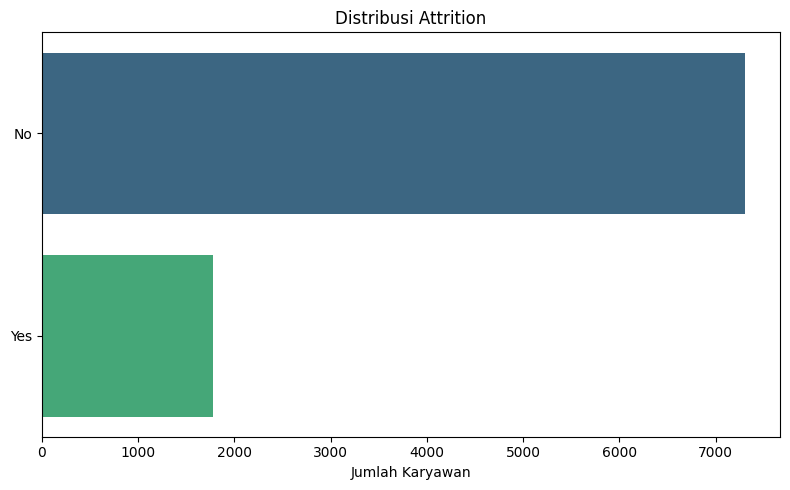

In [20]:
for col in categorical_cols:
    print(f"\nDistribusi Kolom: {col}")
    print(df_eda[col].value_counts())
    print(df_eda[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%') # Persentase

    # Visualisasi (opsional, jika ingin melihat plot untuk setiap kolom kategorikal)
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_eda, y=col, order=df_eda[col].value_counts().index, palette='viridis')
    plt.title(f'Distribusi {col}')
    plt.xlabel('Jumlah Karyawan')
    plt.ylabel('') # Hapus label y karena sudah ada di judul
    plt.tight_layout()
    plt.show()

### Menentukan high income merupakan dataset dengan MonthlyIncome lebih dari atau sama dengan Q3

In [21]:
Q3_monthly_income = df_eda['MonthlyIncome'].quantile(0.75)
print(f"Kuartil Ketiga (Q3) untuk MonthlyIncome: {Q3_monthly_income}\n")

Kuartil Ketiga (Q3) untuk MonthlyIncome: 15786.557499999999



In [22]:
high_income_df = df_eda[df_eda['MonthlyIncome'] >= Q3_monthly_income].copy()
other_income_df = df_eda[df_eda['MonthlyIncome'] < Q3_monthly_income].copy()

print(f"Jumlah karyawan berpenghasilan tinggi (>= Q3): {len(high_income_df)}")
print(f"Jumlah karyawan berpenghasilan lainnya (kurang dari Q3): {len(other_income_df)}\n")

Jumlah karyawan berpenghasilan tinggi (>= Q3): 2270
Jumlah karyawan berpenghasilan lainnya (kurang dari Q3): 6808



### Analisis Fitur Numerik

In [23]:
print("\nPERBANDINGAN STATISTIK DESKRIPTIF (FITUR NUMERIK):")
print("Karyawan Berpenghasilan Tinggi (MonthlyIncome >= Q3):")
print(high_income_df[numerical_cols].describe().loc[['mean', 'std', 'min', 'max', '50%', '75%']]) # Include median and Q3 for better comparison
print("\nKaryawan Berpenghasilan Lainnya (MonthlyIncome < Q3):")
print(other_income_df[numerical_cols].describe().loc[['mean', 'std', 'min', 'max', '50%', '75%']])


PERBANDINGAN STATISTIK DESKRIPTIF (FITUR NUMERIK):
Karyawan Berpenghasilan Tinggi (MonthlyIncome >= Q3):
            Age  DistanceFromHome  JobLevel  NumCompaniesWorked  \
mean  35.305286          9.450661  1.838767            2.381938   
std    9.375085          7.204559  0.961807            2.265718   
min    4.000000        -11.000000  0.000000           -2.000000   
max   68.000000         36.000000  5.000000           11.000000   
50%   33.000000          8.000000  2.000000            1.500000   
75%   39.000000         14.000000  2.000000            4.000000   

      PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  \
mean          15.429977           80.0          0.380617           9.562283   
std            3.455656            0.0          0.639919           7.305299   
min            7.000000           80.0         -1.000000          -2.000000   
max           27.000000           80.0          4.000000          42.000000   
50%           15.000000      

Box Plot untuk data pendapatan tinggi


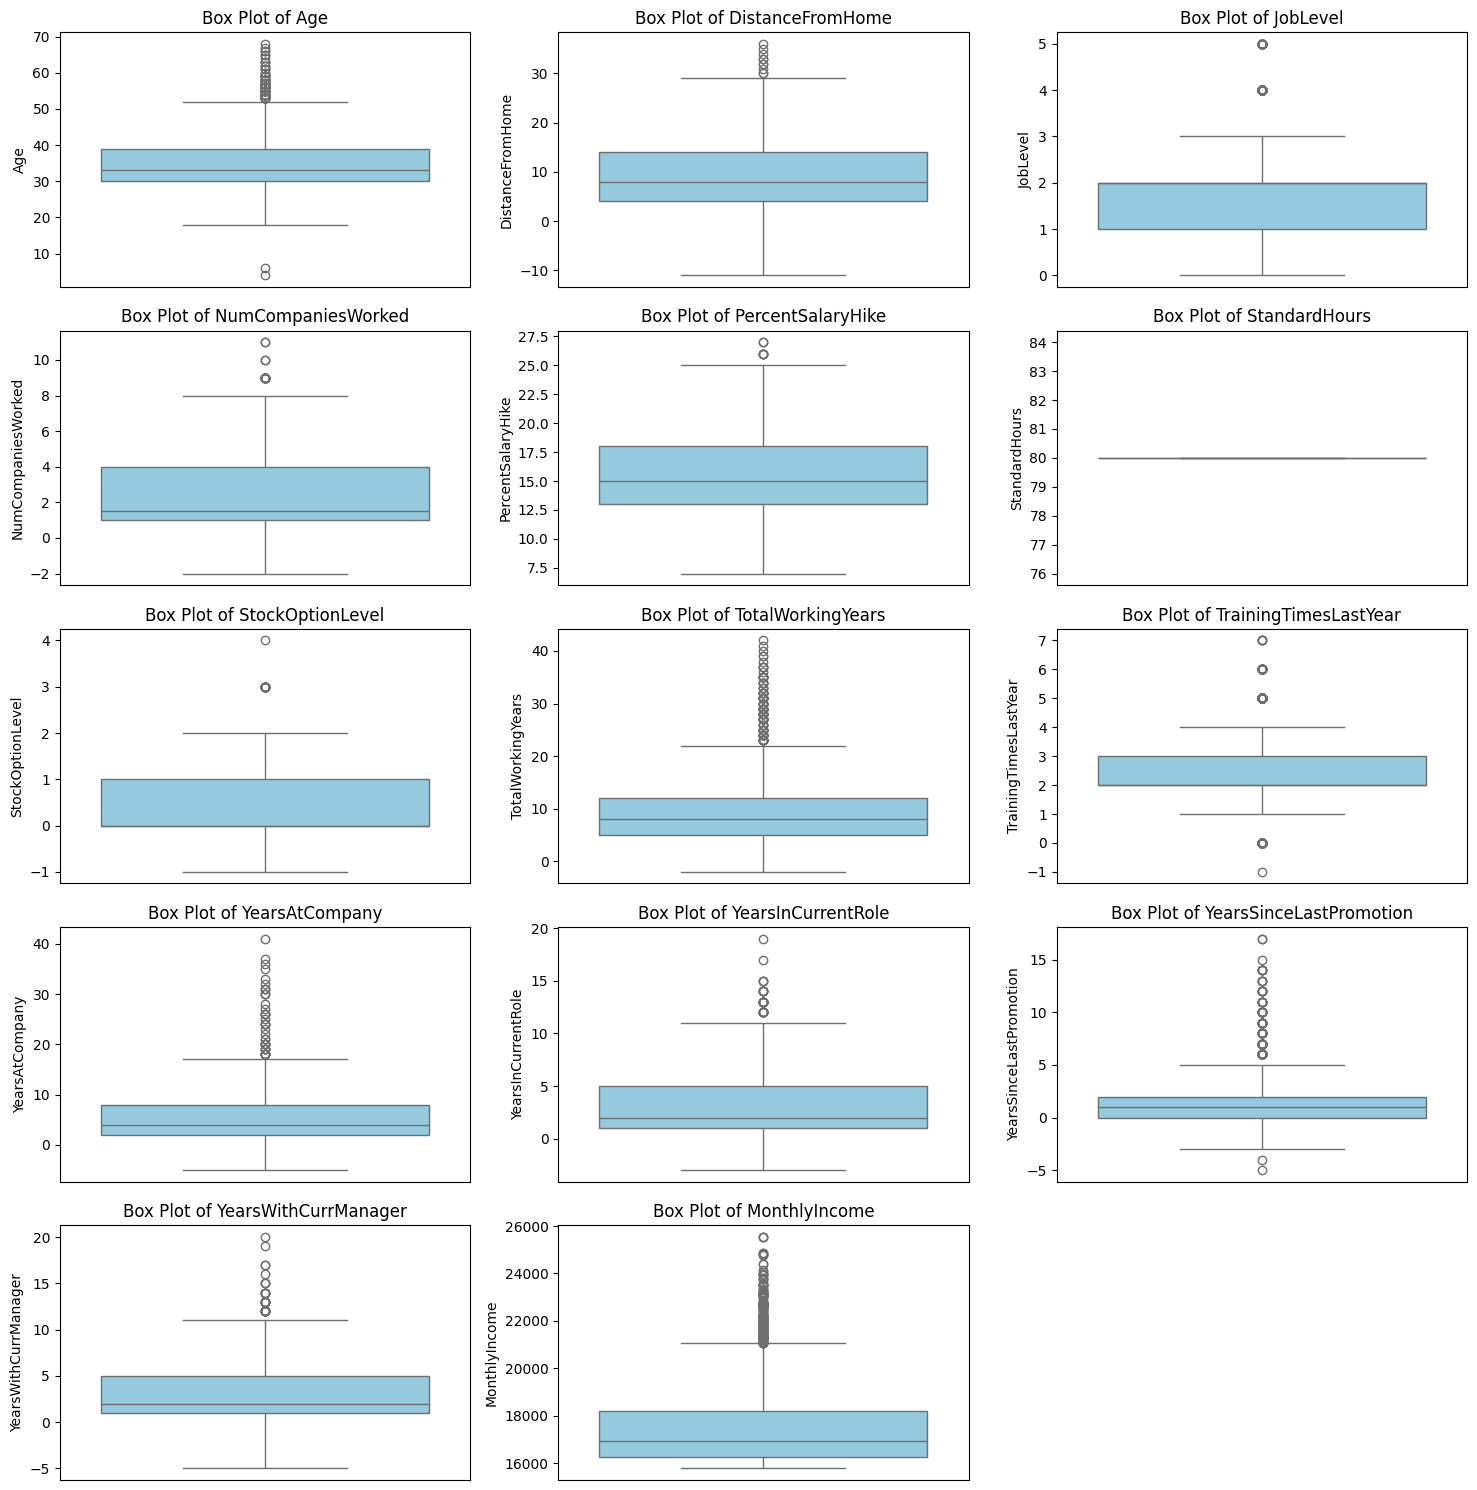

In [24]:
print("Box Plot untuk data pendapatan tinggi")
plot_boxplots(numerical_cols, high_income_df)

Box Plot untuk data pendapatan lain


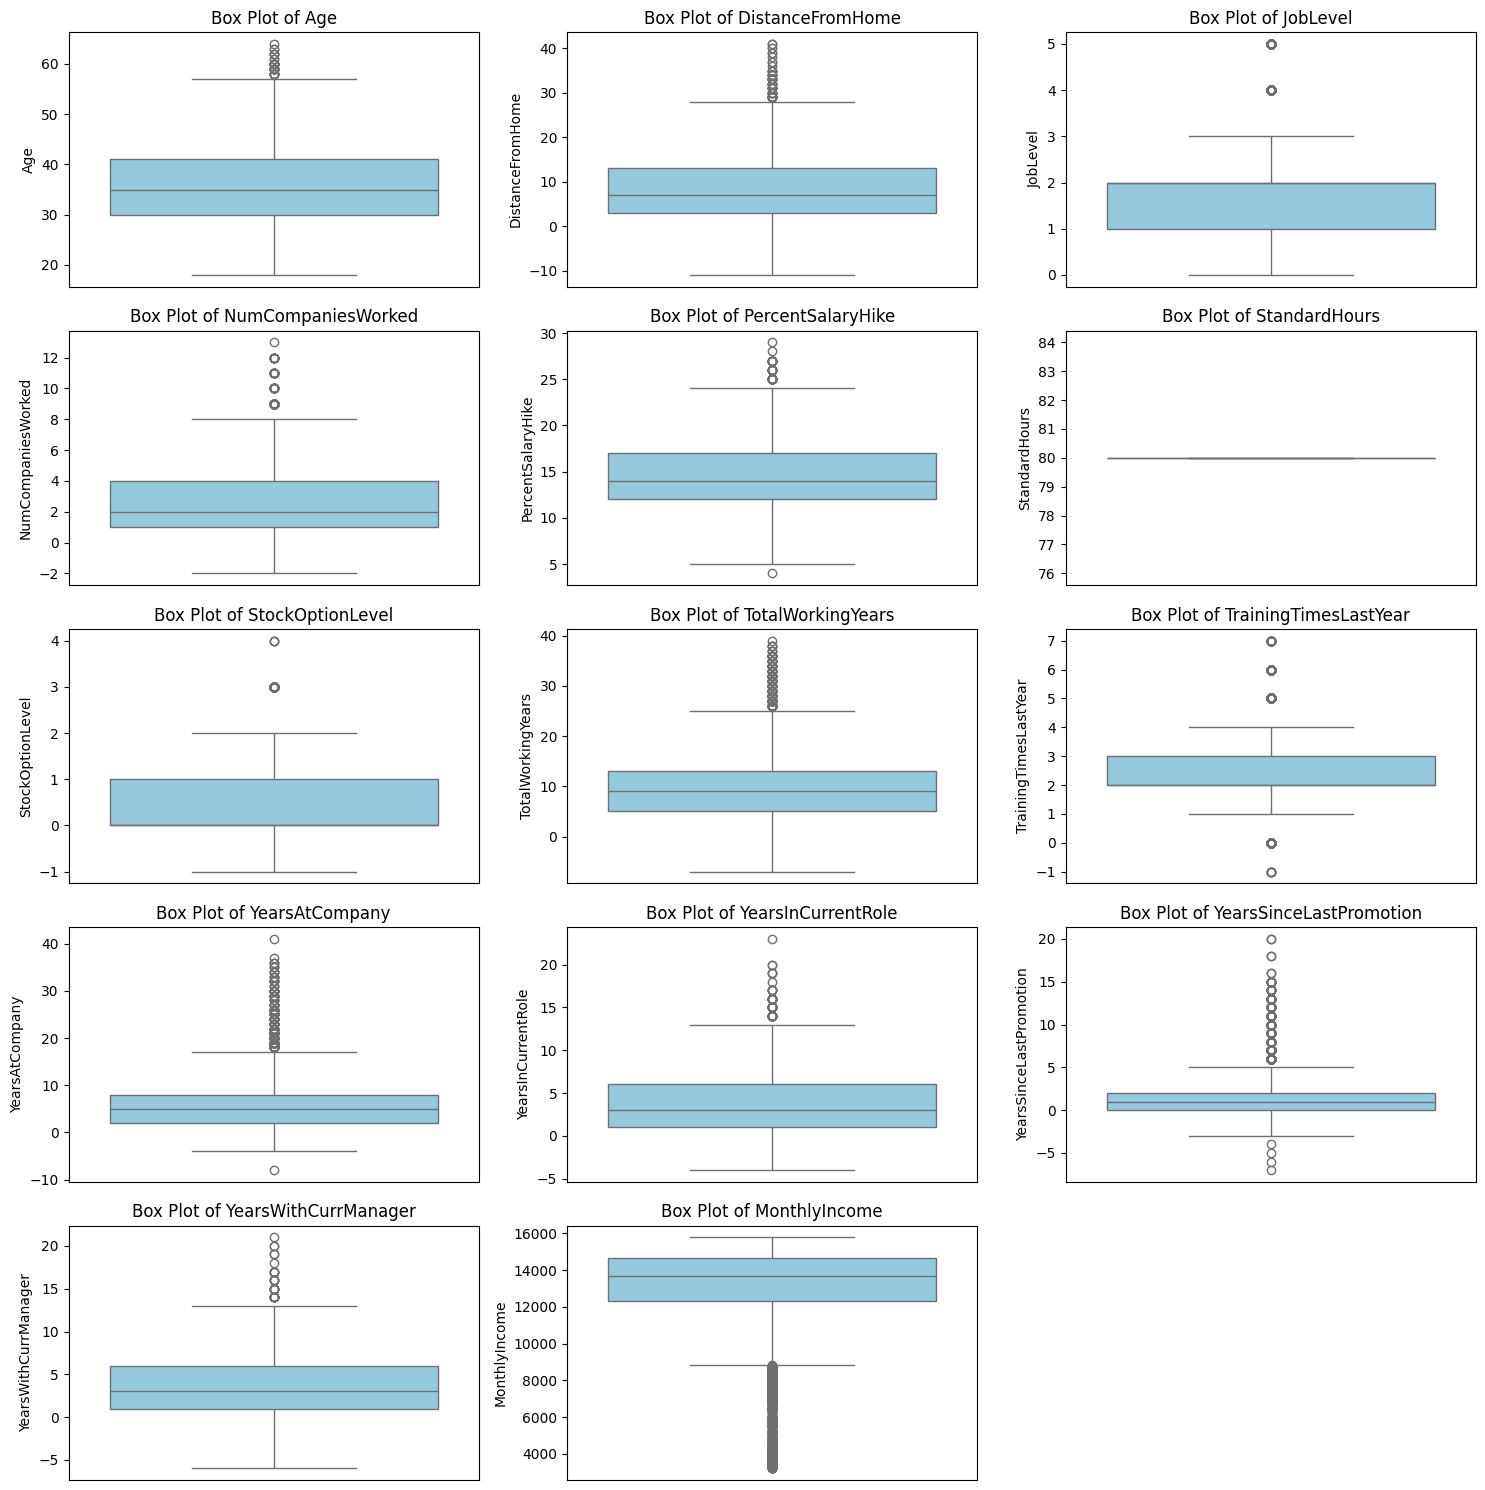

In [25]:
print("Box Plot untuk data pendapatan lain")
plot_boxplots(numerical_cols, other_income_df)


VISUALISASI DISTRIBUSI FITUR NUMERIK (HIGH INCOME vs. OTHER INCOME):


<ipython-input-26-186e9a7af26a>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(high_income_df[col].dropna(), ax=axes[i], fill=True, label='High Income', color='skyblue')
<ipython-input-26-186e9a7af26a>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(other_income_df[col].dropna(), ax=axes[i], fill=True, label='Other Income', color='lightcoral')
<ipython-input-26-186e9a7af26a>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


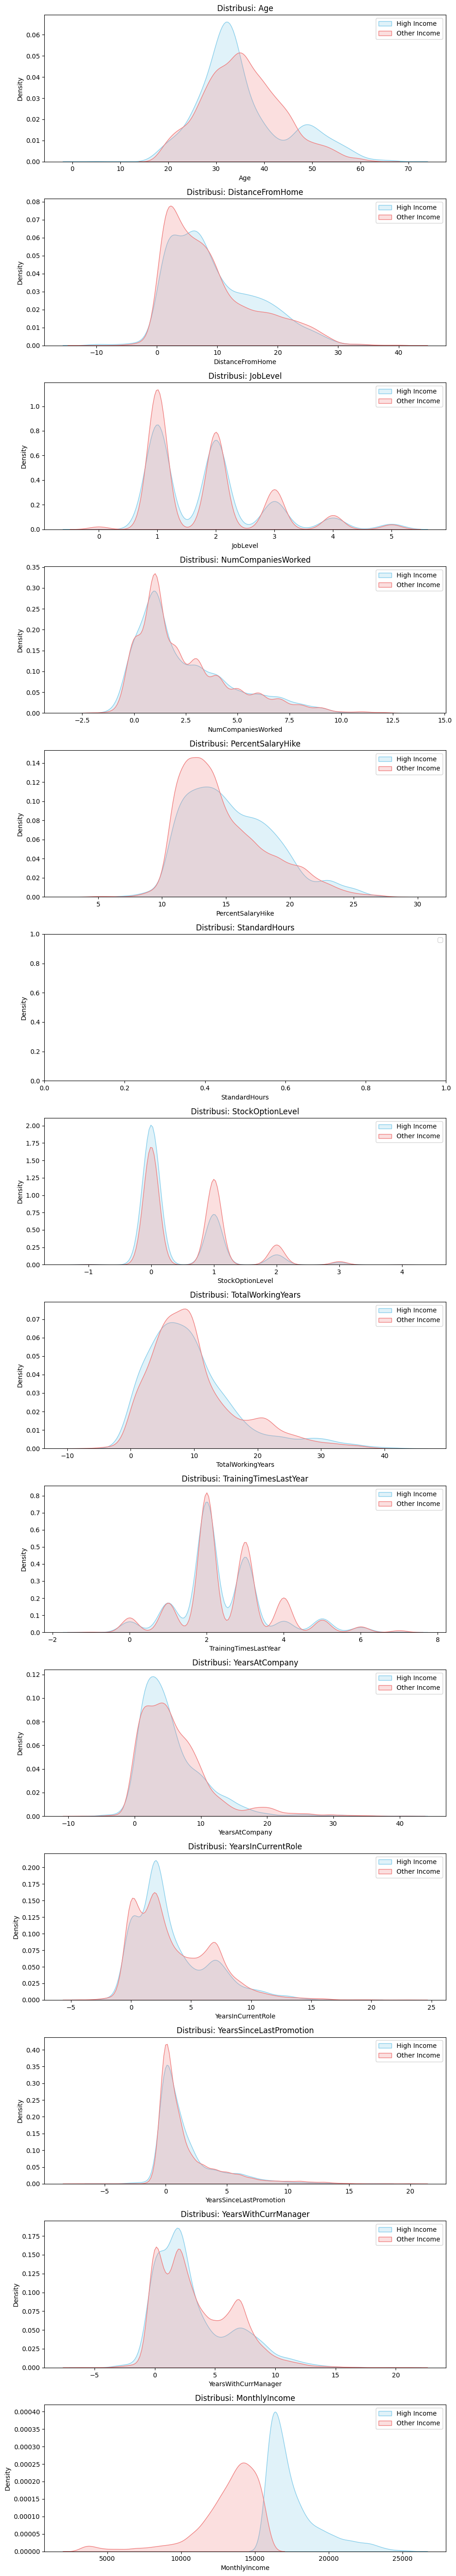

In [26]:
# Visualisasi distribusi untuk fitur numerik (membandingkan high vs other income)
print("\nVISUALISASI DISTRIBUSI FITUR NUMERIK (HIGH INCOME vs. OTHER INCOME):")
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 4 * len(numerical_cols)))
axes = axes.flatten() if len(numerical_cols) > 1 else [axes]

for i, col in enumerate(numerical_cols):
    sns.kdeplot(high_income_df[col].dropna(), ax=axes[i], fill=True, label='High Income', color='skyblue')
    sns.kdeplot(other_income_df[col].dropna(), ax=axes[i], fill=True, label='Other Income', color='lightcoral')
    axes[i].set_title(f'Distribusi: {col}')
    axes[i].legend()
plt.tight_layout()
plt.show()


PERBANDINGAN DISTRIBUSI FREKUENSI (Fitur Numerik):

--- Kolom: JobLevel ---
Karyawan Berpenghasilan Tinggi (%):
JobLevel
1    43.79
2    37.36
3    11.72
4     4.80
5     2.20
0     0.13
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
JobLevel
1    46.90
2    32.59
3    13.37
4     4.70
5     1.57
0     0.87
Name: proportion, dtype: float64


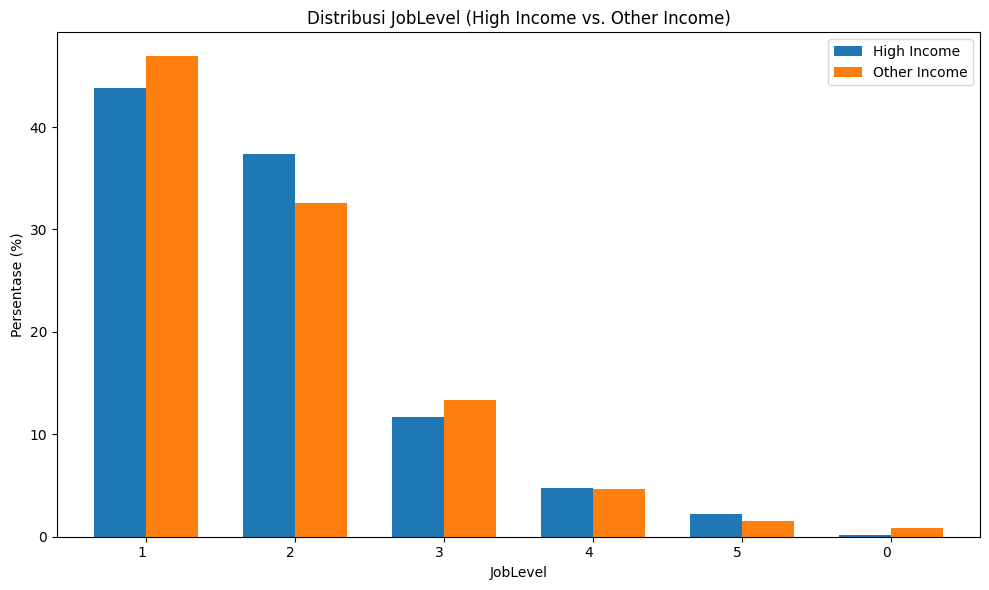


--- Kolom: StockOptionLevel ---
Karyawan Berpenghasilan Tinggi (%):
StockOptionLevel
 0    68.85
 1    24.89
 2     4.93
 3     1.10
-1     0.18
 4     0.04
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
StockOptionLevel
 0    51.98
 1    37.69
 2     8.77
 3     1.41
-1     0.10
 4     0.04
Name: proportion, dtype: float64


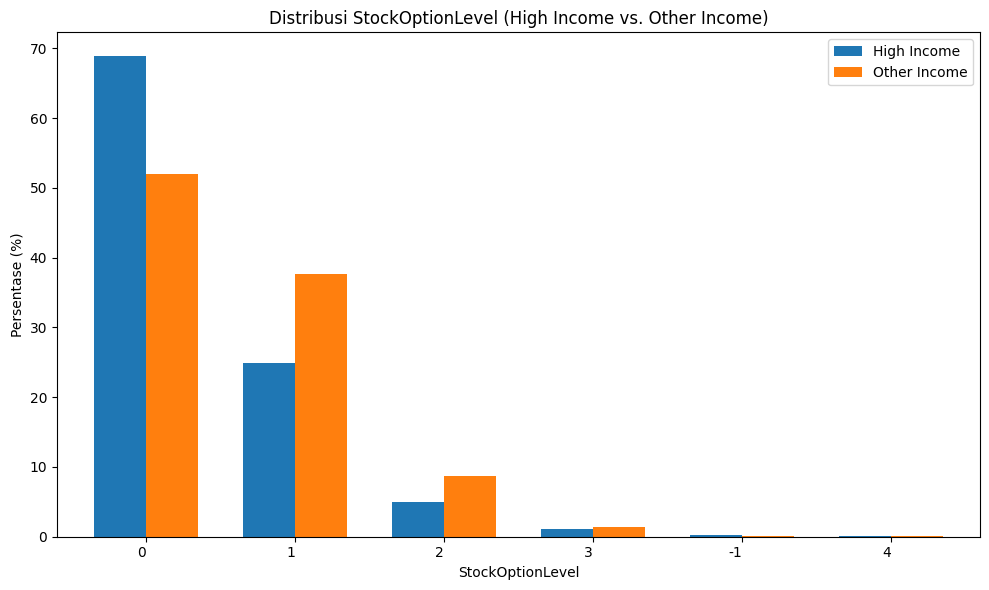


--- Kolom: TrainingTimesLastYear ---
Karyawan Berpenghasilan Tinggi (%):
TrainingTimesLastYear
 2    47.18
 3    27.22
 1    10.66
 5     4.93
 4     4.05
 0     3.88
 6     1.85
 7     0.18
-1     0.04
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
TrainingTimesLastYear
 2    42.45
 3    27.51
 4    10.52
 1     8.95
 0     4.45
 5     3.76
 6     1.72
 7     0.56
-1     0.09
Name: proportion, dtype: float64


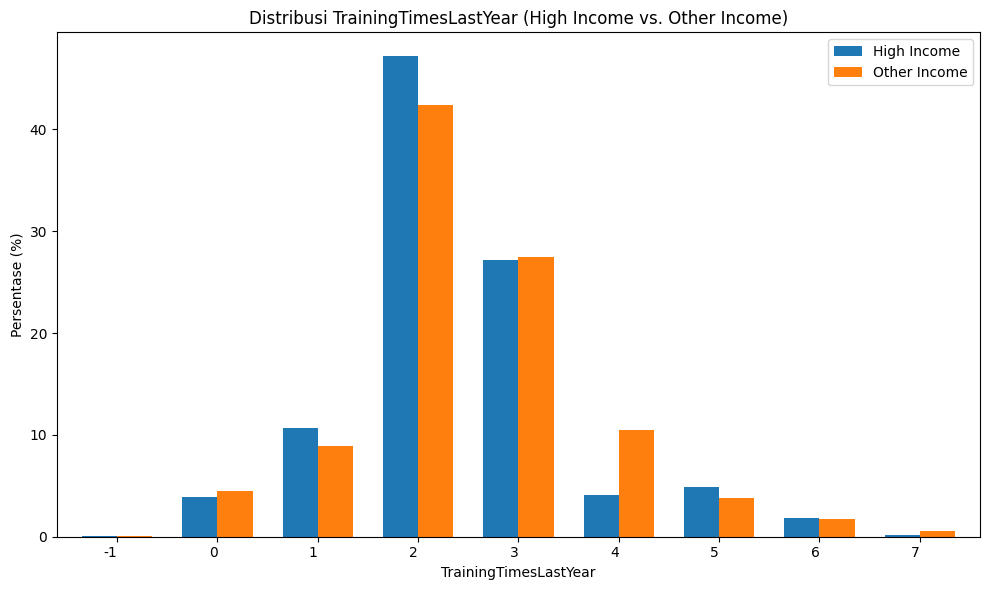

In [27]:
print("\nPERBANDINGAN DISTRIBUSI FREKUENSI (Fitur Numerik):")
sub_numerical_cols = ['JobLevel', 'StockOptionLevel', 'TrainingTimesLastYear']
for col in sub_numerical_cols:
    print(f"\n--- Kolom: {col} ---")
    print("Karyawan Berpenghasilan Tinggi (%):")
    high_income_prop = high_income_df[col].value_counts(normalize=True).mul(100).round(2)
    print(high_income_prop)
    print("\nKaryawan Berpenghasilan Lainnya (%):")
    other_income_prop = other_income_df[col].value_counts(normalize=True).mul(100).round(2)
    print(other_income_prop)

    # Visualisasi perbandingan untuk fitur kategorikal kunci

    plt.figure(figsize=(10, 6))
    # Gabungkan data untuk plot perbandingan
    plot_df = pd.DataFrame({
        'High Income': high_income_prop,
        'Other Income': other_income_prop
    }).fillna(0) # Isi NaN dengan 0 jika kategori tidak ada di salah satu grup
    plot_df.plot(kind='bar', ax=plt.gca(), width=0.7)
    plt.title(f'Distribusi {col} (High Income vs. Other Income)')
    plt.ylabel('Persentase (%)')
    plt.xticks(rotation=0, ha='right')
    plt.tight_layout()
    plt.show()

Insight yang didapat dari disitribusi fitur numerik berdasarkan KDE Plot dan statistik deskriptif:
- Jarak dari rumah ke kantor (DistanceFromHome) karyawan dengan gaji lebih tinggi secara rata-rata lebih jauh dibanding dengan rata-rata DistanceFromHome karyawan yang berpenghasilan lebih rendah.
- Hal yang sama juga terjadi pada atribut PercentSalaryHike (persentase kenaikan gaji terakhir) yang nilai rata-rata karyawan dengan High Income lebih tinggi dibanding dengan nilai rata-rata karyawan dengan pendapatan lebih rendah.

Insight yang didapat dari disitribusi fitur numerik berdasarkan bar chart:
- Karyawan dengan pendapatan lebih tinggi sering dijumpai berada pada tingkat jabatan (JobLevel) 2, 4, dan 5. Hal ini sangat logis karena tingkat jabatan yang lebih tinggi biasanya disertai dengan tanggung jawab yang lebih besar dan pendapatan atau kompensasi yang lebih tinggi.
- Tingkat opsi saham yang diberikan ke karyawan dengan high income lebih sering pada StockOptionLevel 0.
- Jumlah pelatihan yang diikuti karyawan dalam setahun terakhir (TrainingTimesLastYear) lebih tinggi untuk pekerja high income paling tinggi ketika jumlah pelatihannya mencapai 2 kali, lalu diikuti dengan 1 kali, 5 kali, dan 6 kali.

### Analisis Fitur Kategorikal

PERBANDINGAN DISTRIBUSI FREKUENSI (FITUR KATEGORIKAL):

--- Kolom: BusinessTravel ---
Karyawan Berpenghasilan Tinggi (%):
BusinessTravel
Travel_Rarely        55.95
Travel_Frequently    30.84
Non-Travel           13.22
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
BusinessTravel
Travel_Rarely        54.52
Travel_Frequently    32.93
Non-Travel           12.54
Name: proportion, dtype: float64


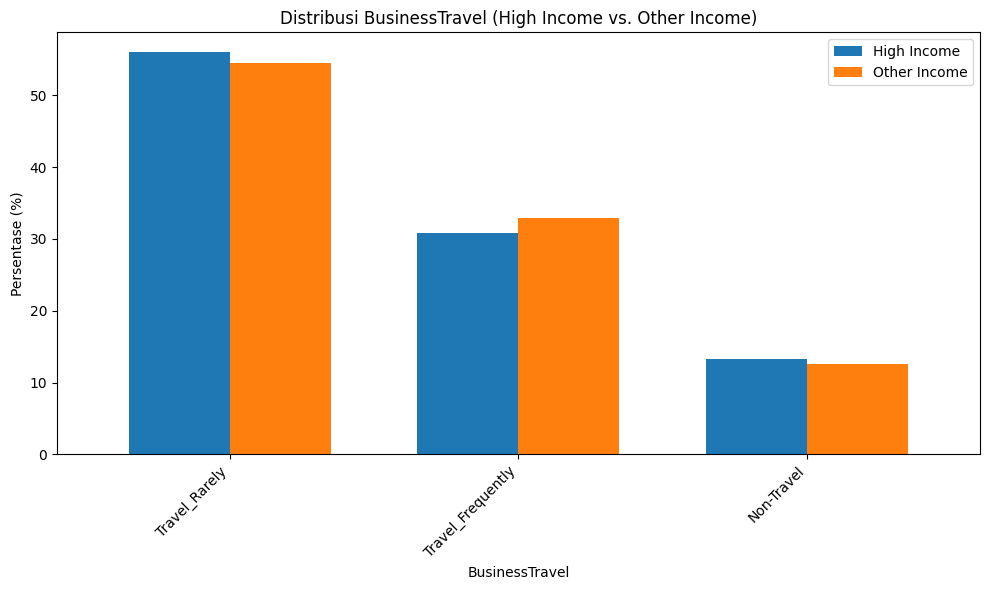


--- Kolom: Department ---
Karyawan Berpenghasilan Tinggi (%):
Department
Research & Development    75.09
Sales                     18.23
Human Resources            6.68
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
Department
Research & Development    72.60
Sales                     17.72
Human Resources            9.68
Name: proportion, dtype: float64


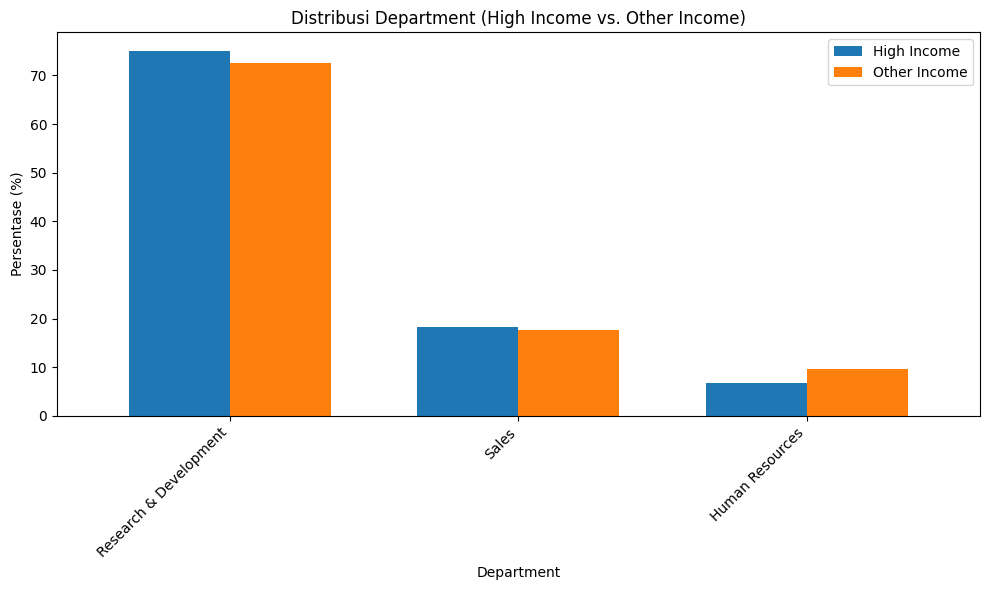


--- Kolom: Education ---
Karyawan Berpenghasilan Tinggi (%):
Education
Bachelor         47.46
College          23.59
Master           14.42
Below College    13.48
Doctor            1.05
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
Education
Bachelor         42.38
College          28.32
Master           14.37
Below College    14.09
Doctor            0.84
Name: proportion, dtype: float64


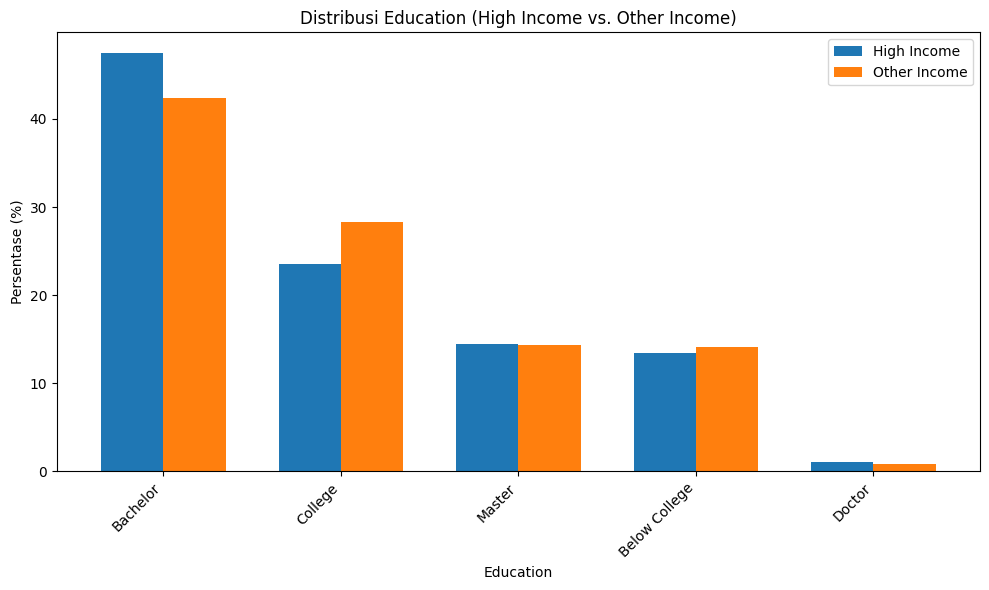


--- Kolom: EducationField ---
Karyawan Berpenghasilan Tinggi (%):
EducationField
Life Sciences       42.25
Marketing           24.54
Medical             24.39
Human Resources      4.32
Other                4.16
Technical Degree     0.35
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
EducationField
Life Sciences       38.20
Medical             22.61
Marketing           20.55
Other                8.22
Human Resources      5.38
Technical Degree     5.03
Name: proportion, dtype: float64


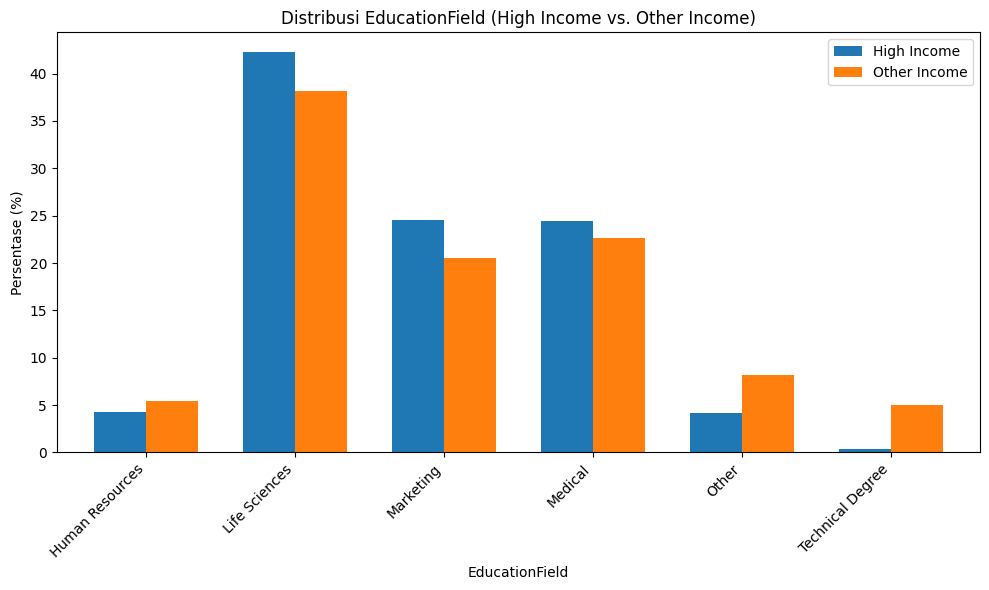


--- Kolom: EnvironmentSatisfaction ---
Karyawan Berpenghasilan Tinggi (%):
EnvironmentSatisfaction
High         35.59
Medium       26.16
Low          22.02
Very High    16.24
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
EnvironmentSatisfaction
High         34.60
Medium       29.16
Low          21.62
Very High    14.62
Name: proportion, dtype: float64


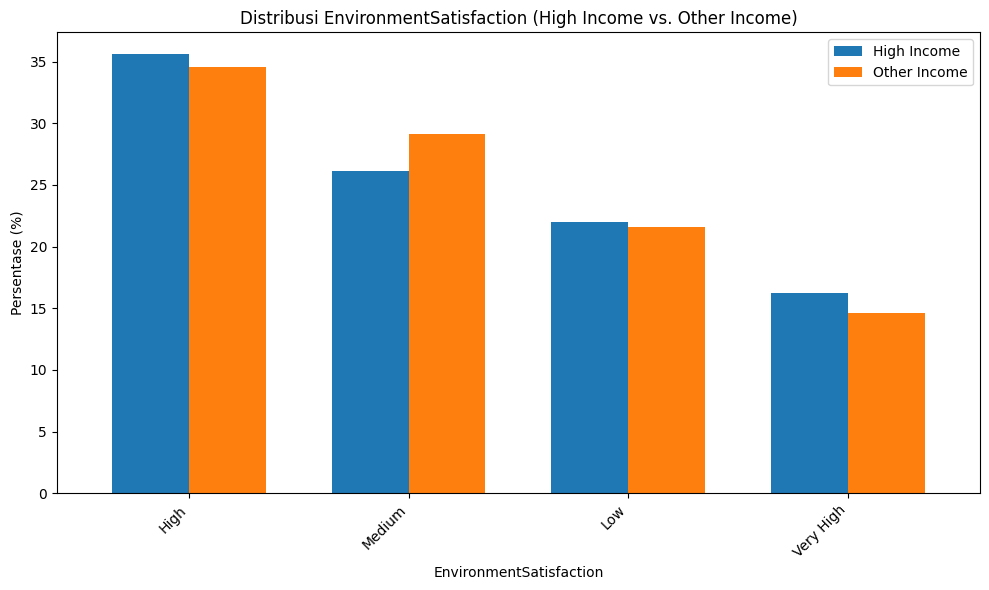


--- Kolom: Gender ---
Karyawan Berpenghasilan Tinggi (%):
Gender
Male      62.46
Female    37.54
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
Gender
Male      55.27
Female    44.73
Name: proportion, dtype: float64


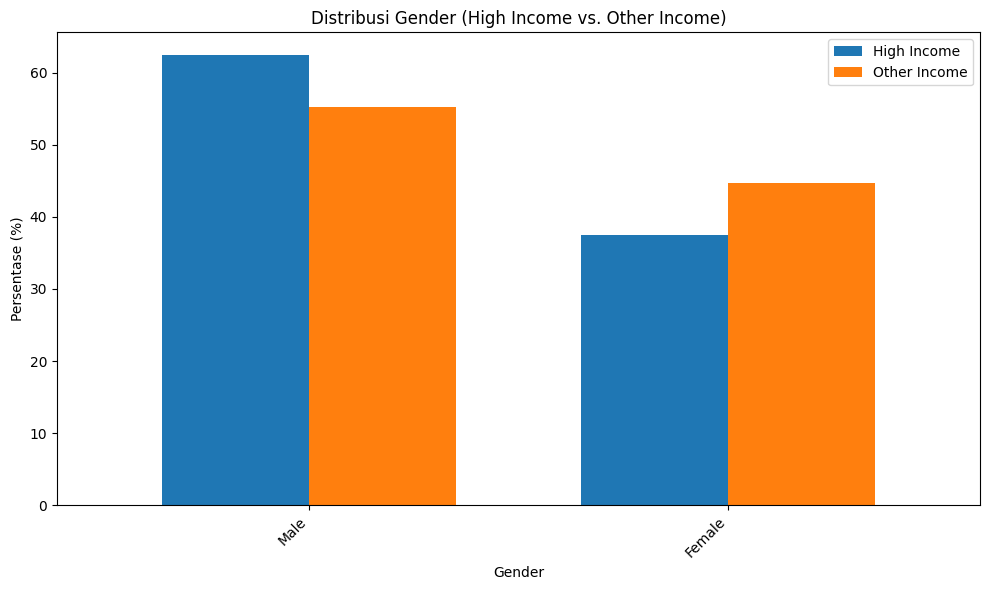


--- Kolom: JobInvolvement ---
Karyawan Berpenghasilan Tinggi (%):
JobInvolvement
High         52.52
Medium       36.40
Low           8.81
Very High     2.26
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
JobInvolvement
High         47.21
Medium       40.76
Low           7.70
Very High     4.33
Name: proportion, dtype: float64


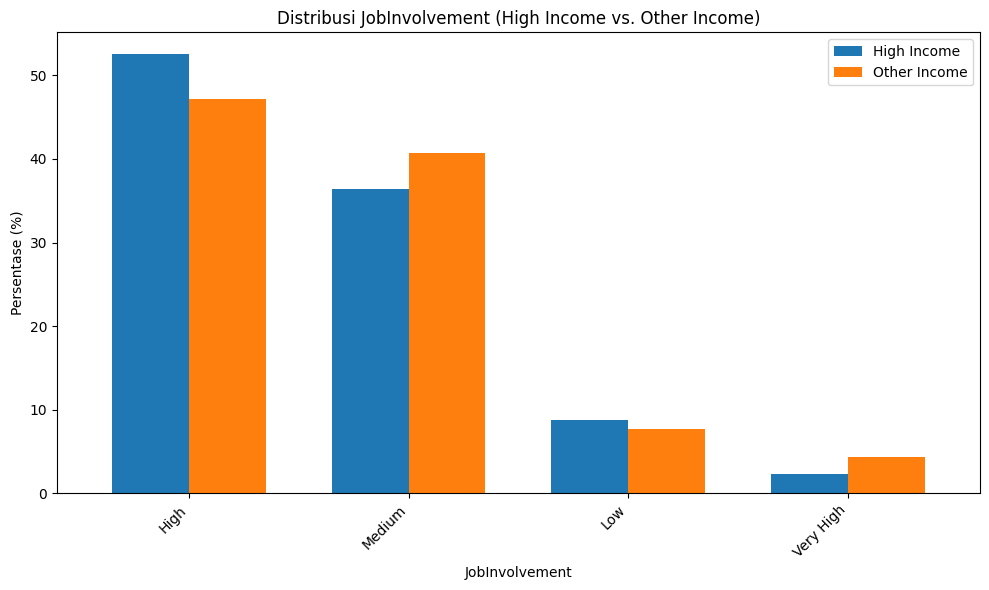


--- Kolom: JobRole ---
Karyawan Berpenghasilan Tinggi (%):
JobRole
Research Scientist           23.74
Sales Executive              19.16
Manufacturing Director       14.93
Laboratory Technician        12.60
Manager                      10.70
Research Director             8.59
Human Resources               4.63
Healthcare Representative     4.58
Sales Representative          1.06
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
JobRole
Research Scientist           17.82
Sales Executive              15.80
Laboratory Technician        15.64
Manufacturing Director       11.55
Research Director            10.77
Manager                      10.16
Healthcare Representative     7.40
Human Resources               6.52
Sales Representative          4.33
Name: proportion, dtype: float64


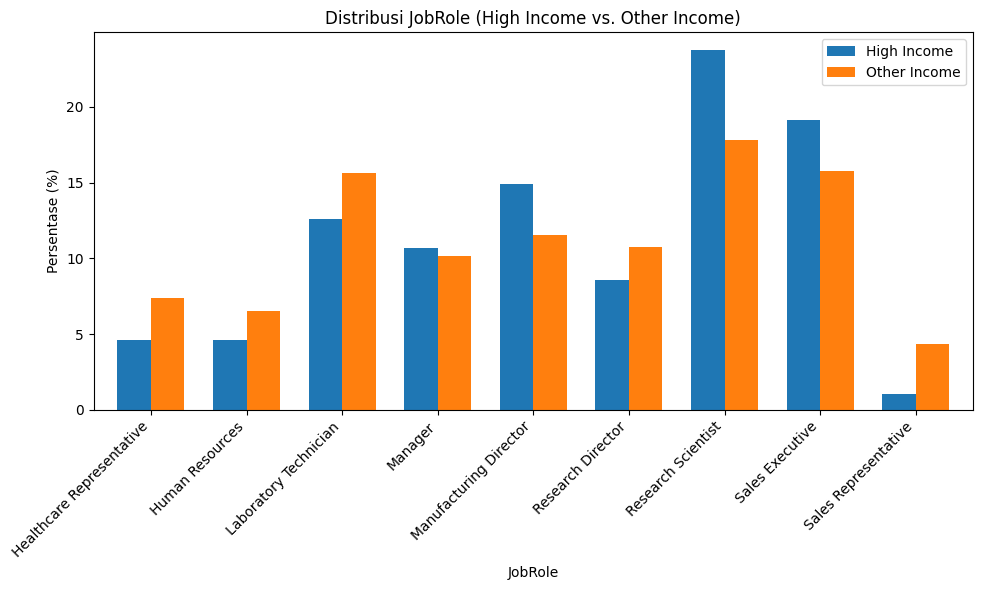


--- Kolom: JobSatisfaction ---
Karyawan Berpenghasilan Tinggi (%):
JobSatisfaction
High         37.58
Medium       31.68
Low          22.33
Very High     8.41
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
JobSatisfaction
High         34.15
Medium       27.42
Low          20.95
Very High    17.48
Name: proportion, dtype: float64


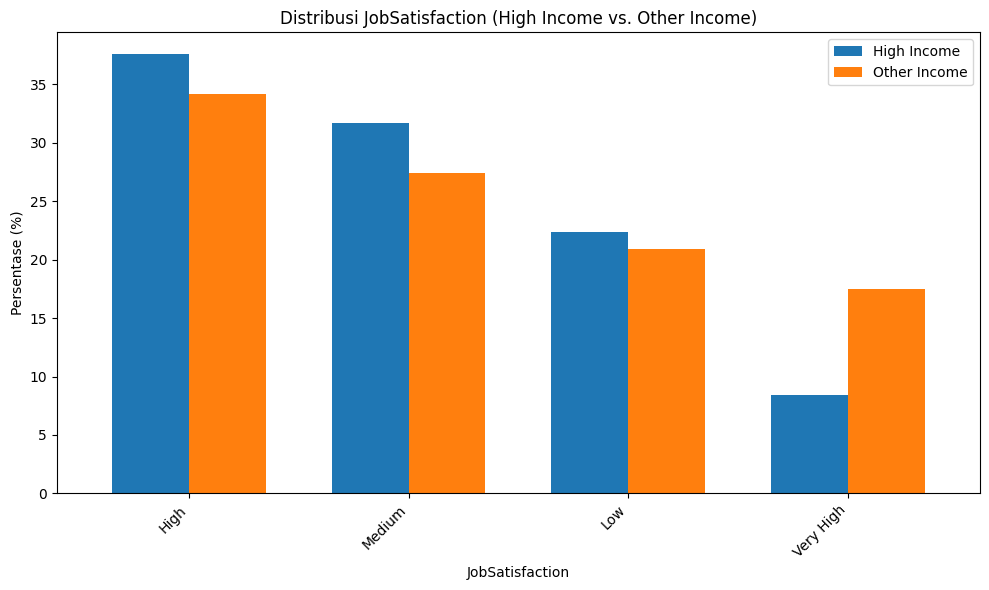


--- Kolom: MaritalStatus ---
Karyawan Berpenghasilan Tinggi (%):
MaritalStatus
Married     49.87
Divorced    25.64
Single      24.49
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
MaritalStatus
Married     51.23
Divorced    32.29
Single      16.48
Name: proportion, dtype: float64


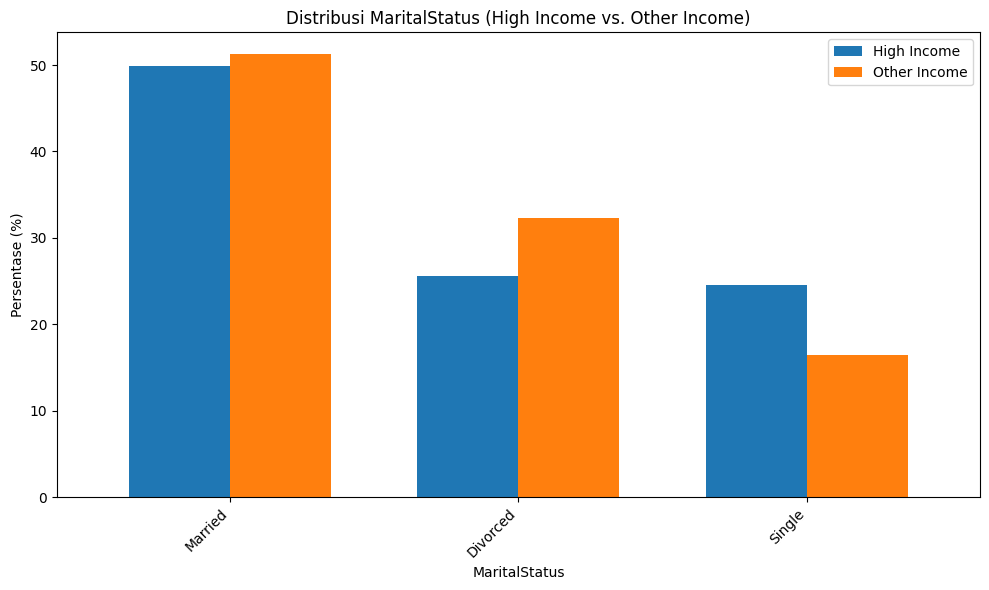


--- Kolom: OverTime ---
Karyawan Berpenghasilan Tinggi (%):
OverTime
No     83.17
Yes    16.83
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
OverTime
No     81.92
Yes    18.08
Name: proportion, dtype: float64


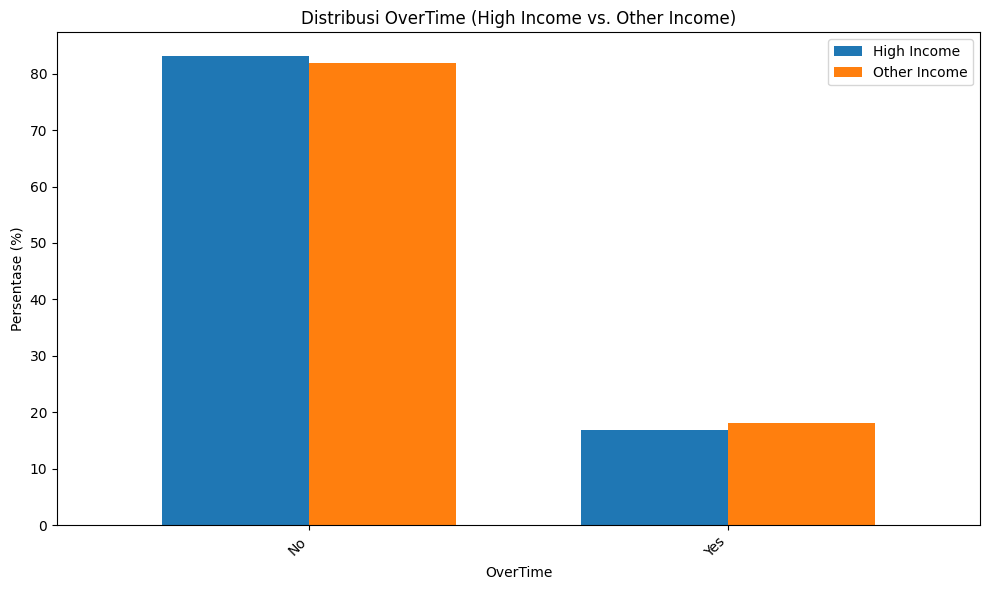


--- Kolom: PerformanceRating ---
Karyawan Berpenghasilan Tinggi (%):
PerformanceRating
Excellent      89.56
Outstanding     7.89
Good            2.56
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
PerformanceRating
Excellent      91.13
Outstanding     7.07
Good            1.81
Name: proportion, dtype: float64


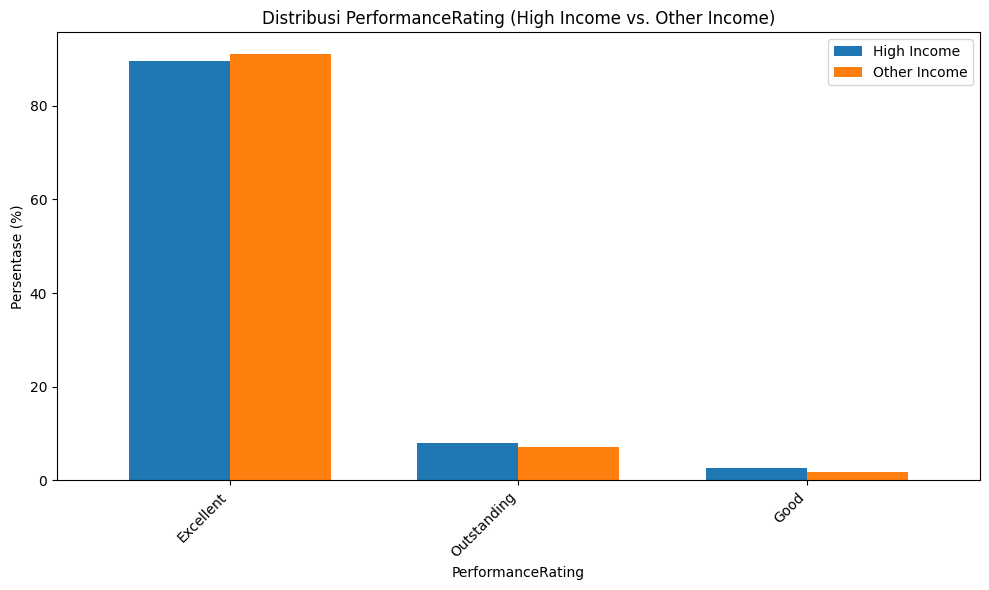


--- Kolom: RelationshipSatisfaction ---
Karyawan Berpenghasilan Tinggi (%):
RelationshipSatisfaction
High         35.34
Medium       30.40
Low          19.11
Very High    15.15
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
RelationshipSatisfaction
High         36.75
Medium       30.21
Low          20.01
Very High    13.03
Name: proportion, dtype: float64


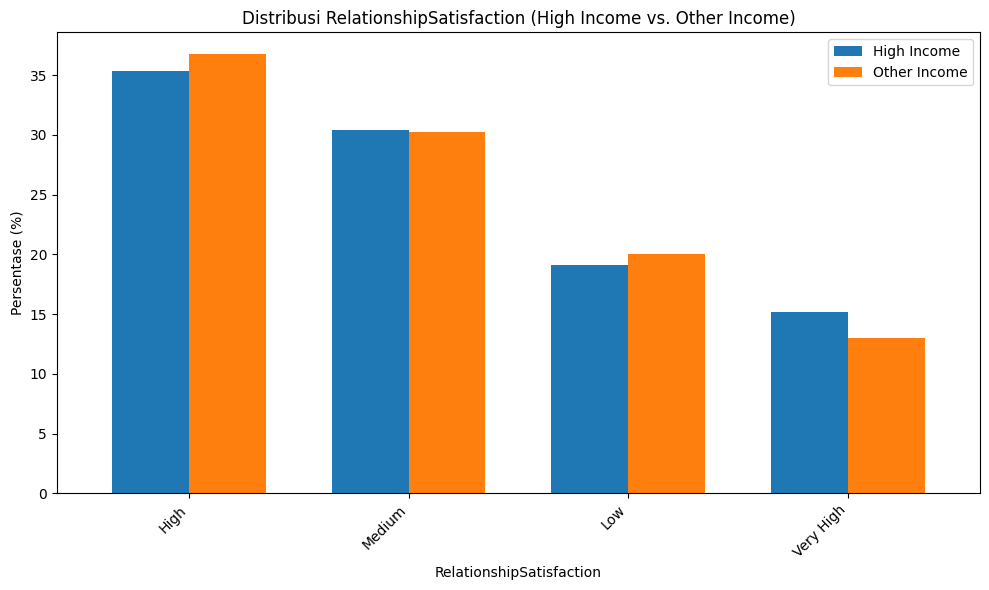


--- Kolom: WorkLifeBalance ---
Karyawan Berpenghasilan Tinggi (%):
WorkLifeBalance
Better    52.33
Good      39.18
Bad        5.91
Best       2.58
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
WorkLifeBalance
Better    53.37
Good      32.96
Bad        8.46
Best       5.22
Name: proportion, dtype: float64


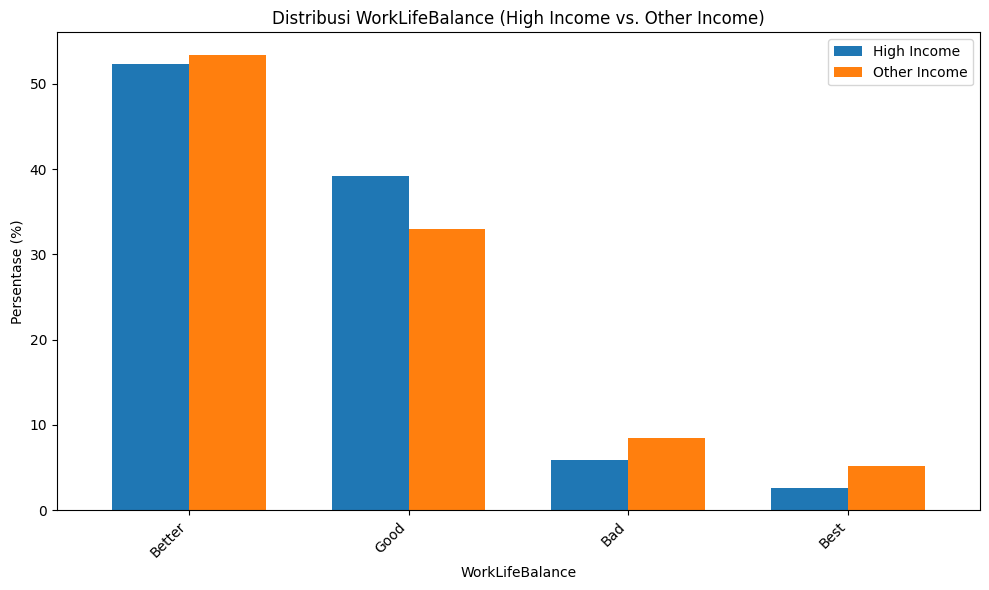


--- Kolom: Attrition ---
Karyawan Berpenghasilan Tinggi (%):
Attrition
No     86.61
Yes    13.39
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
Attrition
No     78.39
Yes    21.61
Name: proportion, dtype: float64


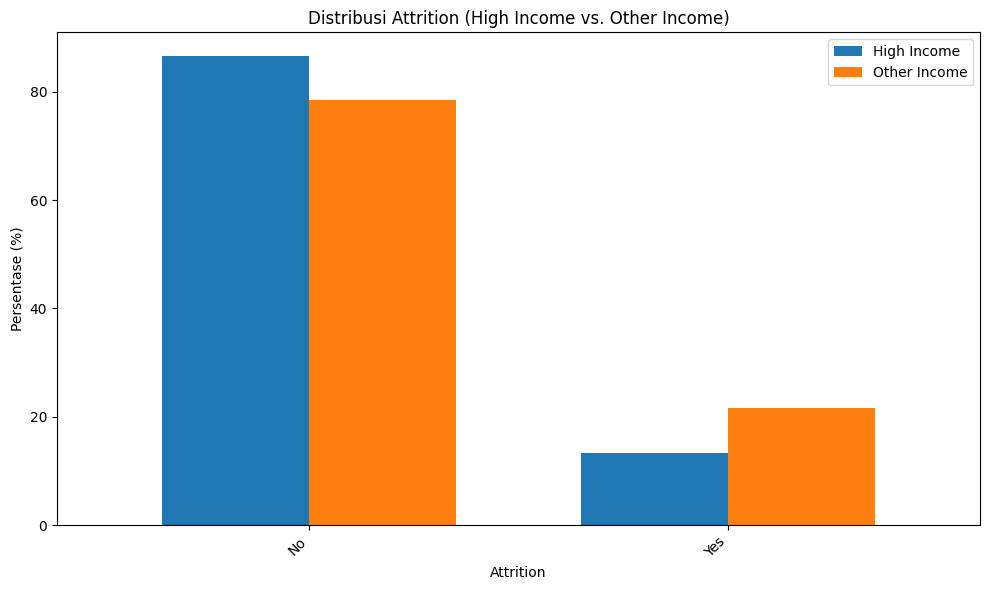

In [28]:
print("PERBANDINGAN DISTRIBUSI FREKUENSI (FITUR KATEGORIKAL):")
for col in categorical_cols:
    print(f"\n--- Kolom: {col} ---")
    print("Karyawan Berpenghasilan Tinggi (%):")
    high_income_prop = high_income_df[col].value_counts(normalize=True).mul(100).round(2)
    print(high_income_prop)
    print("\nKaryawan Berpenghasilan Lainnya (%):")
    other_income_prop = other_income_df[col].value_counts(normalize=True).mul(100).round(2)
    print(other_income_prop)

    # Visualisasi perbandingan untuk fitur kategorikal kunci

    plt.figure(figsize=(10, 6))
    # Gabungkan data untuk plot perbandingan
    plot_df = pd.DataFrame({
        'High Income': high_income_prop,
        'Other Income': other_income_prop
    }).fillna(0) # Isi NaN dengan 0 jika kategori tidak ada di salah satu grup
    plot_df.plot(kind='bar', ax=plt.gca(), width=0.7)
    plt.title(f'Distribusi {col} (High Income vs. Other Income)')
    plt.ylabel('Persentase (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Insight yang didapat dari perbandingan distribusi frekuensi pada fitur kategorikal:
- Mayoritas karyawan berpenghasilan tinggi (High Income) bekerja di departemen Research & Development, diikuti oleh Sales. Sedangkan pada proporsi pada departemen Human Resources lebih kecil pada kelompok berpenghasilan tinggi dibanding kelompok lainnya.
- Karyawan yang memiliki High Income cenderung memiliki tingkat pendidikan Bachelor, Master, dan Doctor yang proporsinya lebih tinggi dibanding kelompok berpendapatan rendah. Ini menunjukkan bahwa pendidikan yang lebih tinggi seringkali menjadi prasyarat untuk posisi bergaji tinggi.
- Bidang pendidikan seperti Life Sciences, Marketing, dan Medical merupakan bidang studi yang paling sering ditemukan pada karyawan berpenghasilan tinggi.
- Orang yang memiliki High Income cenderung memiliki kepuasan terhadap lingkungan kerja (EnvironmentSatisfaction) yang rendah, tinggi, dan bahkan sangat tinggi sehingga mengindikasikan lingkungan kerja yang baik menjadi faktor penting.
- Gender yang lebih sering memiliki High Income adalah laki-laki dibanding perempuan. Ini menunjukkan adanya ketidakseimbangan gender dalam distribusi pendapatan tinggi di dataset ini.
- JobInvolvement (keterlibatan pekerjaan) bagi karyawan High Income menunjukkan yang dominan High dan Low.
- JobRole yang seringkali mendapat High Income adalah Research Scientist, Sales Executive, Manufacturing Director, dan Manager.
- High Income lebih banyak didapatkan oleh kalangan single dibanding dengan kelompok pendapatan lain. Sebaliknya, kelompok menikah memiliki proporsi pendapatan high income yang sedikit lebih rendah dibanding kelompok pendapatan lain. Namun, kelompok bercerai memiliki proporsi yang jauh lebih sedikit bagi pendapatan high income.
- RelationshipSatisfaction (Kepuasan Hubungan) hanya bernilai Medium dan Very High untuk proporsi data dengan HighIncome yang lebih tinggi dibanding kelompok lain.
- Mayoritas karyawan berpenghasilan tinggi melaporkan work life balance (keseimbangan kehidupan kerja) yang dimiliki High Income hanya berkategori Good yang proporsinya lebih tinggi dibanding kelompok pendapatan lain. Sedangkan kelompok High Income pada Better, Bad, dan Best memiliki selisih yang tidak signifikan tetapi lebih rendah dari kelompok other income.
- Karyawan berpenghasilan tinggi cenderung untuk tidak ingin meninggalkan pekerjaan mereka yang terlihat dari nilai No pada Attrition yang tinggi dan nilai Yes pada Attrition yang rendah untuk kelompok High Income.

Ciri-ciri yang tidak berbeda signifikan:
- High Income sedikit lebih tinggi untuk Travel_Rarely (jarang melakukan perjalanan) atau bahkan bukan orang yang suka melakukan perjalanan (Non-Travel).
- Distribusi overtime hanya sedikit lebih tinggi proporsi high income pada kategori No untuk melakukan kerja lembur.
- Distribusi performance rating hanya sedikit lebih tinggi proporsi high income pada kategori outstanding dan good.
- Job Satisfaction bagi orang yang memiliki High Income lebih kecil persentasenya dibanding Other Income untuk kategori Very High. Sedangkan sebaliknya High, Medium, dan Low memiliki persentase lebih tinggi bagi orang-orang yang memiliki High Income.

### Korelasi

In [29]:
print("\n--- ANALISIS KORELASI PADA SELURUH DATASET ---")
# Seleksi hanya fitur numerik untuk perhitungan korelasi
# Pastikan hanya kolom yang ada di numerical_cols
numeric_df_for_corr = df_eda[numerical_cols].select_dtypes(include=[np.number])


--- ANALISIS KORELASI PADA SELURUH DATASET ---


In [30]:
# Implementasi korelasi Pearson hanya untuk fitur numerik
print("\nMATRIKS KORELASI PEARSON:")
correlation_matrix_pearson = numeric_df_for_corr.corr(method='pearson')
correlation_matrix_pearson


MATRIKS KORELASI PEARSON:


Age  DistanceFromHome  JobLevel  \
Age                      1.000000          0.017978  0.518436   
DistanceFromHome         0.017978          1.000000  0.050288   
JobLevel                 0.518436          0.050288  1.000000   
NumCompaniesWorked       0.258927         -0.044644  0.125521   
PercentSalaryHike       -0.043837          0.008046 -0.030349   
StandardHours                 NaN               NaN       NaN   
StockOptionLevel         0.076189          0.029534  0.076678   
TotalWorkingYears        0.696964          0.015785  0.751601   
TrainingTimesLastYear    0.022875         -0.049552  0.017930   
YearsAtCompany           0.369113          0.031198  0.554647   
YearsInCurrentRole       0.281321          0.032841  0.445727   
YearsSinceLastPromotion  0.258336          0.039962  0.377447   
YearsWithCurrManager     0.254567          0.017897  0.413049   
MonthlyIncome            0.017090          0.065475  0.052360   

                         NumCompaniesWorked  PercentSalaryHike  StandardHours  \
Age                                0.258927          -0.043837            NaN   
DistanceFromHome                  -0.044644           0.008046            NaN   
JobLevel                           0.125521          -0.030349            NaN   
NumCompaniesWorked                 1.000000           0.035617            NaN   
PercentSalaryHike                  0.035617           1.000000            NaN   
StandardHours                           NaN                NaN            NaN   
StockOptionLevel                   0.010684          -0.037771            NaN   
TotalWorkingYears                  0.204901          -0.059815            NaN   
TrainingTimesLastYear             -0.026270          -0.015402            NaN   
YearsAtCompany                    -0.086764          -0.048214            NaN   
YearsInCurrentRole                -0.070301          -0.011901            NaN   
YearsSinceLastPromotion           -0.023666          -0.017791            NaN   
YearsWithCurrManager              -0.081605          -0.032223            NaN   
MonthlyIncome                     -0.049817           0.025721            NaN   

                         StockOptionLevel  TotalWorkingYears  \
Age                              0.076189           0.696964   
DistanceFromHome                 0.029534           0.015785   
JobLevel                         0.076678           0.751601   
NumCompaniesWorked               0.010684           0.204901   
PercentSalaryHike               -0.037771          -0.059815   
StandardHours                         NaN                NaN   
StockOptionLevel                 1.000000           0.058349   
TotalWorkingYears                0.058349           1.000000   
TrainingTimesLastYear            0.054273           0.045861   
YearsAtCompany                   0.043916           0.649288   
YearsInCurrentRole               0.065542           0.511243   
YearsSinceLastPromotion          0.024072           0.425390   
YearsWithCurrManager             0.049273           0.486912   
MonthlyIncome                   -0.163042          -0.019972   

                         TrainingTimesLastYear  YearsAtCompany  \
Age                                   0.022875        0.369113   
DistanceFromHome                     -0.049552        0.031198   
JobLevel                              0.017930        0.554647   
NumCompaniesWorked                   -0.026270       -0.086764   
PercentSalaryHike                    -0.015402       -0.048214   
StandardHours                              NaN             NaN   
StockOptionLevel                      0.054273        0.043916   
TotalWorkingYears                     0.045861        0.649288   
TrainingTimesLastYear                 1.000000       -0.001258   
YearsAtCompany                       -0.001258        1.000000   
YearsInCurrentRole                   -0.019256        0.780864   
YearsSinceLastPromotion              -0.013006        0.640535   
YearsWithCurrManage

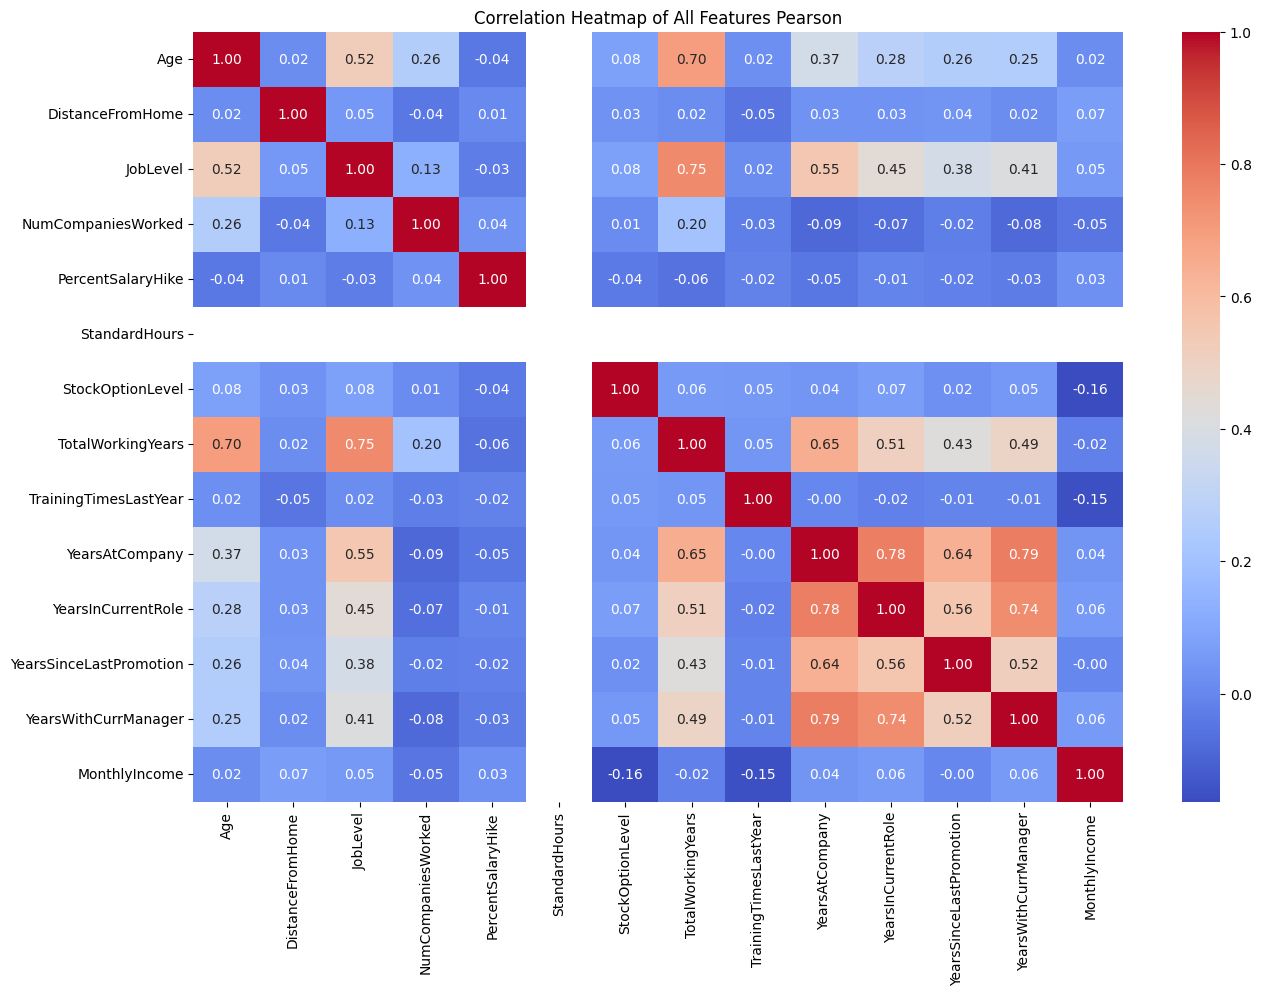

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Features Pearson')
plt.show()

In [32]:
print("\nMATRIKS KORELASI SPEARMAN:")
correlation_matrix_spearman = numeric_df_for_corr.corr(method='spearman')
correlation_matrix_spearman


MATRIKS KORELASI SPEARMAN:


Age  DistanceFromHome  JobLevel  \
Age                      1.000000         -0.009601  0.493684   
DistanceFromHome        -0.009601          1.000000  0.055744   
JobLevel                 0.493684          0.055744  1.000000   
NumCompaniesWorked       0.305655         -0.019156  0.163647   
PercentSalaryHike       -0.023456          0.018389 -0.034151   
StandardHours                 NaN               NaN       NaN   
StockOptionLevel         0.102575          0.017416  0.103368   
TotalWorkingYears        0.674185          0.005473  0.717779   
TrainingTimesLastYear    0.029779         -0.048176  0.011191   
YearsAtCompany           0.337926          0.025615  0.509490   
YearsInCurrentRole       0.276905          0.020184  0.446025   
YearsSinceLastPromotion  0.229800          0.031558  0.311103   
YearsWithCurrManager     0.252895         -0.000680  0.407102   
MonthlyIncome           -0.032762          0.086838  0.066399   

                         NumCompaniesWorked  PercentSalaryHike  StandardHours  \
Age                                0.305655          -0.023456            NaN   
DistanceFromHome                  -0.019156           0.018389            NaN   
JobLevel                           0.163647          -0.034151            NaN   
NumCompaniesWorked                 1.000000           0.003058            NaN   
PercentSalaryHike                  0.003058           1.000000            NaN   
StandardHours                           NaN                NaN            NaN   
StockOptionLevel                   0.009636          -0.032068            NaN   
TotalWorkingYears                  0.288691          -0.057438            NaN   
TrainingTimesLastYear             -0.014955          -0.016864            NaN   
YearsAtCompany                    -0.090888          -0.063449            NaN   
YearsInCurrentRole                -0.064702          -0.032543            NaN   
YearsSinceLastPromotion           -0.029813          -0.033778            NaN   
YearsWithCurrManager              -0.079748          -0.042625            NaN   
MonthlyIncome                      0.000714           0.093503            NaN   

                         StockOptionLevel  TotalWorkingYears  \
Age                              0.102575           0.674185   
DistanceFromHome                 0.017416           0.005473   
JobLevel                         0.103368           0.717779   
NumCompaniesWorked               0.009636           0.288691   
PercentSalaryHike               -0.032068          -0.057438   
StandardHours                         NaN                NaN   
StockOptionLevel                 1.000000           0.092372   
TotalWorkingYears                0.092372           1.000000   
TrainingTimesLastYear            0.037576           0.034459   
YearsAtCompany                   0.076847           0.649173   
YearsInCurrentRole               0.069332           0.557863   
YearsSinceLastPromotion          0.023047           0.377417   
YearsWithCurrManager             0.069283           0.538736   
MonthlyIncome                   -0.189859          -0.005541   

                         TrainingTimesLastYear  YearsAtCompany  \
Age                                   0.029779        0.337926   
DistanceFromHome                     -0.048176        0.025615   
JobLevel                              0.011191        0.509490   
NumCompaniesWorked                   -0.014955       -0.090888   
PercentSalaryHike                    -0.016864       -0.063449   
StandardHours                              NaN             NaN   
StockOptionLevel                      0.037576        0.076847   
TotalWorkingYears                     0.034459        0.649173   
TrainingTimesLastYear                 1.000000       -0.002302   
YearsAtCompany                       -0.002302        1.000000   
YearsInCurrentRole                   -0.017146        0.866030   
YearsSinceLastPromotion              -0.011533        0.546526   
YearsWithCurrManage

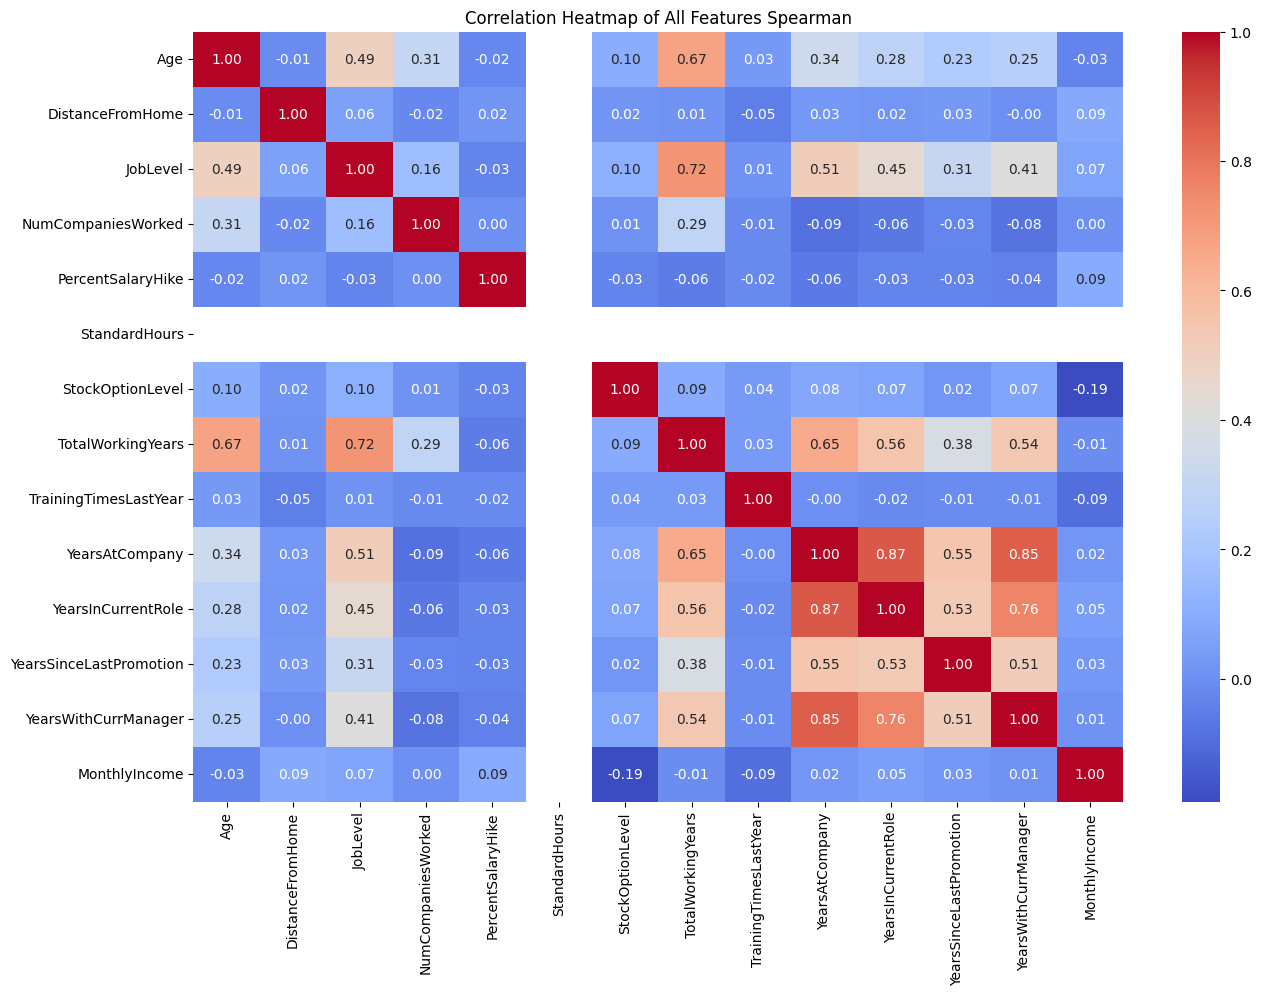

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Features Spearman')
plt.show()

Korelasi positif dengan MonthlyIncome:
- DistanceFromHome memiliki korelasi positif kuat dengan MonthlyIncome (Pearson: 0.065475, Spearman: 0.086838).
- JobLevel memiliki korelasi positif kuat dengan MonthlyIncome (Pearson: 0.052360, Spearman: 0.066399). Hal ini mengonfirmasi temuan dari analisis distribusi bahwa JobLevel merupakan salah satu faktor utama pendapatan karyawan.
- PercentSalaryHike memiliki korelasi positif dengan MonthlyIncome (Pearson: 0.025721, Spearman: 0.093503).
- YearsWithCurrManager memiliki korelasi positif lemah dengan MonthlyIncome (Pearson: 0.056531, Spearman: 0.007328).
- YearsInCurrentRole memiliki korelasi positif lemah dengan MonthlyIncome (Pearson: 0.055125, Spearman: 0.048092).
- YearsAtCompany memiliki korelasi positif lemah dengan MonthlyIncome (Pearson: 0.039510, Spearman: 0.023188).
- YearsWithCurrManager, YearsInCurrentRole, dan YearsAtCompany menunjukkan bahwa stabilitas dan pengalaman di posisi dan manajer saat ini sedikit berkontribusi pada pendapatan.

Korelasi negatif dengan MonthlyIncome:
- StockOptionLevel memiliki korelasi negatif yang cukup signifikan kuat dengan MonthlyIncome (Pearson: -0.163042, Spearman: -0.189859). Hal ini menarik karena seperti yang ditunjukkan pada bar chart sebelumnya bahwa karyawan dengan StockOptionLevel yang lebih rendah justru memiliki MonthlyIncome yang lebih tinggi.
- TrainingTimesLastYear memiliki korelasi negatif yang lemah dengan MonthlyIncome (Pearson: -0.149494, Spearman: -0.092406). Hal ini bisa diinterpretasikan bahwa karyawan yang sering mengikuti pelatihan mungkin berada di fase awal karir atau di posisi yang membutuhkan lebih banyak pengembangan, sedangkan karyawan dengan pendapatan tinggi mungkin sudah mapan dan tidak memerlukan banyak pelatihan formal.

Karyawan yang memiliki pendapatan tinggi cenderung memiliki karakteristik sebagai berikut.
- JobLevel yang tinggi (2, 4, 5)
- Pendidikan tinggi (Bachelor, Master, atau Doctor)
- Persentase kenaikan gaji (PercentSalaryHike) yang lebih tinggi
- Bidang studi (EducationField) umumnya Life Sciences, Marketing, atau Medical
- Umumnya bekerja di departemen Research & Development (R&D) atau Sales
- Cenderung tidak ingin meninggalkan perusahaan (Attrition ‘No’ tinggi)
- Jarak tempuh dari rumah ke kantor yang lebih jauh
- Opsi saham rendah (StockOptionLevel 0)
- Kepuasan lingkungan kerja (EnvironmentSatisfaction) cenderung tinggi atau sangat tinggi, walaupun WorkLifeBalance dominan pada kategori Good

# Data Preprocessing

## Missing Values

In [34]:
df_employee_train.isna().sum()

ID                             0
Age                            0
BusinessTravel                 0
Department                  1509
DistanceFromHome               0
Education                   1668
EducationField              1101
EnvironmentSatisfaction     1656
Gender                       543
JobInvolvement                31
JobLevel                       0
JobRole                        0
JobSatisfaction              195
MaritalStatus                  0
NumCompaniesWorked             0
OverTime                       0
PercentSalaryHike            572
PerformanceRating              0
RelationshipSatisfaction    1295
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears           1046
TrainingTimesLastYear          0
WorkLifeBalance             1141
YearsAtCompany              1110
YearsInCurrentRole             0
YearsSinceLastPromotion      532
YearsWithCurrManager         540
MonthlyIncome                  0
Attrition                      0
dtype: int64

In [35]:
# Select only numeric columns
numeric_employee_train = df_employee_train.select_dtypes(include=np.number)

# Calculate skewness for numeric columns
employee_train_skewness = numeric_employee_train.skew()
print("Skewness df_employee_train")
print(employee_train_skewness)

Skewness df_employee_train
Age                        0.494851
DistanceFromHome           0.936544
JobLevel                   1.147338
NumCompaniesWorked         1.225300
PercentSalaryHike          0.834625
StandardHours              0.000000
StockOptionLevel           1.152840
TotalWorkingYears          1.228393
TrainingTimesLastYear      0.660453
YearsAtCompany             1.892773
YearsInCurrentRole         1.025070
YearsSinceLastPromotion    2.243407
YearsWithCurrManager       0.934536
MonthlyIncome             -0.559169
dtype: float64


### Fill missing values

In [36]:
df_filled_missing_values = df_employee_train.copy()

In [37]:
def fill_null(df, column_name, distribution_type):
    """
    Fills null values in a DataFrame column based on the distribution type.

    Args:
        df: pandas DataFrame.
        column_name: Name of the column to fill.
        distribution_type: Distribution type of the column ('normal', 'skewed', or 'categorical').

    Returns:
        pandas DataFrame with filled null values.
    """

    if df[column_name].dtype == 'object':  # If the column is categorical (non-numeric)
        # If the column is categorical, use the mode for imputation.
        replacement_value = df[column_name].mode()[0]  # Get the first mode value if multiple modes
    elif distribution_type == 'normal':
        # If the column is normally distributed, use the mean for imputation.
        replacement_value = df[column_name].mean()
    elif distribution_type == 'skewed':
        # If the column is skewed, use the median for imputation.
        replacement_value = df[column_name].median()
    else:
        # For unknown distribution types or if no imputation method is specified, fill with 0.
        replacement_value = 0

    df[column_name] = df[column_name].fillna(replacement_value)
    return df  # Return the updated DataFrame

In [38]:
fill_null(df_filled_missing_values, 'Department', '')

fill_null(df_filled_missing_values, 'Education', '')

fill_null(df_filled_missing_values, 'EducationField', '')

fill_null(df_filled_missing_values, 'EnvironmentSatisfaction', '')

fill_null(df_filled_missing_values, 'Gender', '')

fill_null(df_filled_missing_values, 'JobInvolvement', '')

fill_null(df_filled_missing_values, 'JobSatisfaction', '')

fill_null(df_filled_missing_values, 'PercentSalaryHike', 'skewed')

fill_null(df_filled_missing_values, 'RelationshipSatisfaction', '')

fill_null(df_filled_missing_values, 'TotalWorkingYears', 'skewed')

fill_null(df_filled_missing_values, 'WorkLifeBalance', '')

fill_null(df_filled_missing_values, 'YearsAtCompany', 'skewed')

fill_null(df_filled_missing_values, 'YearsSinceLastPromotion', 'skewed')

fill_null(df_filled_missing_values, 'YearsWithCurrManager', 'skewed')

df_filled_missing_values.head()

ID  Age     BusinessTravel              Department  DistanceFromHome  \
0  S1   28      Travel_Rarely  Research & Development                 4   
1  S2   25  Travel_Frequently                   Sales                14   
2  S3   36      Travel_Rarely  Research & Development                 3   
3  S4   36  Travel_Frequently  Research & Development                 4   
4  S5   38  Travel_Frequently  Research & Development                12   

       Education EducationField EnvironmentSatisfaction Gender JobInvolvement  \
0       Bachelor          Other               Very High   Male           High   
1  Below College      Marketing                    High   Male           High   
2  Below College      Marketing                  Medium   Male         Medium   
3       Bachelor  Life Sciences               Very High   Male           High   
4       Bachelor  Life Sciences               Very High   Male         Medium   

   ...  StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
0  ...                 0               8.0                     4   
1  ...                 0               6.0                     2   
2  ...                 1              10.0                     3   
3  ...                 3              18.0                     3   
4  ...                 0               8.0                     4   

  WorkLifeBalance  YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0            Good             4.0                  1                      0.0   
1            Good             5.0                  4                      1.0   
2             Bad             9.0                  4                      1.0   
3          Better             4.0                  2                      0.0   
4            Good             5.0                  3                      1.0   

  YearsWithCurrManager MonthlyIncome  Attrition  
0                  2.0      14115.06         No  
1                  4.0      16661.93        Yes  
2                  4.0      13178.42         No  
3                  2.0      13601.03         No  
4                  3.0      15419.15         No  

[5 rows x 30 columns]

In [39]:
df_filled_missing_values.isna().sum()

ID                          0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
MonthlyIncome               0
Attrition                   0
dtype: int64

## Outliers

### Deteksi Outlier

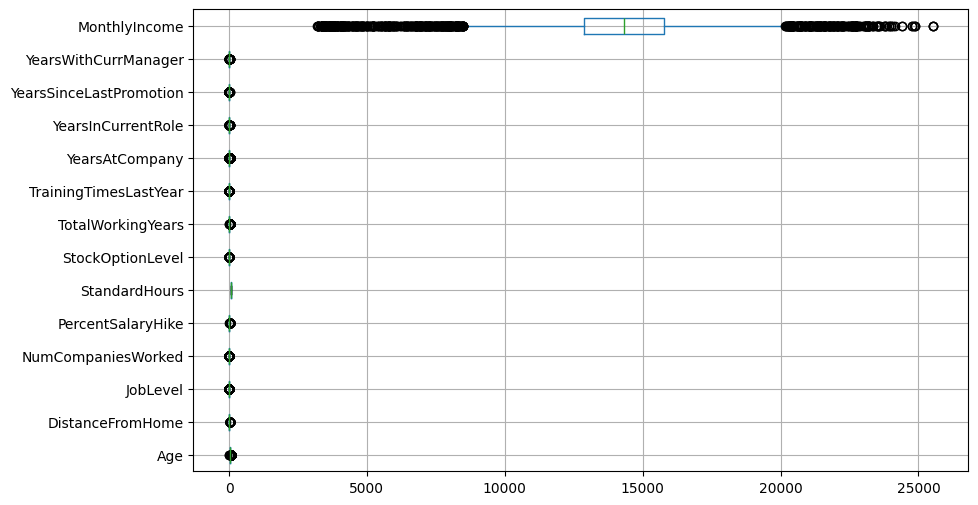

In [40]:
plt.figure(figsize=(10, 6))
boxplot = df_filled_missing_values.boxplot(figsize=(12,10), vert=False)
plt.show()

In [41]:
# Untuk melihat lebih jelas boxplot
# dari attribute selain MonthlyIncome

df_employee_train_without_account_balance = df_filled_missing_values.copy()
df_employee_train_without_account_balance = df_employee_train_without_account_balance.drop(['MonthlyIncome'], axis=1)

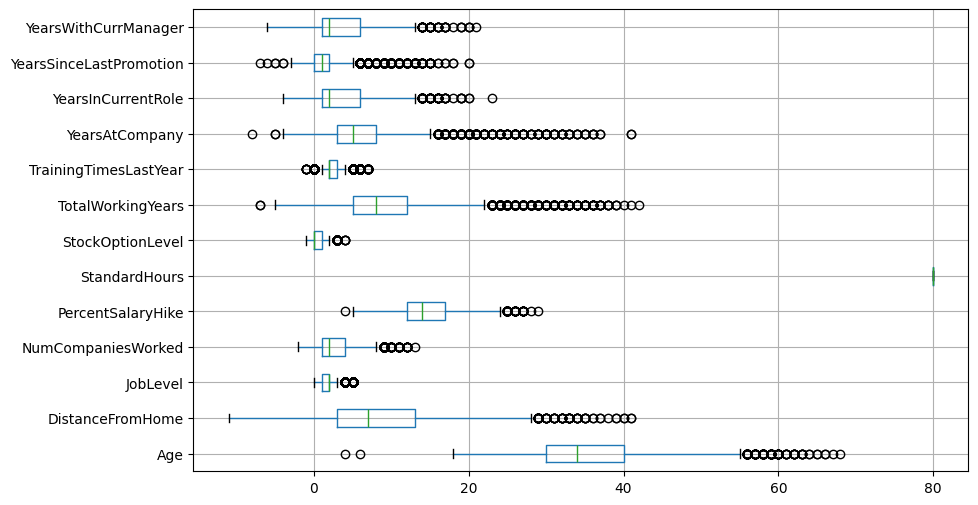

In [42]:
plt.figure(figsize=(10, 6))
boxplot = df_employee_train_without_account_balance.boxplot(figsize=(12,10), vert=False)
plt.show()

### Absolute fitur yang bernilai minus

In [43]:
def handle_negative_values(df, column_name):
    """
    This function converts negative values in the specified column
    of a pandas DataFrame to their absolute values.

    Args:
        df (pandas.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column to process.

    Returns:
        pandas.DataFrame: The modified DataFrame.
    """

    df[column_name] = df[column_name].abs()
    return df

In [44]:
df_filled_missing_values = handle_negative_values(df_filled_missing_values, 'DistanceFromHome')
df_filled_missing_values = handle_negative_values(df_filled_missing_values, 'NumCompaniesWorked')
df_filled_missing_values = handle_negative_values(df_filled_missing_values, 'StockOptionLevel')
df_filled_missing_values = handle_negative_values(df_filled_missing_values, 'TotalWorkingYears')
df_filled_missing_values = handle_negative_values(df_filled_missing_values, 'TrainingTimesLastYear')
df_filled_missing_values = handle_negative_values(df_filled_missing_values, 'YearsAtCompany')
df_filled_missing_values = handle_negative_values(df_filled_missing_values, 'YearsInCurrentRole')
df_filled_missing_values = handle_negative_values(df_filled_missing_values, 'YearsSinceLastPromotion')
df_filled_missing_values = handle_negative_values(df_filled_missing_values, 'YearsWithCurrManager')
df_filled_missing_values.head()

ID  Age     BusinessTravel              Department  DistanceFromHome  \
0  S1   28      Travel_Rarely  Research & Development                 4   
1  S2   25  Travel_Frequently                   Sales                14   
2  S3   36      Travel_Rarely  Research & Development                 3   
3  S4   36  Travel_Frequently  Research & Development                 4   
4  S5   38  Travel_Frequently  Research & Development                12   

       Education EducationField EnvironmentSatisfaction Gender JobInvolvement  \
0       Bachelor          Other               Very High   Male           High   
1  Below College      Marketing                    High   Male           High   
2  Below College      Marketing                  Medium   Male         Medium   
3       Bachelor  Life Sciences               Very High   Male           High   
4       Bachelor  Life Sciences               Very High   Male         Medium   

   ...  StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
0  ...                 0               8.0                     4   
1  ...                 0               6.0                     2   
2  ...                 1              10.0                     3   
3  ...                 3              18.0                     3   
4  ...                 0               8.0                     4   

  WorkLifeBalance  YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0            Good             4.0                  1                      0.0   
1            Good             5.0                  4                      1.0   
2             Bad             9.0                  4                      1.0   
3          Better             4.0                  2                      0.0   
4            Good             5.0                  3                      1.0   

  YearsWithCurrManager MonthlyIncome  Attrition  
0                  2.0      14115.06         No  
1                  4.0      16661.93        Yes  
2                  4.0      13178.42         No  
3                  2.0      13601.03         No  
4                  3.0      15419.15         No  

[5 rows x 30 columns]

Asumsi nilai minus pada data merupakan kesalahan ketik, sedangkan atribut yang nilainya di-absolute oleh fungsi handle_negative_values seharusnya memiliki nilai bukan negatif.

### Menangani Outlier

In [45]:
def count_outlier_iqr(df):
  outlier_counts = {}

  for column in df.select_dtypes(include=np.number):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_counts[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

  return pd.Series(outlier_counts)

In [46]:
# Select only numeric columns
numeric_employee_train = df_filled_missing_values.select_dtypes(include=np.number)

# Calculate skewness for numeric columns
employee_train_skewness = numeric_employee_train.skew()
print("Skewness df_employee_train")
print(employee_train_skewness)

Skewness df_employee_train
Age                        0.494851
DistanceFromHome           0.986945
JobLevel                   1.147338
NumCompaniesWorked         1.246214
PercentSalaryHike          0.908374
StandardHours              0.000000
StockOptionLevel           1.165060
TotalWorkingYears          1.415968
TrainingTimesLastYear      0.679699
YearsAtCompany             2.125891
YearsInCurrentRole         1.068295
YearsSinceLastPromotion    2.389293
YearsWithCurrManager       1.083554
MonthlyIncome             -0.559169
dtype: float64


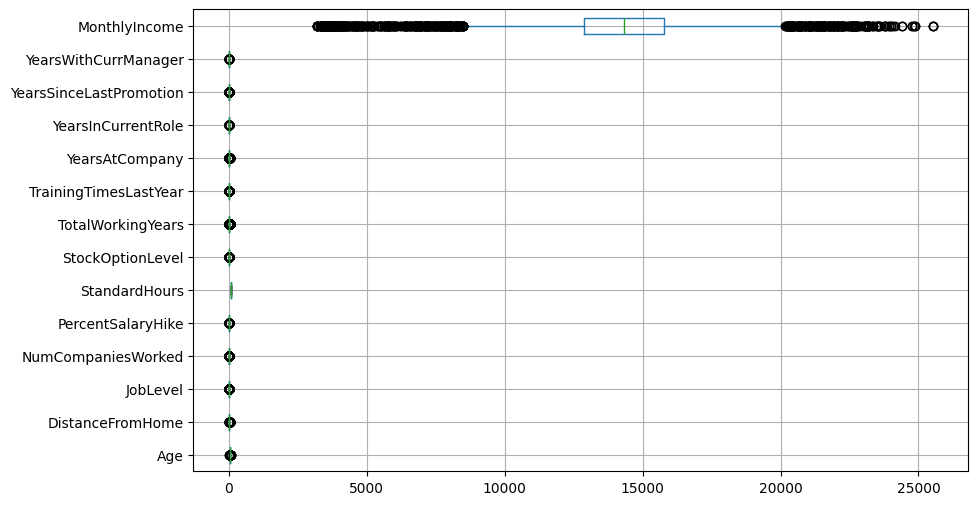

In [47]:
plt.figure(figsize=(10, 6))
boxplot = df_filled_missing_values.boxplot(figsize=(12,10), vert=False)
plt.show()

In [48]:
# Untuk melihat lebih jelas boxplot
# dari attribute selain MonthlyIncome

df_employee_train_without_account_balance = df_filled_missing_values.copy()
df_employee_train_without_account_balance = df_employee_train_without_account_balance.drop(['MonthlyIncome'], axis=1)

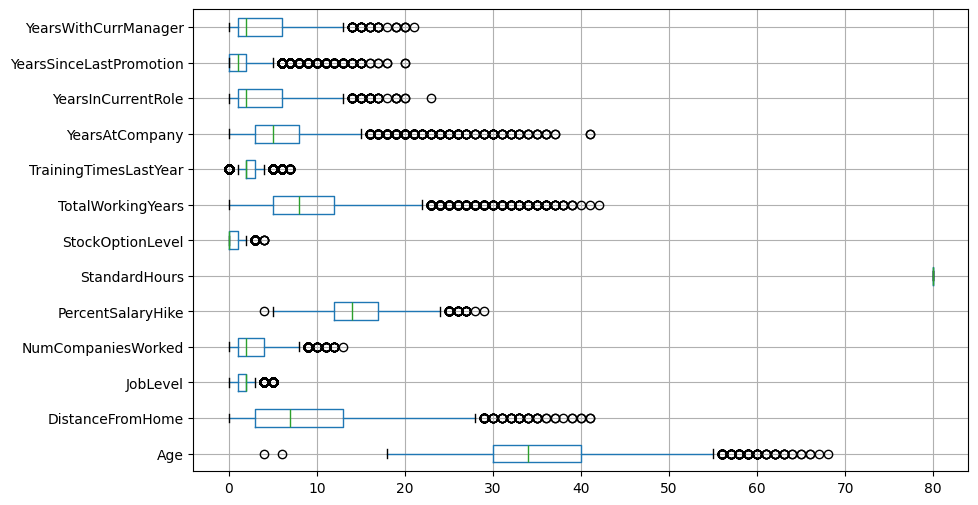

In [49]:
plt.figure(figsize=(10, 6))
boxplot = df_employee_train_without_account_balance.boxplot(figsize=(12,10), vert=False)
plt.show()

In [50]:
outlier_counts = count_outlier_iqr(df_filled_missing_values)
print("Berikut jumlah outliers pada masing-masing attribute.")
print(outlier_counts)

Berikut jumlah outliers pada masing-masing attribute.
Age                        160
DistanceFromHome            82
JobLevel                   586
NumCompaniesWorked         177
PercentSalaryHike           89
StandardHours                0
StockOptionLevel           125
TotalWorkingYears          544
TrainingTimesLastYear      960
YearsAtCompany             444
YearsInCurrentRole          79
YearsSinceLastPromotion    817
YearsWithCurrManager        49
MonthlyIncome              628
dtype: int64


In [51]:
def handle_outliers_iqr(df, capping_method='clip'):
    """
    Handles outliers in numeric columns of a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        capping_method (str): Method to handle outliers.
                              'clip': Replaces outliers with the lower/upper bound (capping).
                              'median': Replaces outliers with the median of the non-outlier data.
                              'mean': Replaces outliers with the mean of the non-outlier data.
                                      (Note: 'mean' is generally less robust for skewed data)

    Returns:
        pd.DataFrame: The DataFrame with outliers handled.
    """
    df_outliers_handled = df.copy()
    numeric_cols = df.select_dtypes(include=np.number).columns

    for column in numeric_cols:
        Q1 = df_outliers_handled[column].quantile(0.25)
        Q3 = df_outliers_handled[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_lower = df_outliers_handled[column] < lower_bound
        outliers_upper = df_outliers_handled[column] > upper_bound

        if capping_method == 'clip':
            df_outliers_handled.loc[outliers_lower, column] = lower_bound
            df_outliers_handled.loc[outliers_upper, column] = upper_bound
        elif capping_method == 'median':
            # Calculate median of non-outlier data
            non_outlier_data = df_outliers_handled.loc[~(outliers_lower | outliers_upper), column]
            replacement_value = non_outlier_data.median()
            df_outliers_handled.loc[outliers_lower | outliers_upper, column] = replacement_value
        elif capping_method == 'mean':
            # Calculate mean of non-outlier data
            non_outlier_data = df_outliers_handled.loc[~(outliers_lower | outliers_upper), column]
            replacement_value = non_outlier_data.mean()
            df_outliers_handled.loc[outliers_lower | outliers_upper, column] = replacement_value
        else:
            raise ValueError("Invalid capping_method. Choose 'clip', 'median', or 'mean'.")
    return df_outliers_handled

In [52]:
# Apply outlier handling (using 'clip' as it's generally a good default)
df_no_outliers = handle_outliers_iqr(df_filled_missing_values.copy(), capping_method='clip')

<ipython-input-51-76c3a38da1c6>:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_outliers_handled.loc[outliers_lower, column] = lower_bound
<ipython-input-51-76c3a38da1c6>:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_outliers_handled.loc[outliers_lower, column] = lower_bound
<ipython-input-51-76c3a38da1c6>:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_outliers_handled.loc[outliers_lower, column] = lower_bound
<ipython-input-51-76c3a38da1c6>:31

Melakukan penanganan outlier menggunakan metode clip yang akan menggantikan nilai outlier dengan nilai lower/upper bound.

In [53]:
# Re-check outlier counts after handling
outlier_counts_after = count_outlier_iqr(df_no_outliers)
print("\nBerikut jumlah outliers setelah penanganan:")
print(outlier_counts_after)


Berikut jumlah outliers setelah penanganan:
Age                        0
DistanceFromHome           0
JobLevel                   0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
MonthlyIncome              0
dtype: int64


## Encoding fitur kategorikal

In [54]:
for col in df_employee_train.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_employee_train[col].value_counts(), '\n')

No. of unique values in column ID:
ID
S9078    1
S1       1
S2       1
S3       1
S4       1
        ..
S11      1
S10      1
S9       1
S8       1
S7       1
Name: count, Length: 9078, dtype: int64 

No. of unique values in column BusinessTravel:
BusinessTravel
Travel_Rarely        4982
Travel_Frequently    2942
Non-Travel           1154
Name: count, dtype: int64 

No. of unique values in column Department:
Department
Research & Development    5542
Sales                     1351
Human Resources            676
Name: count, dtype: int64 

No. of unique values in column Education:
Education
Bachelor         3232
College          2013
Master           1066
Below College    1033
Doctor             66
Name: count, dtype: int64 

No. of unique values in column EducationField:
EducationField
Life Sciences       3128
Medical             1839
Marketing           1719
Other                575
Human Resources      408
Technical Degree     308
Name: count, dtype: int64 

No. of unique values in co

### Membuat data frame encoded

Untuk data tanpa handle outliers disimpan sebagai df_with_outliers_encoded

In [55]:
df_with_outliers_encoded = df_filled_missing_values.copy()

Untuk data dengan handle outliers disimpan sebagai df_outliers_clean_encoded

In [56]:
df_outliers_clean_encoded = df_no_outliers.copy()

Data yang dihandle dengan outlier dan tanpa mendapat penanganan outlier dibedakan untuk melihat performa pada model klasifikasi dan regresi.

### One-Hot Encoding

Melakukan one hot encoding pada atribut dengan data nominal.

In [57]:
# One-Hot Encoding
# List of categorical nominal columns to encode
nominal_columns = [
    "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"
]

In [58]:
# Apply One-Hot Encoding
df_with_outliers_encoded = pd.get_dummies(df_filled_missing_values, columns=nominal_columns, drop_first=True)

# Display the transformed dataset
df_with_outliers_encoded.head()

ID  Age     BusinessTravel  DistanceFromHome      Education  \
0  S1   28      Travel_Rarely                 4       Bachelor   
1  S2   25  Travel_Frequently                14  Below College   
2  S3   36      Travel_Rarely                 3  Below College   
3  S4   36  Travel_Frequently                 4       Bachelor   
4  S5   38  Travel_Frequently                12       Bachelor   

  EnvironmentSatisfaction JobInvolvement  JobLevel JobSatisfaction  \
0               Very High           High         1             Low   
1                    High           High         2            High   
2                  Medium         Medium         2          Medium   
3               Very High           High         2          Medium   
4               Very High         Medium         2            High   

   NumCompaniesWorked  ... JobRole_Human Resources  \
0                   4  ...                   False   
1                   0  ...                   False   
2                   0  ...                   False   
3                   7  ...                   False   
4                   4  ...                   False   

   JobRole_Laboratory Technician JobRole_Manager  \
0                          False           False   
1                          False           False   
2                          False           False   
3                          False           False   
4                          False           False   

  JobRole_Manufacturing Director  JobRole_Research Director  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                           True                      False   
4                          False                       True   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                        True                    False   
1                       False                     True   
2                        True                    False   
3                       False                    False   
4                       False                    False   

   JobRole_Sales Representative MaritalStatus_Married  MaritalStatus_Single  
0                         False                 False                  True  
1                         False                  True                 False  
2                         False                  True                 False  
3                         False                 False                 False  
4                         False                  True                 False  

[5 rows x 43 columns]

In [59]:
# Apply One-Hot Encoding
df_outliers_clean_encoded = pd.get_dummies(df_no_outliers, columns=nominal_columns, drop_first=True)

# Display the transformed dataset
df_outliers_clean_encoded.head()

ID  Age     BusinessTravel  DistanceFromHome      Education  \
0  S1   28      Travel_Rarely                 4       Bachelor   
1  S2   25  Travel_Frequently                14  Below College   
2  S3   36      Travel_Rarely                 3  Below College   
3  S4   36  Travel_Frequently                 4       Bachelor   
4  S5   38  Travel_Frequently                12       Bachelor   

  EnvironmentSatisfaction JobInvolvement  JobLevel JobSatisfaction  \
0               Very High           High       1.0             Low   
1                    High           High       2.0            High   
2                  Medium         Medium       2.0          Medium   
3               Very High           High       2.0          Medium   
4               Very High         Medium       2.0            High   

   NumCompaniesWorked  ... JobRole_Human Resources  \
0                 4.0  ...                   False   
1                 0.0  ...                   False   
2                 0.0  ...                   False   
3                 7.0  ...                   False   
4                 4.0  ...                   False   

   JobRole_Laboratory Technician JobRole_Manager  \
0                          False           False   
1                          False           False   
2                          False           False   
3                          False           False   
4                          False           False   

  JobRole_Manufacturing Director  JobRole_Research Director  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                           True                      False   
4                          False                       True   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                        True                    False   
1                       False                     True   
2                        True                    False   
3                       False                    False   
4                       False                    False   

   JobRole_Sales Representative MaritalStatus_Married  MaritalStatus_Single  
0                         False                 False                  True  
1                         False                  True                 False  
2                         False                  True                 False  
3                         False                 False                 False  
4                         False                  True                 False  

[5 rows x 43 columns]

### Label Encoding

Melakukan label hot encoding pada atribut dengan data ordinal.

In [60]:
# Label Encoding
# Mapping untuk kolom BusinessTravel
BusinessTravel_mapping = {
	'Non-Travel': 1,
	'Travel_Rarely': 2,
	'Travel_Frequently': 3
}

# Mapping untuk kolom Education
Education_mapping = {
	'Below College': 1,
	'College': 2,
	'Bachelor': 3,
  'Master': 4,
  'Doctor': 5
}

# Mapping untuk kolom EnvironmentSatisfaction
EnvironmentSatisfaction_mapping = {
	'Low': 1,
	'Medium': 2,
	'High': 3,
	'Very High': 4
}

# Mapping untuk kolom JobInvolvement
JobInvolvement_mapping = {
	'Low': 1,
	'Medium': 2,
	'High': 3,
	'Very High': 4
}

# Mapping untuk kolom JobSatisfaction
JobSatisfaction_mapping = {
	'Low': 1,
	'Medium': 2,
	'High': 3,
	'Very High': 4
}

# Mapping untuk kolom OverTime
OverTime_mapping = {
  'No': 0,
	'Yes': 1
}

# Mapping untuk kolom PerformanceRating
PerformanceRating_mapping = {
	'Good': 1,
	'Excellent': 2,
	'Outstanding': 3
}

# Mapping untuk kolom RelationshipSatisfaction
RelationshipSatisfaction_mapping = {
	'Low': 1,
	'Medium': 2,
	'High': 3,
	'Very High': 4
}

# Mapping untuk kolom WorkLifeBalance
WorkLifeBalance_mapping = {
	'Bad': 1,
	'Good': 2,
	'Better': 3,
	'Best': 4
}

# Mapping untuk kolom Attrition
Attrition_mapping = {
  'No': 0,
	'Yes': 1
}

In [61]:
df_with_outliers_encoded['BusinessTravel'] = df_filled_missing_values['BusinessTravel'].map(BusinessTravel_mapping)
df_with_outliers_encoded['Education'] = df_filled_missing_values['Education'].map(Education_mapping)
df_with_outliers_encoded['EnvironmentSatisfaction'] = df_filled_missing_values['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_mapping)
df_with_outliers_encoded['JobInvolvement'] = df_filled_missing_values['JobInvolvement'].map(JobInvolvement_mapping)
df_with_outliers_encoded['JobSatisfaction'] = df_filled_missing_values['JobSatisfaction'].map(JobSatisfaction_mapping)
df_with_outliers_encoded['OverTime'] = df_filled_missing_values['OverTime'].map(OverTime_mapping)
df_with_outliers_encoded['PerformanceRating'] = df_filled_missing_values['PerformanceRating'].map(PerformanceRating_mapping)
df_with_outliers_encoded['RelationshipSatisfaction'] = df_filled_missing_values['RelationshipSatisfaction'].map(RelationshipSatisfaction_mapping)
df_with_outliers_encoded['WorkLifeBalance'] = df_filled_missing_values['WorkLifeBalance'].map(WorkLifeBalance_mapping)
df_with_outliers_encoded['Attrition'] = df_filled_missing_values['Attrition'].map(Attrition_mapping)
df_with_outliers_encoded.head()

ID  Age  BusinessTravel  DistanceFromHome  Education  \
0  S1   28               2                 4          3   
1  S2   25               3                14          1   
2  S3   36               2                 3          1   
3  S4   36               3                 4          3   
4  S5   38               3                12          3   

   EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                        4               3         1                1   
1                        3               3         2                3   
2                        2               2         2                2   
3                        4               3         2                2   
4                        4               2         2                3   

   NumCompaniesWorked  ...  JobRole_Human Resources  \
0                   4  ...                    False   
1                   0  ...                    False   
2                   0  ...                    False   
3                   7  ...                    False   
4                   4  ...                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                          False            False   
3                          False            False   
4                          False            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                            True                      False   
4                           False                       True   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                        True                    False   
1                       False                     True   
2                        True                    False   
3                       False                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                         False                  False                  True  
1                         False                   True                 False  
2                         False                   True                 False  
3                         False                  False                 False  
4                         False                   True                 False  

[5 rows x 43 columns]

In [62]:
df_outliers_clean_encoded['BusinessTravel'] = df_no_outliers['BusinessTravel'].map(BusinessTravel_mapping)
df_outliers_clean_encoded['Education'] = df_no_outliers['Education'].map(Education_mapping)
df_outliers_clean_encoded['EnvironmentSatisfaction'] = df_no_outliers['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_mapping)
df_outliers_clean_encoded['JobInvolvement'] = df_no_outliers['JobInvolvement'].map(JobInvolvement_mapping)
df_outliers_clean_encoded['JobSatisfaction'] = df_no_outliers['JobSatisfaction'].map(JobSatisfaction_mapping)
df_outliers_clean_encoded['OverTime'] = df_no_outliers['OverTime'].map(OverTime_mapping)
df_outliers_clean_encoded['PerformanceRating'] = df_no_outliers['PerformanceRating'].map(PerformanceRating_mapping)
df_outliers_clean_encoded['RelationshipSatisfaction'] = df_no_outliers['RelationshipSatisfaction'].map(RelationshipSatisfaction_mapping)
df_outliers_clean_encoded['WorkLifeBalance'] = df_no_outliers['WorkLifeBalance'].map(WorkLifeBalance_mapping)
df_outliers_clean_encoded['Attrition'] = df_no_outliers['Attrition'].map(Attrition_mapping)
df_outliers_clean_encoded.head()

ID  Age  BusinessTravel  DistanceFromHome  Education  \
0  S1   28               2                 4          3   
1  S2   25               3                14          1   
2  S3   36               2                 3          1   
3  S4   36               3                 4          3   
4  S5   38               3                12          3   

   EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                        4               3       1.0                1   
1                        3               3       2.0                3   
2                        2               2       2.0                2   
3                        4               3       2.0                2   
4                        4               2       2.0                3   

   NumCompaniesWorked  ...  JobRole_Human Resources  \
0                 4.0  ...                    False   
1                 0.0  ...                    False   
2                 0.0  ...                    False   
3                 7.0  ...                    False   
4                 4.0  ...                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                          False            False   
3                          False            False   
4                          False            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                            True                      False   
4                           False                       True   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                        True                    False   
1                       False                     True   
2                        True                    False   
3                       False                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                         False                  False                  True  
1                         False                   True                 False  
2                         False                   True                 False  
3                         False                  False                 False  
4                         False                   True                 False  

[5 rows x 43 columns]

## Nilai Duplikat

Melakukan drop data yang duplikat setelah menghapus atribut ID.

In [63]:
df_with_outliers_encoded = df_with_outliers_encoded.drop(columns=['ID'])
df_outliers_clean_encoded = df_outliers_clean_encoded.drop(columns=['ID'])

In [64]:
df_with_outliers_encoded.duplicated().sum()

np.int64(1405)

In [65]:
df_with_outliers_encoded = df_with_outliers_encoded.drop_duplicates()
df_with_outliers_encoded.duplicated().sum()

np.int64(0)

In [66]:
df_outliers_clean_encoded.duplicated().sum()

np.int64(1405)

In [67]:
df_outliers_clean_encoded = df_with_outliers_encoded.drop_duplicates()
df_outliers_clean_encoded.duplicated().sum()

np.int64(0)

# Modeling

Model terdiri dari:
- Klasifikasi dengan outlier yang telah ditangani.
- Klasifikasi dengan data tanpa penanganan outlier
- Regresi dengan outlier yang telah ditangani.
- Regresi dengan data tanpa penanganan outlier

Untuk variabel yang menangani data yang telah dibersihkan dari outlier diberikan penamaan wo_outlier (without outlier).

Untuk variabel yang outliernya tidak ditangani diberikan penamaan w_outlier (with outlier).

In [68]:
y_train_reg_w_outlier = df_with_outliers_encoded['MonthlyIncome']
X_train_reg_w_outlier = df_with_outliers_encoded.drop(['MonthlyIncome'], axis=1)

y_train_reg_wo_outlier = df_outliers_clean_encoded['MonthlyIncome']
X_train_reg_wo_outlier = df_outliers_clean_encoded.drop(['MonthlyIncome'], axis=1)

y_train_clf_w_outlier = df_with_outliers_encoded['Attrition']
X_train_clf_w_outlier = df_with_outliers_encoded.drop(['Attrition'], axis=1)

y_train_clf_wo_outlier = df_outliers_clean_encoded['Attrition']
X_train_clf_wo_outlier = df_outliers_clean_encoded.drop(['Attrition'], axis=1)

In [69]:
# Standardize the features for KNN
scaler_regress_w_outlier = StandardScaler()
X_train_reg_scaled_w_outlier = scaler_regress_w_outlier.fit_transform(X_train_reg_w_outlier)

scaler_regress_wo_outlier = StandardScaler()
X_train_reg_scaled_wo_outlier = scaler_regress_wo_outlier.fit_transform(X_train_reg_wo_outlier)

scaler_classif_w_outlier = StandardScaler()
X_train_clf_scaled_w_outlier = scaler_classif_w_outlier.fit_transform(X_train_clf_w_outlier)

scaler_classif_wo_outlier = StandardScaler()
X_train_clf_scaled_wo_outlier = scaler_classif_wo_outlier.fit_transform(X_train_clf_wo_outlier)

## Classification

### Imbalanced Classification

Penanganan imbalanced classification menggunakan SMOTE.

#### SMOTE untuk data tanpa penanganan terhadap outliers

In [70]:
y_train_clf_w_outlier.value_counts()

Attrition
0    6171
1    1502
Name: count, dtype: int64

In [71]:
from imblearn.over_sampling import SMOTE

smote_w_outlier = SMOTE()

In [72]:
X_smote_w_outlier, y_smote_w_outlier = smote_w_outlier.fit_resample(X_train_clf_scaled_w_outlier, y_train_clf_w_outlier)

#### SMOTE untuk untuk data yang telah bersih dari outliers

In [73]:
y_train_clf_wo_outlier.value_counts()

Attrition
0    6171
1    1502
Name: count, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE

smote_wo_outlier = SMOTE()

In [75]:
X_smote_wo_outlier, y_smote_wo_outlier = smote_wo_outlier.fit_resample(X_train_clf_wo_outlier, y_train_clf_wo_outlier)

### KNN Classification

#### Hyperparameter tuning

StratifiedKFold digunakan untuk memudahkan penanganan imbalanced classification.

In [76]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

kfold_w_outlier = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_wo_outlier = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

# Optimalisasi KNN dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

model_knn_class_w_outlier = KNeighborsClassifier()
model_knn_class_wo_outlier = KNeighborsClassifier()

Melakukan hyperparameter tuning dengan rentang neighbors 1 sampai 20 dan metric euclidean, manhattan, dan jaccard.

In [78]:
# Parameter yang akan di-tuning
tunned_params = {
	'n_neighbors': list(range(1, 21)),
	'metric': ['euclidean', 'manhattan', 'jaccard']
}

GridSearchCV melakukan hyperparameter tuning dengan scoring f1

In [79]:
print("Tuning hyperparameters model KNN classification untuk data tanpa penanganan outlier\n")

grid_search_clfKNN_w_outlier = GridSearchCV(
	model_knn_class_w_outlier,
	tunned_params,
	scoring="f1",
	cv=kfold_w_outlier,
	verbose=2
)

# Melatih model dengan data training
grid_search_clfKNN_w_outlier.fit(X_smote_w_outlier, y_smote_w_outlier)

Tuning hyperparameters model KNN classification untuk data tanpa penanganan outlier

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.5s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.5s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.5s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclide

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=1; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=1; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=1; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=1; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=1; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=2; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=2; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=2; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=2; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=2; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=3; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=3; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=3; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=3; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=3; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=4; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=4; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=4; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=4; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=4; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=5; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=5; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=5; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=5; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=5; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=6; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=6; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=6; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=6; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=6; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=7; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=7; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=7; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=7; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=7; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=8; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=8; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=8; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=8; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=9; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=9; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=9; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=9; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=9; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=10; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=10; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=10; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=10; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=10; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=11; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=11; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=11; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=11; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=11; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=12; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=12; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=12; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=12; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=12; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=13; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=13; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=13; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=13; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=13; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=14; total time=   6.3s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=14; total time=   6.5s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=14; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=14; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=14; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=15; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=15; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=15; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=15; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=15; total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=16; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=16; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=16; total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=16; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=16; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=17; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=17; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=17; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=17; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=17; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=18; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=18; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=18; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=18; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=18; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=19; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=19; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=19; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=19; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=19; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=20; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=20; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=20; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=20; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=20; total time=   3.6s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'jaccard'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='f1', verbose=2)

In [80]:
print("Tuning hyperparameters model KNN classification untuk data dengan penanganan outlier\n")

grid_search_clfKNN_wo_outlier = GridSearchCV(
	model_knn_class_wo_outlier,
	tunned_params,
	scoring="f1",
	cv=kfold_wo_outlier,
	verbose=2
)

# Melatih model dengan data training
grid_search_clfKNN_wo_outlier.fit(X_smote_wo_outlier, y_smote_wo_outlier)

Tuning hyperparameters model KNN classification untuk data dengan penanganan outlier

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclid

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=1; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=1; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=1; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=1; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=1; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=2; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=2; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=2; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=2; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=2; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=3; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=3; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=3; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=3; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=3; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=4; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=4; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=4; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=4; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=4; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=5; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=5; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=5; total time=   6.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=5; total time=   5.1s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=5; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=6; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=6; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=6; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=6; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=6; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=7; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=7; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=7; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=7; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=7; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=8; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=8; total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=8; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=8; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=8; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=9; total time=   8.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=9; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=9; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=9; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END ......................metric=jaccard, n_neighbors=9; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=10; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=10; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=10; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=10; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=10; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=11; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=11; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=11; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=11; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=11; total time=   4.0s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=12; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=12; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=12; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=12; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=12; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=13; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=13; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=13; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=13; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=13; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=14; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=14; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=14; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=14; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=14; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=15; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=15; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=15; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=15; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=15; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=16; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=16; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=16; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=16; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=16; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=17; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=17; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=17; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=17; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=17; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=18; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=18; total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=18; total time=   7.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=18; total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=18; total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=19; total time=   7.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=19; total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=19; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=19; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=19; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=20; total time=   5.3s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=20; total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=20; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=20; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV] END .....................metric=jaccard, n_neighbors=20; total time=   3.9s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'jaccard'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='f1', verbose=2)

##### Parameter classification terbaik dan evaluasi untuk data tanpa penanganan terhadap outliers

In [81]:
# Menampilkan parameter terbaik
print("Best parameters for data with outliers set found on development set:")
print(grid_search_clfKNN_w_outlier.best_params_)

Best parameters for data with outliers set found on development set:
{'metric': 'manhattan', 'n_neighbors': 1}


Parameter terbaik untuk klasifikasi dengan data tanpa penanganan terhadap outliers:
- Metric:  Manhattan
- Jumlah neighbors: 1

In [82]:
# Extract best parameters from the tuned model
best_params_knn_clf_w_outlier = grid_search_clfKNN_w_outlier.best_params_
best_n_neighbors_knn_clf_w_outlier = best_params_knn_clf_w_outlier['n_neighbors']
best_metric_knn_clf_w_outlier = best_params_knn_clf_w_outlier['metric']

In [83]:
# Evaluate the best model
best_knn_classifier_w_outlier = grid_search_clfKNN_w_outlier.best_estimator_
y_pred_w_outlier = best_knn_classifier_w_outlier.predict(X_smote_w_outlier)

In [84]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

# Evaluate performance
print("Classification Report for data with outliers:")
print(classification_report(y_smote_w_outlier, y_pred_w_outlier))

Classification Report for data with outliers:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6171
           1       1.00      1.00      1.00      6171

    accuracy                           1.00     12342
   macro avg       1.00      1.00      1.00     12342
weighted avg       1.00      1.00      1.00     12342



##### Parameter classification terbaik dan evaluasi untuk untuk data yang telah bersih dari outliers

In [85]:
# Menampilkan parameter terbaik
print("Best parameters for data without outliers set found on development set:")
print(grid_search_clfKNN_wo_outlier.best_params_)

Best parameters for data without outliers set found on development set:
{'metric': 'manhattan', 'n_neighbors': 2}


Parameter terbaik untuk klasifikasi dengan data yeng telah bersih dari outliers:
- Metric:  Manhattan
- Jumlah neighbors: 2

In [86]:
# Extract best parameters from the tuned model
best_params_knn_clf_wo_outlier = grid_search_clfKNN_wo_outlier.best_params_
best_n_neighbors_knn_clf_wo_outlier = best_params_knn_clf_wo_outlier['n_neighbors']
best_metric_knn_clf_wo_outlier = best_params_knn_clf_wo_outlier['metric']

In [87]:
# Evaluate the best model
best_knn_classifier_wo_outlier = grid_search_clfKNN_wo_outlier.best_estimator_
y_pred_wo_outlier = best_knn_classifier_wo_outlier.predict(X_smote_wo_outlier)

In [88]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

# Evaluate performance
print("Classification Report for data without outliers:")
print(classification_report(y_smote_wo_outlier, y_pred_wo_outlier))

Classification Report for data without outliers:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6171
           1       1.00      0.98      0.99      6171

    accuracy                           0.99     12342
   macro avg       0.99      0.99      0.99     12342
weighted avg       0.99      0.99      0.99     12342



#### Cross-validation untuk data tanpa penanganan terhadap outliers

In [89]:
from sklearn.model_selection import cross_val_score

cv_scores_clf_w_outlier = cross_val_score(best_knn_classifier_w_outlier, X_smote_w_outlier, y_smote_w_outlier, cv=kfold_w_outlier, scoring='f1')

In [90]:
# Menampilkan hasil cross-validation berdasarkan nilai f1
print("Cross-Validation berdasarkan nilai f1")
print("Cross-Validation Scores:", cv_scores_clf_w_outlier)
print("Mean Accuracy based on cross-validation:", cv_scores_clf_w_outlier.mean())
print("Standard Deviation based on cross-validation:", cv_scores_clf_w_outlier.std())

Cross-Validation berdasarkan nilai f1
Cross-Validation Scores: [0.87068639 0.86097652 0.86774073 0.8652536  0.85799257]
Mean Accuracy based on cross-validation: 0.864529958509501
Standard Deviation based on cross-validation: 0.004562866008871703


Hasil Cross-Validation berdasarkan nilai f1 untuk data tanpa penanganan terhadap outliers:
- Cross-Validation Scores: [0.87068639 0.86097652 0.86774073 0.8652536  0.85799257]
- Mean Accuracy based on cross-validation: 0.864529958509501
- Standard Deviation based on cross-validation: 0.004562866008871703

#### Cross-validation untuk untuk data yang telah bersih dari outliers

In [91]:
from sklearn.model_selection import cross_val_score

cv_scores_clf_wo_outlier = cross_val_score(best_knn_classifier_wo_outlier, X_smote_wo_outlier, y_smote_wo_outlier, cv=kfold_wo_outlier, scoring='f1')

In [92]:
# Menampilkan hasil cross-validation berdasarkan nilai f1
print("Cross-Validation berdasarkan nilai f1")
print("Cross-Validation Scores:", cv_scores_clf_wo_outlier)
print("Mean Accuracy based on cross-validation:", cv_scores_clf_wo_outlier.mean())
print("Standard Deviation based on cross-validation:", cv_scores_clf_wo_outlier.std())

Cross-Validation berdasarkan nilai f1
Cross-Validation Scores: [0.85127808 0.85747664 0.85901387 0.86623721 0.84862385]
Mean Accuracy based on cross-validation: 0.8565259292573579
Standard Deviation based on cross-validation: 0.006186847524356094


Hasil Cross-Validation berdasarkan nilai f1 untuk data yang telah bersih dari outliers:
- Cross-Validation Scores: [0.85127808 0.85747664 0.85901387 0.86623721 0.84862385]
- Mean Accuracy based on cross-validation: 0.8565259292573579
- Standard Deviation based on cross-validation: 0.006186847524356094

#### Kaggle Submission

In [93]:
df_test_classification = pd.read_csv('employee_test_classif.csv')
df_test_classification.head()

ID  Age     BusinessTravel              Department  DistanceFromHome  \
0  S9079   49      Travel_Rarely                   Sales                 2   
1  S9080   28      Travel_Rarely  Research & Development                 5   
2  S9081   19      Travel_Rarely                     NaN                 9   
3  S9082   31      Travel_Rarely  Research & Development                17   
4  S9083   25  Travel_Frequently  Research & Development                 5   

       Education EducationField EnvironmentSatisfaction  Gender  \
0  Below College            NaN                     NaN  Female   
1       Bachelor          Other                     NaN    Male   
2        College        Medical                     NaN    Male   
3  Below College  Life Sciences                  Medium  Female   
4  Below College            NaN                  Medium    Male   

  JobInvolvement  ...  StandardHours StockOptionLevel TotalWorkingYears  \
0         Medium  ...             80                0               NaN   
1           High  ...             80                0               2.0   
2         Medium  ...             80                0               1.0   
3            Low  ...             80                1              12.0   
4           High  ...             80                0               6.0   

  TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                     3             Good            8.0                   7   
1                     2             Good            2.0                   2   
2                     2           Better            1.0                   0   
3                     1             Good           12.0                   9   
4                     2             Best            5.0                   4   

  YearsSinceLastPromotion YearsWithCurrManager  MonthlyIncome  
0                     7.0                  3.0       16761.61  
1                     1.0                  2.0       17143.41  
2                     0.0                  0.0       15259.65  
3                     2.0                  8.0       15835.74  
4                     1.0                  3.0       13768.49  

[5 rows x 29 columns]

In [94]:
df_test_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1285 non-null   object 
 1   Age                       1285 non-null   int64  
 2   BusinessTravel            1285 non-null   object 
 3   Department                1057 non-null   object 
 4   DistanceFromHome          1285 non-null   int64  
 5   Education                 1060 non-null   object 
 6   EducationField            1121 non-null   object 
 7   EnvironmentSatisfaction   1065 non-null   object 
 8   Gender                    1214 non-null   object 
 9   JobInvolvement            1279 non-null   object 
 10  JobLevel                  1285 non-null   int64  
 11  JobRole                   1285 non-null   object 
 12  JobSatisfaction           1266 non-null   object 
 13  MaritalStatus             1285 non-null   object 
 14  NumCompa

In [95]:
df_test_classification.isna().sum()

ID                            0
Age                           0
BusinessTravel                0
Department                  228
DistanceFromHome              0
Education                   225
EducationField              164
EnvironmentSatisfaction     220
Gender                       71
JobInvolvement                6
JobLevel                      0
JobRole                       0
JobSatisfaction              19
MaritalStatus                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike            78
PerformanceRating             0
RelationshipSatisfaction    166
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears           149
TrainingTimesLastYear         0
WorkLifeBalance             177
YearsAtCompany              158
YearsInCurrentRole            0
YearsSinceLastPromotion      78
YearsWithCurrManager         72
MonthlyIncome                 0
dtype: int64

In [96]:
def fill_null_test(df, column_name, distribution_type):
    if df[column_name].dtype == 'object':
        replacement_value = df[column_name].mode()[0]
    else:
        replacement_value = 0

    df[column_name] = df[column_name].fillna(replacement_value)
    return df

In [97]:
df_filled_missing_values_test_clf = df_test_classification.copy()
fill_null_test(df_filled_missing_values_test_clf, 'Department', '')
fill_null_test(df_filled_missing_values_test_clf, 'Education', '')
fill_null_test(df_filled_missing_values_test_clf, 'EducationField', '')
fill_null_test(df_filled_missing_values_test_clf, 'EnvironmentSatisfaction', '')
fill_null_test(df_filled_missing_values_test_clf, 'Gender', '')
fill_null_test(df_filled_missing_values_test_clf, 'JobInvolvement', '')
fill_null_test(df_filled_missing_values_test_clf, 'JobSatisfaction', '')
fill_null_test(df_filled_missing_values_test_clf, 'PercentSalaryHike', 'skewed')
fill_null_test(df_filled_missing_values_test_clf, 'RelationshipSatisfaction', '')
fill_null_test(df_filled_missing_values_test_clf, 'TotalWorkingYears', 'skewed')
fill_null_test(df_filled_missing_values_test_clf, 'WorkLifeBalance', '')
fill_null_test(df_filled_missing_values_test_clf, 'YearsAtCompany', 'skewed')
fill_null_test(df_filled_missing_values_test_clf, 'YearsSinceLastPromotion', 'skewed')
fill_null_test(df_filled_missing_values_test_clf, 'YearsWithCurrManager', 'skewed')
df_filled_missing_values_test_clf.head()

ID  Age     BusinessTravel              Department  DistanceFromHome  \
0  S9079   49      Travel_Rarely                   Sales                 2   
1  S9080   28      Travel_Rarely  Research & Development                 5   
2  S9081   19      Travel_Rarely  Research & Development                 9   
3  S9082   31      Travel_Rarely  Research & Development                17   
4  S9083   25  Travel_Frequently  Research & Development                 5   

       Education EducationField EnvironmentSatisfaction  Gender  \
0  Below College  Life Sciences                    High  Female   
1       Bachelor          Other                    High    Male   
2        College        Medical                    High    Male   
3  Below College  Life Sciences                  Medium  Female   
4  Below College  Life Sciences                  Medium    Male   

  JobInvolvement  ...  StandardHours StockOptionLevel TotalWorkingYears  \
0         Medium  ...             80                0               0.0   
1           High  ...             80                0               2.0   
2         Medium  ...             80                0               1.0   
3            Low  ...             80                1              12.0   
4           High  ...             80                0               6.0   

  TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                     3             Good            8.0                   7   
1                     2             Good            2.0                   2   
2                     2           Better            1.0                   0   
3                     1             Good           12.0                   9   
4                     2             Best            5.0                   4   

  YearsSinceLastPromotion YearsWithCurrManager  MonthlyIncome  
0                     7.0                  3.0       16761.61  
1                     1.0                  2.0       17143.41  
2                     0.0                  0.0       15259.65  
3                     2.0                  8.0       15835.74  
4                     1.0                  3.0       13768.49  

[5 rows x 29 columns]

In [98]:
# One-Hot Encoding
# List of categorical nominal columns to encode
nominal_columns = [
    "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"
]

# Apply One-Hot Encoding
df_filled_missing_values_test_clf = pd.get_dummies(df_filled_missing_values_test_clf, columns=nominal_columns, drop_first=True)

# Display the transformed dataset
df_filled_missing_values_test_clf.head()

ID  Age     BusinessTravel  DistanceFromHome      Education  \
0  S9079   49      Travel_Rarely                 2  Below College   
1  S9080   28      Travel_Rarely                 5       Bachelor   
2  S9081   19      Travel_Rarely                 9        College   
3  S9082   31      Travel_Rarely                17  Below College   
4  S9083   25  Travel_Frequently                 5  Below College   

  EnvironmentSatisfaction JobInvolvement  JobLevel JobSatisfaction  \
0                    High         Medium         2            High   
1                    High           High         1          Medium   
2                    High         Medium         1             Low   
3                  Medium            Low         2          Medium   
4                  Medium           High         2            High   

   NumCompaniesWorked  ... JobRole_Human Resources  \
0                   4  ...                   False   
1                   1  ...                   False   
2                   1  ...                   False   
3                   1  ...                   False   
4                   0  ...                   False   

   JobRole_Laboratory Technician JobRole_Manager  \
0                          False           False   
1                           True           False   
2                          False           False   
3                          False           False   
4                          False           False   

  JobRole_Manufacturing Director  JobRole_Research Director  \
0                          False                      False   
1                          False                      False   
2                          False                       True   
3                          False                       True   
4                           True                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                       False                    False   
2                       False                    False   
3                       False                    False   
4                       False                    False   

   JobRole_Sales Representative MaritalStatus_Married  MaritalStatus_Single  
0                         False                  True                 False  
1                         False                 False                  True  
2                         False                 False                  True  
3                         False                  True                 False  
4                         False                  True                 False  

[5 rows x 42 columns]

In [99]:
df_filled_missing_values_test_clf['BusinessTravel'] = df_filled_missing_values_test_clf['BusinessTravel'].map(BusinessTravel_mapping)
df_filled_missing_values_test_clf['Education'] = df_filled_missing_values_test_clf['Education'].map(Education_mapping)
df_filled_missing_values_test_clf['EnvironmentSatisfaction'] = df_filled_missing_values_test_clf['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_mapping)
df_filled_missing_values_test_clf['JobInvolvement'] = df_filled_missing_values_test_clf['JobInvolvement'].map(JobInvolvement_mapping)
df_filled_missing_values_test_clf['JobSatisfaction'] = df_filled_missing_values_test_clf['JobSatisfaction'].map(JobSatisfaction_mapping)
df_filled_missing_values_test_clf['OverTime'] = df_filled_missing_values_test_clf['OverTime'].map(OverTime_mapping)
df_filled_missing_values_test_clf['PerformanceRating'] = df_filled_missing_values_test_clf['PerformanceRating'].map(PerformanceRating_mapping)
df_filled_missing_values_test_clf['RelationshipSatisfaction'] = df_filled_missing_values_test_clf['RelationshipSatisfaction'].map(RelationshipSatisfaction_mapping)
df_filled_missing_values_test_clf['WorkLifeBalance'] = df_filled_missing_values_test_clf['WorkLifeBalance'].map(WorkLifeBalance_mapping)
df_filled_missing_values_test_clf.head()

ID  Age  BusinessTravel  DistanceFromHome  Education  \
0  S9079   49               2                 2          1   
1  S9080   28               2                 5          3   
2  S9081   19               2                 9          2   
3  S9082   31               2                17          1   
4  S9083   25               3                 5          1   

   EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                        3               2         2                3   
1                        3               3         1                2   
2                        3               2         1                1   
3                        2               1         2                2   
4                        2               3         2                3   

   NumCompaniesWorked  ...  JobRole_Human Resources  \
0                   4  ...                    False   
1                   1  ...                    False   
2                   1  ...                    False   
3                   1  ...                    False   
4                   0  ...                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                           True            False   
2                          False            False   
3                          False            False   
4                          False            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                       True   
3                           False                       True   
4                            True                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                       False                    False   
2                       False                    False   
3                       False                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                         False                   True                 False  
1                         False                  False                  True  
2                         False                  False                  True  
3                         False                   True                 False  
4                         False                   True                 False  

[5 rows x 42 columns]

Data tes hanya menerima penanganan mengisi missing values karena KNN tidak bisa memprediksi data yang memiliki missing values.

In [100]:
id_clf_test = df_filled_missing_values_test_clf['ID'].copy()

In [101]:
X_test_classification = df_filled_missing_values_test_clf.drop(columns=['ID'])

##### Prediksi classification untuk data tanpa penanganan terhadap outliers menggunakan model terbaik hasil dari parameter tuning dan evaluasi

In [102]:
# Prepare the test data for classification
X_test_classification_scaled_w_outlier = scaler_classif_w_outlier.transform(X_test_classification)

In [103]:
test_predictions_clf_w_outlier = best_knn_classifier_w_outlier.predict(X_test_classification_scaled_w_outlier)

In [104]:
submission_classif_df_w_outlier = pd.DataFrame({
    'ID': id_clf_test,
    'Attrition': test_predictions_clf_w_outlier
})

In [105]:
reverse_category_mapping = {v: k for k, v in Attrition_mapping.items()}
submission_classif_df_w_outlier['Attrition'] = submission_classif_df_w_outlier['Attrition'].map(reverse_category_mapping)

In [106]:
submission_classif_df_w_outlier.to_csv("knn_clf_smote_no_handle_outliers.csv", index=False)
print("Submission file saved successfully!")

Submission file saved successfully!


##### Prediksi classification untuk data yang telah bersih dari outliers menggunakan model terbaik hasil dari parameter tuning dan evaluasi

In [107]:
# Prepare the test data for classification
X_test_classification_scaled_wo_outlier = scaler_classif_wo_outlier.transform(X_test_classification)

In [108]:
test_predictions_wo_outlier = best_knn_classifier_wo_outlier.predict(X_test_classification_scaled_wo_outlier)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [109]:
submission_classif_df_wo_outlier = pd.DataFrame({
    'ID': id_clf_test,
    'Attrition': test_predictions_wo_outlier
})

In [110]:
reverse_category_mapping = {v: k for k, v in Attrition_mapping.items()}
submission_classif_df_wo_outlier['Attrition'] = submission_classif_df_wo_outlier['Attrition'].map(reverse_category_mapping)

In [111]:
submission_classif_df_wo_outlier.to_csv("knn_clf_smote_handle_outliers.csv", index=False)
print("Submission file saved successfully!")

Submission file saved successfully!


## Regression

### KNN Regression

#### Hyperparameter tuning

Melakukan hyperparameter tuning dengan rentang neighbors 1 sampai 20, weights uniform dan distance, serta metric euclidean dan manhattan.

In [112]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_reg_w_outlier = KNeighborsRegressor()
knn_reg_wo_outlier = KNeighborsRegressor()

In [113]:
# Hyperparameter grid for GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

GridSearchCV melakukan hyperparameter tuning dengan scoring r2

In [114]:
print("Tuning hyperparameters model KNN regression untuk data tanpa penanganan outlier\n")

grid_search_reg_w_outlier = GridSearchCV(
    knn_reg_w_outlier,
    param_grid,
    scoring='r2',
    cv=5,
    verbose=2
)
grid_search_reg_w_outlier.fit(X_train_reg_scaled_w_outlier, y_train_reg_w_outlier)

Tuning hyperparameters model KNN regression untuk data tanpa penanganan outlier

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=2, we

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=2)

In [115]:
print("Tuning hyperparameters model KNN regression untuk data dengan penanganan outlier\n")

grid_search_reg_wo_outlier = GridSearchCV(
    knn_reg_wo_outlier,
    param_grid,
    scoring='r2',
    cv=5,
    verbose=2
)
grid_search_reg_wo_outlier.fit(X_train_reg_wo_outlier, y_train_reg_wo_outlier)

Tuning hyperparameters model KNN regression untuk data dengan penanganan outlier

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=2, w

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=2)

##### Parameter regression terbaik dan evaluasi untuk data tanpa penanganan terhadap outliers

In [116]:
# Best model and parameters
best_knn_reg_w_outlier = grid_search_reg_w_outlier.best_estimator_
print("Best parameters found: ", grid_search_reg_w_outlier.best_params_)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


Parameter terbaik untuk regresi dengan data tanpa penanganan terhadap outliers:
- Metric:  Manhattan
- Jumlah neighbors: 5
- Weights: distance

In [117]:
# Cross-validation scores on full data with best model
cv_scores_reg_w_outlier = cross_val_score(best_knn_reg_w_outlier, X_train_reg_scaled_w_outlier, y_train_reg_w_outlier, cv=5, scoring='r2')
print(f"Cross-validation Mean R²: {np.mean(cv_scores_reg_w_outlier):.2f}")
print(f"Cross-validation Std R²: {np.std(cv_scores_reg_w_outlier):.2f}")

Cross-validation Mean R²: 0.60
Cross-validation Std R²: 0.02


In [118]:
# Calculate MAE and MSE using cross_val_score
mae_scores_reg_w_outlier = cross_val_score(best_knn_reg_w_outlier, X_train_reg_scaled_w_outlier, y_train_reg_w_outlier, cv=5, scoring='neg_mean_absolute_error')
mse_scores_reg_w_outlier = cross_val_score(best_knn_reg_w_outlier, X_train_reg_scaled_w_outlier, y_train_reg_w_outlier, cv=5, scoring='neg_mean_squared_error')

# Convert negative scores to positive
mae_scores_reg_w_outlier = -mae_scores_reg_w_outlier
mse_scores_reg_w_outlier = -mse_scores_reg_w_outlier
print(f"Cross-validation Mean MAE: {np.mean(mae_scores_reg_w_outlier):.2f}")
print(f"Cross-validation Std MAE: {np.std(mae_scores_reg_w_outlier):.2f}")
print(f"Cross-validation Mean MSE: {np.mean(mse_scores_reg_w_outlier):.2f}")
print(f"Cross-validation Std MSE: {np.std(mse_scores_reg_w_outlier):.2f}")

# Calculate RMSE
rmse_scores_reg_w_outlier = np.sqrt(mse_scores_reg_w_outlier)
print(f"Cross-validation Mean RMSE: {np.mean(rmse_scores_reg_w_outlier):.2f}")
print(f"Cross-validation Std RMSE: {np.std(rmse_scores_reg_w_outlier):.2f}")

Cross-validation Mean MAE: 1330.91
Cross-validation Std MAE: 50.24
Cross-validation Mean MSE: 3478396.47
Cross-validation Std MSE: 335531.46
Cross-validation Mean RMSE: 1862.94
Cross-validation Std RMSE: 88.63


Hasil cross-validation untuk regresi dengan data tanpa penanganan terhadap outliers:
- Cross-validation Mean R²: 0.60
- Cross-validation Std R²: 0.02
- Cross-validation Mean MAE: 1330.91
- Cross-validation Std MAE: 50.24
- Cross-validation Mean MSE: 3478396.47
- Cross-validation Std MSE: 335531.46
- Cross-validation Mean RMSE: 1862.94
- Cross-validation Std RMSE: 88.63

In [119]:
# Fit best model on entire train data
best_knn_reg_w_outlier.fit(X_train_reg_scaled_w_outlier, y_train_reg_w_outlier)

KNeighborsRegressor(metric='manhattan', weights='distance')

##### Parameter regression terbaik dan evaluasi untuk data yang telah bersih dari outliers

In [120]:
# Best model and parameters
best_knn_reg_wo_outlier = grid_search_reg_wo_outlier.best_estimator_
print("Best parameters found: ", grid_search_reg_wo_outlier.best_params_)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


Parameter terbaik untuk regresi dengan data yeng telah bersih dari outliers:
- Metric:  Manhattan
- Jumlah neighbors: 5
- Weights: distance

In [121]:
# Cross-validation scores on full data with best model
cv_scores_reg_wo_outlier = cross_val_score(best_knn_reg_wo_outlier, X_train_reg_scaled_wo_outlier, y_train_reg_wo_outlier, cv=5, scoring='r2')
print(f"Cross-validation Mean R²: {np.mean(cv_scores_reg_wo_outlier):.2f}")
print(f"Cross-validation Std R²: {np.std(cv_scores_reg_wo_outlier):.2f}")

Cross-validation Mean R²: 0.60
Cross-validation Std R²: 0.02


In [122]:
# Calculate MAE and MSE using cross_val_score
mae_scores_reg_wo_outlier = cross_val_score(best_knn_reg_wo_outlier, X_train_reg_wo_outlier, y_train_reg_wo_outlier, cv=5, scoring='neg_mean_absolute_error')
mse_scores_reg_wo_outlier = cross_val_score(best_knn_reg_wo_outlier, X_train_reg_wo_outlier, y_train_reg_wo_outlier, cv=5, scoring='neg_mean_squared_error')

# Convert negative scores to positive
mae_scores_reg_wo_outlier = -mae_scores_reg_wo_outlier
mse_scores_reg_wo_outlier = -mse_scores_reg_wo_outlier
print(f"Cross-validation Mean MAE: {np.mean(mae_scores_reg_wo_outlier):.2f}")
print(f"Cross-validation Std MAE: {np.std(mae_scores_reg_wo_outlier):.2f}")
print(f"Cross-validation Mean MSE: {np.mean(mse_scores_reg_wo_outlier):.2f}")
print(f"Cross-validation Std MSE: {np.std(mse_scores_reg_wo_outlier):.2f}")

# Calculate RMSE
rmse_scores_reg_wo_outlier = np.sqrt(mse_scores_reg_wo_outlier)
print(f"Cross-validation Mean RMSE: {np.mean(rmse_scores_reg_wo_outlier):.2f}")
print(f"Cross-validation Std RMSE: {np.std(rmse_scores_reg_wo_outlier):.2f}")

Cross-validation Mean MAE: 1225.75
Cross-validation Std MAE: 36.21
Cross-validation Mean MSE: 2990110.66
Cross-validation Std MSE: 193308.66
Cross-validation Mean RMSE: 1728.31
Cross-validation Std RMSE: 55.32


Hasil cross-validation untuk regresi dengan data yeng telah bersih dari outliers:
- Cross-validation Mean R²: 0.60
- Cross-validation Std R²: 0.02
- Cross-validation Mean MAE: 1225.75
- Cross-validation Std MAE: 36.21
- Cross-validation Mean MSE: 2990110.66
- Cross-validation Std MSE: 193308.66
- Cross-validation Mean RMSE: 1728.31
- Cross-validation Std RMSE: 55.32

In [123]:
# Fit best model on entire train data
best_knn_reg_wo_outlier.fit(X_train_reg_wo_outlier, y_train_reg_wo_outlier)

KNeighborsRegressor(metric='manhattan', weights='distance')

#### Kaggle Submission

In [124]:
df_test_regression = pd.read_csv('employee_test_regress.csv')
df_test_regression.head()

ID  Age     BusinessTravel              Department  DistanceFromHome  \
0  S10364   34      Travel_Rarely  Research & Development                10   
1  S10365   43  Travel_Frequently  Research & Development                 1   
2  S10366   32      Travel_Rarely                   Sales                 2   
3  S10367   29  Travel_Frequently  Research & Development                 5   
4  S10368   47      Travel_Rarely  Research & Development                 2   

  Education EducationField EnvironmentSatisfaction  Gender JobInvolvement  \
0  Bachelor        Medical                     NaN  Female           High   
1  Bachelor  Life Sciences                     NaN    Male           High   
2    Master      Marketing                     NaN     NaN            Low   
3    Master  Life Sciences                     Low     NaN         Medium   
4    Master            NaN                     Low    Male           High   

   ...  StandardHours StockOptionLevel TotalWorkingYears  \
0  ...             80                1              16.0   
1  ...             80                0               4.0   
2  ...             80                0               7.0   
3  ...             80                1               NaN   
4  ...             80                2              26.0   

  TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                     5           Better           15.0                  11   
1                     1             Good            4.0                   3   
2                     2              NaN            3.0                   2   
3                     2           Better            3.0                   2   
4                     2             Best           20.0                  17   

  YearsSinceLastPromotion YearsWithCurrManager  Attrition  
0                     4.0                 11.0         No  
1                     1.0                  0.0         No  
2                     2.0                  2.0         No  
3                     1.0                  NaN         No  
4                     5.0                  6.0         No  

[5 rows x 29 columns]

In [125]:
df_test_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1286 non-null   object 
 1   Age                       1286 non-null   int64  
 2   BusinessTravel            1286 non-null   object 
 3   Department                1040 non-null   object 
 4   DistanceFromHome          1286 non-null   int64  
 5   Education                 1038 non-null   object 
 6   EducationField            1131 non-null   object 
 7   EnvironmentSatisfaction   1057 non-null   object 
 8   Gender                    1185 non-null   object 
 9   JobInvolvement            1279 non-null   object 
 10  JobLevel                  1286 non-null   int64  
 11  JobRole                   1286 non-null   object 
 12  JobSatisfaction           1261 non-null   object 
 13  MaritalStatus             1286 non-null   object 
 14  NumCompa

In [126]:
df_test_regression.isna().sum()

ID                            0
Age                           0
BusinessTravel                0
Department                  246
DistanceFromHome              0
Education                   248
EducationField              155
EnvironmentSatisfaction     229
Gender                      101
JobInvolvement                7
JobLevel                      0
JobRole                       0
JobSatisfaction              25
MaritalStatus                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike            87
PerformanceRating             0
RelationshipSatisfaction    189
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears           161
TrainingTimesLastYear         0
WorkLifeBalance             154
YearsAtCompany              121
YearsInCurrentRole            0
YearsSinceLastPromotion      83
YearsWithCurrManager         61
Attrition                     0
dtype: int64

In [127]:
df_filled_missing_values_test_reg = df_test_regression.copy()
fill_null_test(df_filled_missing_values_test_reg, 'Department', '')
fill_null_test(df_filled_missing_values_test_reg, 'Education', '')
fill_null_test(df_filled_missing_values_test_reg, 'EducationField', '')
fill_null_test(df_filled_missing_values_test_reg, 'EnvironmentSatisfaction', '')
fill_null_test(df_filled_missing_values_test_reg, 'Gender', '')
fill_null_test(df_filled_missing_values_test_reg, 'JobInvolvement', '')
fill_null_test(df_filled_missing_values_test_reg, 'JobSatisfaction', '')
fill_null_test(df_filled_missing_values_test_reg, 'PercentSalaryHike', 'skewed')
fill_null_test(df_filled_missing_values_test_reg, 'RelationshipSatisfaction', '')
fill_null_test(df_filled_missing_values_test_reg, 'TotalWorkingYears', 'skewed')
fill_null_test(df_filled_missing_values_test_reg, 'WorkLifeBalance', '')
fill_null_test(df_filled_missing_values_test_reg, 'YearsAtCompany', 'skewed')
fill_null_test(df_filled_missing_values_test_reg, 'YearsSinceLastPromotion', 'skewed')
fill_null_test(df_filled_missing_values_test_reg, 'YearsWithCurrManager', 'skewed')
df_filled_missing_values_test_reg.head()

ID  Age     BusinessTravel              Department  DistanceFromHome  \
0  S10364   34      Travel_Rarely  Research & Development                10   
1  S10365   43  Travel_Frequently  Research & Development                 1   
2  S10366   32      Travel_Rarely                   Sales                 2   
3  S10367   29  Travel_Frequently  Research & Development                 5   
4  S10368   47      Travel_Rarely  Research & Development                 2   

  Education EducationField EnvironmentSatisfaction  Gender JobInvolvement  \
0  Bachelor        Medical                    High  Female           High   
1  Bachelor  Life Sciences                    High    Male           High   
2    Master      Marketing                    High    Male            Low   
3    Master  Life Sciences                     Low    Male         Medium   
4    Master  Life Sciences                     Low    Male           High   

   ...  StandardHours StockOptionLevel TotalWorkingYears  \
0  ...             80                1              16.0   
1  ...             80                0               4.0   
2  ...             80                0               7.0   
3  ...             80                1               0.0   
4  ...             80                2              26.0   

  TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                     5           Better           15.0                  11   
1                     1             Good            4.0                   3   
2                     2           Better            3.0                   2   
3                     2           Better            3.0                   2   
4                     2             Best           20.0                  17   

  YearsSinceLastPromotion YearsWithCurrManager  Attrition  
0                     4.0                 11.0         No  
1                     1.0                  0.0         No  
2                     2.0                  2.0         No  
3                     1.0                  0.0         No  
4                     5.0                  6.0         No  

[5 rows x 29 columns]

In [128]:
id_reg_test = df_filled_missing_values_test_reg['ID'].copy()

In [129]:
df_filled_missing_values_test_reg = df_filled_missing_values_test_reg.drop(columns=['ID'])

In [130]:
# One-Hot Encoding
# List of categorical nominal columns to encode
nominal_columns = [
    "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"
]

# Apply One-Hot Encoding
df_filled_missing_values_test_reg = pd.get_dummies(df_filled_missing_values_test_reg, columns=nominal_columns, drop_first=True)

# Display the transformed dataset
df_filled_missing_values_test_reg.head()

Age     BusinessTravel  DistanceFromHome Education EnvironmentSatisfaction  \
0   34      Travel_Rarely                10  Bachelor                    High   
1   43  Travel_Frequently                 1  Bachelor                    High   
2   32      Travel_Rarely                 2    Master                    High   
3   29  Travel_Frequently                 5    Master                     Low   
4   47      Travel_Rarely                 2    Master                     Low   

  JobInvolvement  JobLevel JobSatisfaction  NumCompaniesWorked OverTime  ...  \
0           High         1       Very High                   0       No  ...   
1           High         1            High                   1       No  ...   
2            Low         2          Medium                   6       No  ...   
3         Medium         2       Very High                   0       No  ...   
4           High         4            High                   3       No  ...   

   JobRole_Human Resources JobRole_Laboratory Technician JobRole_Manager  \
0                    False                         False           False   
1                    False                         False           False   
2                    False                         False           False   
3                    False                         False            True   
4                    False                         False           False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                       True   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                        True                    False   
1                        True                    False   
2                       False                     True   
3                       False                    False   
4                       False                    False   

  JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                        False                  False                 False  
1                        False                   True                 False  
2                        False                   True                 False  
3                        False                   True                 False  
4                        False                   True                 False  

[5 rows x 41 columns]

In [131]:
df_filled_missing_values_test_reg['BusinessTravel'] = df_filled_missing_values_test_reg['BusinessTravel'].map(BusinessTravel_mapping)
df_filled_missing_values_test_reg['Education'] = df_filled_missing_values_test_reg['Education'].map(Education_mapping)
df_filled_missing_values_test_reg['EnvironmentSatisfaction'] = df_filled_missing_values_test_reg['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_mapping)
df_filled_missing_values_test_reg['JobInvolvement'] = df_filled_missing_values_test_reg['JobInvolvement'].map(JobInvolvement_mapping)
df_filled_missing_values_test_reg['JobSatisfaction'] = df_filled_missing_values_test_reg['JobSatisfaction'].map(JobSatisfaction_mapping)
df_filled_missing_values_test_reg['OverTime'] = df_filled_missing_values_test_reg['OverTime'].map(OverTime_mapping)
df_filled_missing_values_test_reg['PerformanceRating'] = df_filled_missing_values_test_reg['PerformanceRating'].map(PerformanceRating_mapping)
df_filled_missing_values_test_reg['RelationshipSatisfaction'] = df_filled_missing_values_test_reg['RelationshipSatisfaction'].map(RelationshipSatisfaction_mapping)
df_filled_missing_values_test_reg['WorkLifeBalance'] = df_filled_missing_values_test_reg['WorkLifeBalance'].map(WorkLifeBalance_mapping)
df_filled_missing_values_test_reg['Attrition'] = df_filled_missing_values_test_reg['Attrition'].map(Attrition_mapping)
df_filled_missing_values_test_reg.head()

Age  BusinessTravel  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   34               2                10          3                        3   
1   43               3                 1          3                        3   
2   32               2                 2          4                        3   
3   29               3                 5          4                        1   
4   47               2                 2          4                        1   

   JobInvolvement  JobLevel  JobSatisfaction  NumCompaniesWorked  OverTime  \
0               3         1                4                   0         0   
1               3         1                3                   1         0   
2               1         2                2                   6         0   
3               2         2                4                   0         0   
4               3         4                3                   3         0   

   ...  JobRole_Human Resources  JobRole_Laboratory Technician  \
0  ...                    False                          False   
1  ...                    False                          False   
2  ...                    False                          False   
3  ...                    False                          False   
4  ...                    False                          False   

   JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  \
0            False                           False                      False   
1            False                           False                      False   
2            False                           False                      False   
3             True                           False                      False   
4            False                           False                       True   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                        True                    False   
1                        True                    False   
2                       False                     True   
3                       False                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                         False                  False                 False  
1                         False                   True                 False  
2                         False                   True                 False  
3                         False                   True                 False  
4                         False                   True                 False  

[5 rows x 41 columns]

Data tes hanya menerima penanganan mengisi missing values karena KNN tidak bisa memprediksi data yang memiliki missing values.

##### Prediksi regression untuk data tanpa penanganan terhadap outliers menggunakan model terbaik hasil dari parameter tuning dan evaluasi


In [150]:
# Prepare the test data for regression
X_test_regression_scaled_w_outlier = scaler_regress_w_outlier.transform(df_filled_missing_values_test_reg)

In [151]:
test_predictions_reg_w_outlier = best_knn_reg_w_outlier.predict(X_test_regression_scaled_w_outlier)

In [152]:
submission_regress_df_w_outlier = pd.DataFrame({
    'ID': id_reg_test,
    'MonthlyIncome': test_predictions_reg_w_outlier
})

In [153]:
submission_regress_df_w_outlier.to_csv("knn_regression_no_handle_outliers.csv", index=False)
print("Submission file saved successfully!")

Submission file saved successfully!


##### Prediksi regression untuk untuk data yang telah bersih dari outliers menggunakan model terbaik hasil dari parameter tuning dan evaluasi

In [154]:
# Prepare the test data for regression
X_test_regression_scaled_wo_outlier = scaler_regress_wo_outlier.transform(df_filled_missing_values_test_reg)

In [155]:
test_predictions_reg_wo_outlier = best_knn_reg_wo_outlier.predict(X_test_regression_scaled_wo_outlier)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [156]:
submission_regress_df_wo_outlier = pd.DataFrame({
    'ID': id_reg_test,
    'MonthlyIncome': test_predictions_reg_wo_outlier
})

In [157]:
submission_regress_df_wo_outlier.to_csv("knn_regression_handle_outliers.csv", index=False)
print("Submission file saved successfully!")

Submission file saved successfully!


## Clustering

In [235]:
df_cluster = df_filled_missing_values.copy()

Data clustering menggunakan data employee train yang telah diisi missing values-nya.

In [236]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9078 entries, 0 to 9077
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        9078 non-null   object 
 1   Age                       9078 non-null   int64  
 2   BusinessTravel            9078 non-null   object 
 3   Department                9078 non-null   object 
 4   DistanceFromHome          9078 non-null   int64  
 5   Education                 9078 non-null   object 
 6   EducationField            9078 non-null   object 
 7   EnvironmentSatisfaction   9078 non-null   object 
 8   Gender                    9078 non-null   object 
 9   JobInvolvement            9078 non-null   object 
 10  JobLevel                  9078 non-null   int64  
 11  JobRole                   9078 non-null   object 
 12  JobSatisfaction           9078 non-null   object 
 13  MaritalStatus             9078 non-null   object 
 14  NumCompa

In [237]:
df_cluster.drop(columns=['ID'], inplace=True)

Melakukan encoding fitur kategorikal pada df_cluster

In [238]:
# Apply One-Hot Encoding
df_cluster = pd.get_dummies(df_cluster, columns=nominal_columns, drop_first=True)

# Display the transformed dataset
df_cluster.head()

Age     BusinessTravel  DistanceFromHome      Education  \
0   28      Travel_Rarely                 4       Bachelor   
1   25  Travel_Frequently                14  Below College   
2   36      Travel_Rarely                 3  Below College   
3   36  Travel_Frequently                 4       Bachelor   
4   38  Travel_Frequently                12       Bachelor   

  EnvironmentSatisfaction JobInvolvement  JobLevel JobSatisfaction  \
0               Very High           High         1             Low   
1                    High           High         2            High   
2                  Medium         Medium         2          Medium   
3               Very High           High         2          Medium   
4               Very High         Medium         2            High   

   NumCompaniesWorked OverTime  ...  JobRole_Human Resources  \
0                   4       No  ...                    False   
1                   0       No  ...                    False   
2                   0      Yes  ...                    False   
3                   7       No  ...                    False   
4                   4       No  ...                    False   

  JobRole_Laboratory Technician JobRole_Manager  \
0                         False           False   
1                         False           False   
2                         False           False   
3                         False           False   
4                         False           False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                            True                      False   
4                           False                       True   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                        True                    False   
1                       False                     True   
2                        True                    False   
3                       False                    False   
4                       False                    False   

  JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                        False                  False                  True  
1                        False                   True                 False  
2                        False                   True                 False  
3                        False                  False                 False  
4                        False                   True                 False  

[5 rows x 42 columns]

In [239]:
df_cluster['BusinessTravel'] = df_cluster['BusinessTravel'].map(BusinessTravel_mapping)
df_cluster['Education'] = df_cluster['Education'].map(Education_mapping)
df_cluster['EnvironmentSatisfaction'] = df_cluster['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_mapping)
df_cluster['JobInvolvement'] = df_cluster['JobInvolvement'].map(JobInvolvement_mapping)
df_cluster['JobSatisfaction'] = df_cluster['JobSatisfaction'].map(JobSatisfaction_mapping)
df_cluster['OverTime'] = df_cluster['OverTime'].map(OverTime_mapping)
df_cluster['PerformanceRating'] = df_cluster['PerformanceRating'].map(PerformanceRating_mapping)
df_cluster['RelationshipSatisfaction'] = df_cluster['RelationshipSatisfaction'].map(RelationshipSatisfaction_mapping)
df_cluster['WorkLifeBalance'] = df_cluster['WorkLifeBalance'].map(WorkLifeBalance_mapping)
df_cluster['Attrition'] = df_cluster['Attrition'].map(Attrition_mapping)
df_cluster.head()

Age  BusinessTravel  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   28               2                 4          3                        4   
1   25               3                14          1                        3   
2   36               2                 3          1                        2   
3   36               3                 4          3                        4   
4   38               3                12          3                        4   

   JobInvolvement  JobLevel  JobSatisfaction  NumCompaniesWorked  OverTime  \
0               3         1                1                   4         0   
1               3         2                3                   0         0   
2               2         2                2                   0         1   
3               3         2                2                   7         0   
4               2         2                3                   4         0   

   ...  JobRole_Human Resources  JobRole_Laboratory Technician  \
0  ...                    False                          False   
1  ...                    False                          False   
2  ...                    False                          False   
3  ...                    False                          False   
4  ...                    False                          False   

   JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  \
0            False                           False                      False   
1            False                           False                      False   
2            False                           False                      False   
3            False                            True                      False   
4            False                           False                       True   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                        True                    False   
1                       False                     True   
2                        True                    False   
3                       False                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                         False                  False                  True  
1                         False                   True                 False  
2                         False                   True                 False  
3                         False                  False                 False  
4                         False                   True                 False  

[5 rows x 42 columns]

In [240]:
# Scaling
df_cluster_scaled = pd.DataFrame(StandardScaler().fit_transform(df_cluster), columns=df_cluster.columns)
df_cluster_scaled.head()

Age  BusinessTravel  DistanceFromHome  Education  \
0 -0.877248       -0.306700         -0.696976   0.373313   
1 -1.232256        1.250472          0.677803  -1.979300   
2  0.069440       -0.306700         -0.834454  -1.979300   
3  0.069440        1.250472         -0.696976   0.373313   
4  0.306112        1.250472          0.402848   0.373313   

   EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                 1.589052        0.741676 -0.833716        -1.481454   
1                 0.504108        0.741676  0.207053         0.557609   
2                -0.580836       -0.694530  0.207053        -0.461923   
3                 1.589052        0.741676  0.207053        -0.461923   
4                 1.589052       -0.694530  0.207053         0.557609   

   NumCompaniesWorked  OverTime  ...  JobRole_Human Resources  \
0            0.701976 -0.464839  ...                 -0.25371   
1           -1.056451 -0.464839  ...                 -0.25371   
2           -1.056451  2.151284  ...                 -0.25371   
3            2.020797 -0.464839  ...                 -0.25371   
4            0.701976 -0.464839  ...                 -0.25371   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                       -0.41814        -0.338855   
1                       -0.41814        -0.338855   
2                       -0.41814        -0.338855   
3                       -0.41814        -0.338855   
4                       -0.41814        -0.338855   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                       -0.376106                  -0.337439   
1                       -0.376106                  -0.337439   
2                       -0.376106                  -0.337439   
3                        2.658822                  -0.337439   
4                       -0.376106                   2.963499   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                    2.044873                -0.446859   
1                   -0.489028                 2.237843   
2                    2.044873                -0.446859   
3                   -0.489028                -0.446859   
4                   -0.489028                -0.446859   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                     -0.190839              -1.018007              2.100003  
1                     -0.190839               0.982311             -0.476190  
2                     -0.190839               0.982311             -0.476190  
3                     -0.190839              -1.018007             -0.476190  
4                     -0.190839               0.982311             -0.476190  

[5 rows x 42 columns]

Data variabel target numerik yang digunakan untuk clustering MonthlyIncome, PercentSalaryHike, StockOptionLevel karena MonthlyIncome dipengaruhi oleh persentase kenaikan gaji (PercentSalaryHike), dan pilihan saham karyawan (StockOptionLevel)

In [241]:
df_cluster_selected = df_cluster_scaled[['MonthlyIncome','PercentSalaryHike','JobLevel']]

### K-Means

In [242]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

In [243]:
# Menghitung silhouette coefficient untuk beberapa nilai k
print("Compare nilai silhouete coefficient")
print("=================================================")
for k in range(2,10):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(df_cluster_selected)
    silhouette_avg = silhouette_score(df_cluster_selected, cluster_labels, random_state=42)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg:.4f}")

Compare nilai silhouete coefficient
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.2893
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.3206
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.3315
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.2887
Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.2856
Untuk k = 7, rata-rata silhouette_coefficient adalah: 0.2907
Untuk k = 8, rata-rata silhouette_coefficient adalah: 0.2988
Untuk k = 9, rata-rata silhouette_coefficient adalah: 0.2803


Visualisasi hasil perhitungan Silhoutte Coefficient terhadap df_cluster_selected menggunakan SilhoutteVisualizer

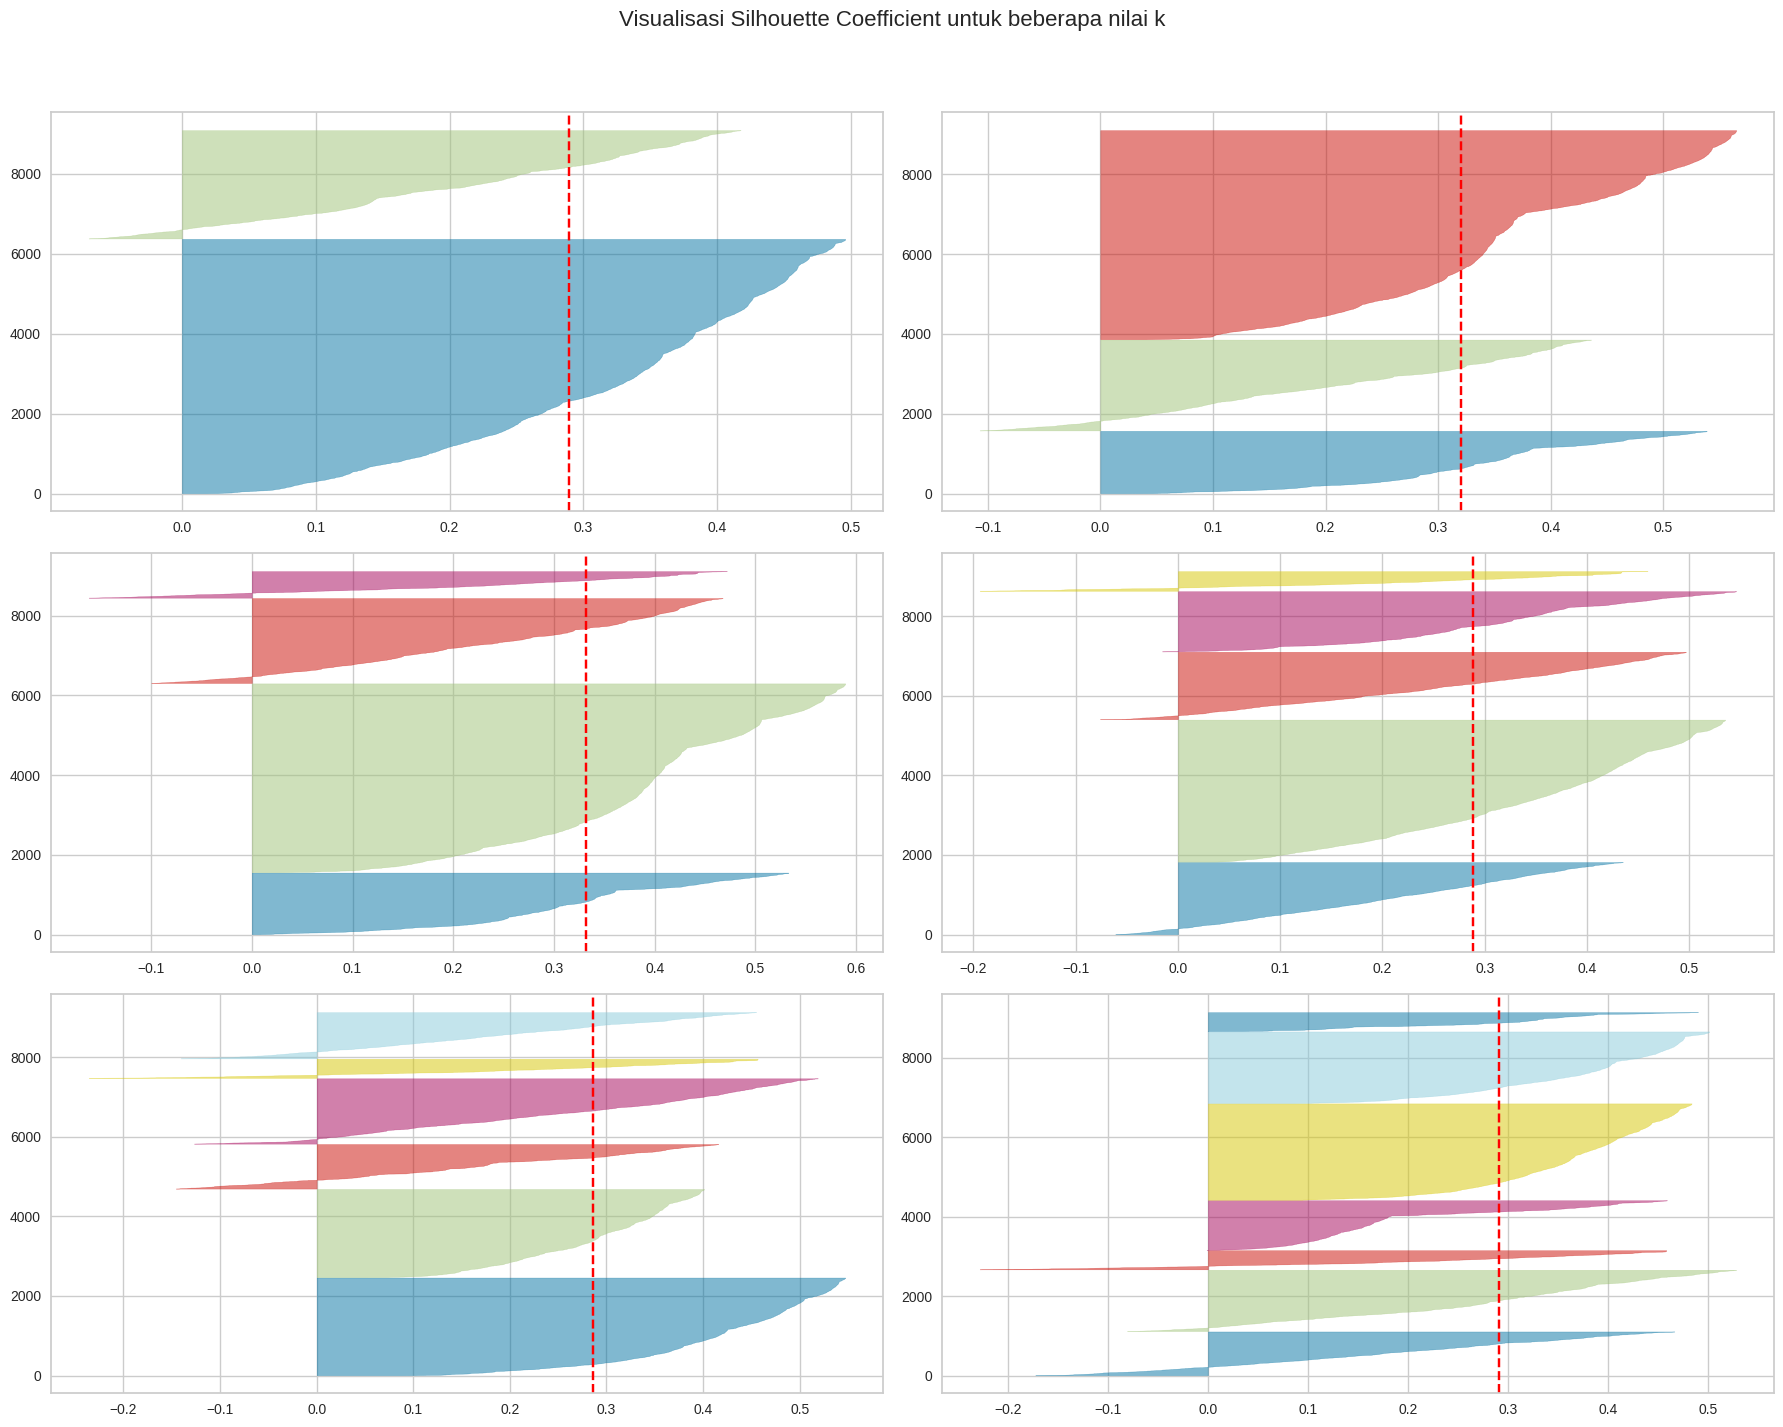

In [244]:
# Visualisasi silhouette coefficient
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k", fontsize=16)
k_values = range(2, 8)
for idx, k in enumerate(k_values):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    row, col = divmod(idx, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_cluster_selected)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Menampilkan elbow method dari cluster df_cluster_selected

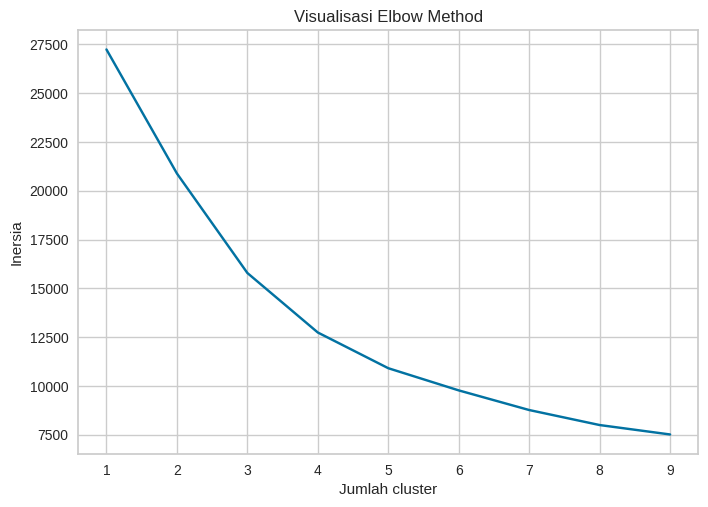

In [245]:
inertia = []
cluster_range = range(1, 10)

for cluster in cluster_range:
    km = KMeans(n_clusters=cluster, n_init=10, random_state=42)
    km = km.fit(df_cluster_selected)
    inertia.append(km.inertia_)

plt.plot(cluster_range, inertia, 'bx-')
plt.xlabel('Jumlah cluster')
plt.ylabel('Inersia')
plt.title('Visualisasi Elbow Method')

plt.show()

In [246]:
k_optimal = 3

Jumlah cluster optimal adalah k=3

Alasan:
- Nilai Silhouette Coefficient tertinggi adalah 0.3315 untuk k=4, diikuti oleh k=3 (0.3206).
- Titik siku atau perubahan inersia yang signifikan dari elbow method terlihat jelas pada k=3, sedangkah penurunan inersia setelah k=3 tidak signifikan.
Oleh karena itu, k=3 merupakan k optimal berdasarkan kombinasi hasil sihoutte coefficient dan elbow method.

In [247]:
kmeans = KMeans(n_clusters=k_optimal, n_init=10, random_state=42)
cluster_assignment = kmeans.fit_predict(df_cluster_selected)

Memvisualisasikan hasil clustering KMeans

In [248]:
df_employee_selected_with_clusters = pd.DataFrame(df_cluster_selected.copy())
df_employee_selected_with_clusters['cluster'] = cluster_assignment
df_employee_selected_with_clusters.head()

MonthlyIncome  PercentSalaryHike  JobLevel  cluster
0      -0.032971          -1.165079 -0.833716        2
1       0.820403           0.931727  0.207053        1
2      -0.346809          -0.565992  0.207053        2
3      -0.205206          -0.565992  0.207053        2
4       0.403987           0.931727  0.207053        1

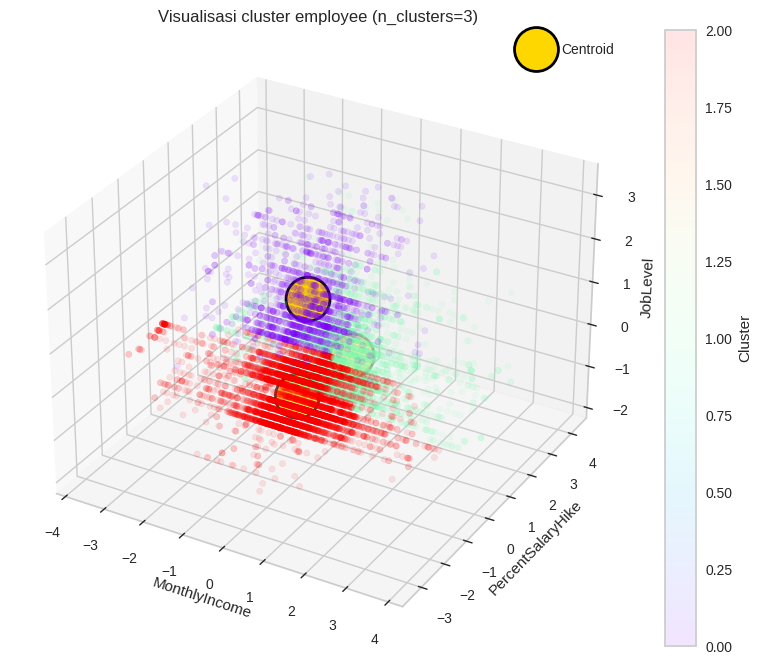

In [249]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
# ax.view_init(elev=0, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_employee_selected_with_clusters['MonthlyIncome']
y = df_employee_selected_with_clusters['PercentSalaryHike']
z = df_employee_selected_with_clusters['JobLevel']
cluster = df_employee_selected_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.1)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title(f"Visualisasi cluster employee (n_clusters={k_optimal})")
ax.set_xlabel(df_employee_selected_with_clusters.columns[0])
ax.set_ylabel(df_employee_selected_with_clusters.columns[1])
ax.set_zlabel(df_employee_selected_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

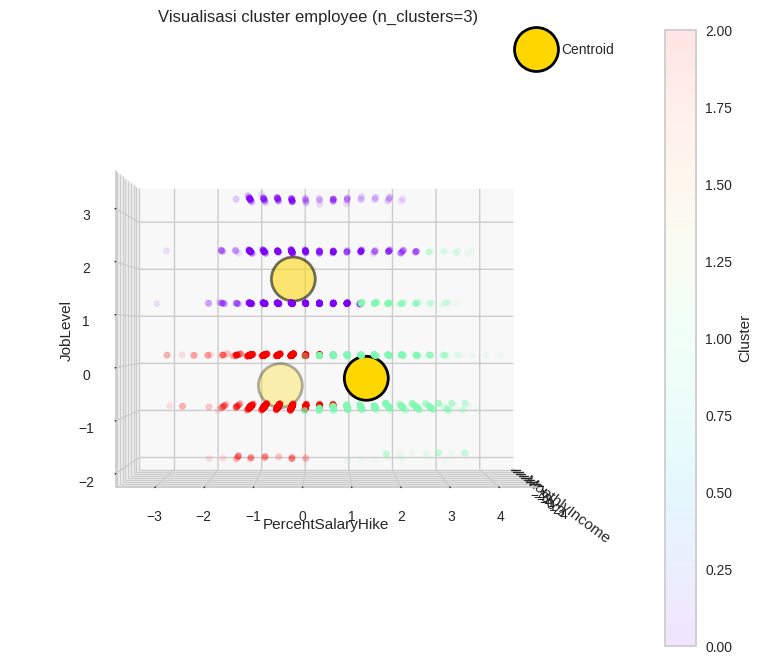

In [250]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
ax.view_init(elev=0, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_employee_selected_with_clusters['MonthlyIncome']
y = df_employee_selected_with_clusters['PercentSalaryHike']
z = df_employee_selected_with_clusters['JobLevel']
cluster = df_employee_selected_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.1)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title(f"Visualisasi cluster employee (n_clusters={k_optimal})")
ax.set_xlabel(df_employee_selected_with_clusters.columns[0])
ax.set_ylabel(df_employee_selected_with_clusters.columns[1])
ax.set_zlabel(df_employee_selected_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

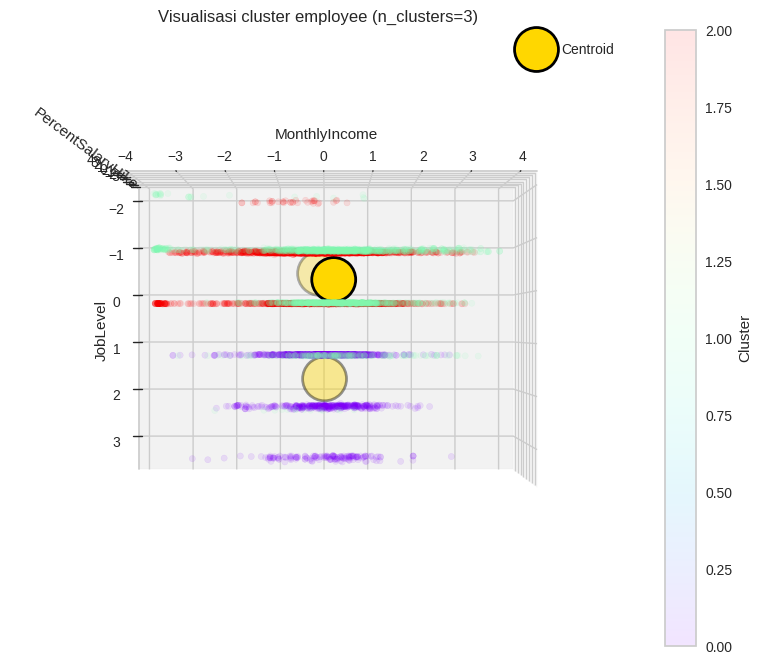

In [251]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
ax.view_init(elev=180, azim=270)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_employee_selected_with_clusters['MonthlyIncome']
y = df_employee_selected_with_clusters['PercentSalaryHike']
z = df_employee_selected_with_clusters['JobLevel']
cluster = df_employee_selected_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.1)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title(f"Visualisasi cluster employee (n_clusters={k_optimal})")
ax.set_xlabel(df_employee_selected_with_clusters.columns[0])
ax.set_ylabel(df_employee_selected_with_clusters.columns[1])
ax.set_zlabel(df_employee_selected_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

In [252]:
# Posisi Centroid
print("Posisi centroid: ")
kmeans.cluster_centers_

Posisi centroid: 


array([[ 0.01430524, -0.23231313,  1.73356016],
       [ 0.21071019,  1.34587176, -0.25566358],
       [-0.09566955, -0.51462023, -0.40565471]])

Interpretasi:

- Cluster merah merupakan kelompok karyawan dengan JobLevel rendah, PercentSalaryHike (persentase kenaikan gaji) rendah, dan MonthlyIncome yang relatif kecil. Cluster merah cenderung merupakan karyawan entry-level atau posisi junior yang belum lama bekera atau kurang berprestasi dalam kenaikan gaji.
- Cluster hijau merupakan kelompok karyawan dengan MonthlyIncome yang sedikit lebih tinggi dibandingkan seluruh cluster lain, JobLevel yang relatif rendah ke menengah, dan PercentSalaryHike yang tinggi. Kelompok ini terdiri dari karyawan yang mendapatkan kenaikan gaji yang signifikan meskipun berada pada jenjang karier yang belum terlalu tinggi atau memiliki gaji pokok yang belum besar. Hal ini menandakan bahwa kelompok karyawan cluster hijau memiliki kinerja yang sangat baik atau keahlian khusus di bidang yang sangat dibutuhkan perusahaan.
- Cluster ungu merupakan kelompok karyawan dengan JobLevel yang tinggi, tetapi MonthlyIncome dan PercentSalaryHike yang moderat (lebih tinggi dari cluster merah tetapi lebih rendah dari cluster hijau). Kelompok ini berupa karyawan senior atau manajerial dengan level pekerjaan yang tinggi tetapi tidak mengalami kenaikan gaji secepat cluster hijau.